In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch

from bo_functions import ExactGPModel
from bo_functions import create_y_data
from bo_functions import bo_iter
from bo_functions import test_train_split
from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path

# from bo_functions-Copy1 import ExactGPModel
# from bo_functions-Copy1 import create_y_data
# from bo_functions-Copy1 import bo_iter
# from bo_functions-Copy1 import test_train_split
# from bo_functions-Copy1 import bo_iter_w_runs
# from bo_functions-Copy1 import find_train_doc_path

from datetime import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 10

train_iter = 300
noise_std = 0.1
runs = 3
explore_bias = torch.tensor([0.75])
explore_bias = torch.tensor([0])

sep_fact = 1
shuffle_seed = 9
set_lengthscale = None
t= 100
emulator = True
sparse_grid = True
verbose = True
save_fig = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  10-Aug-2022 (10:44:44)


Runs: 3
BO Iters: 10
----------------------------------------------------
Separation Factor Train/Test: 1
Lengthscale Set To: None
Initial Explore Bias: 0.0
Run Number:  1


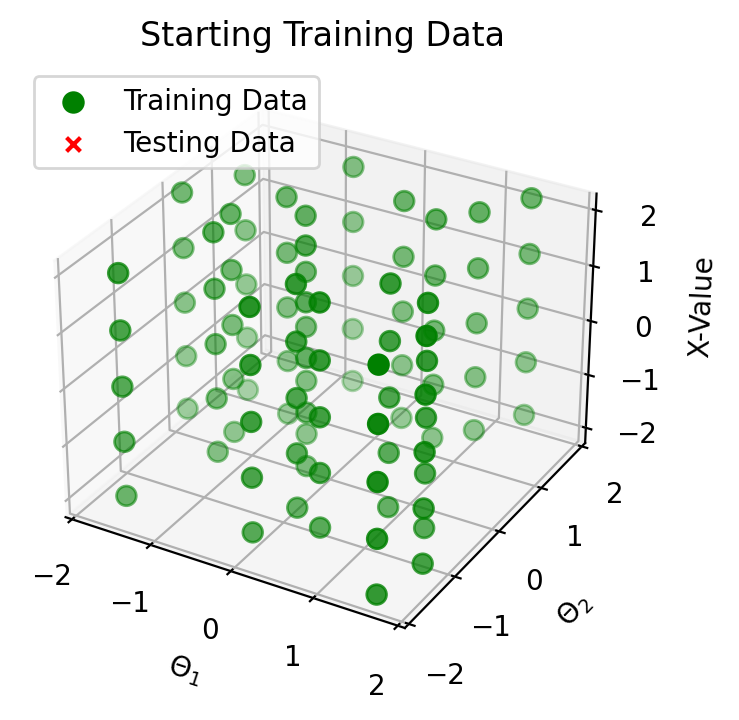

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


BO Iteration =  1
Jasrasaria EP: tensor(0)
Boyle EP: tensor(0)
Exp EP: tensor(0)
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 1.99999996 -0.94736839]
Argmax Theta Best =  [ 2.         -0.94736842]
Scipy Theta Opt =  [ 0.78260044 -0.96536034]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842]
EI_max = 60.632361829256034 



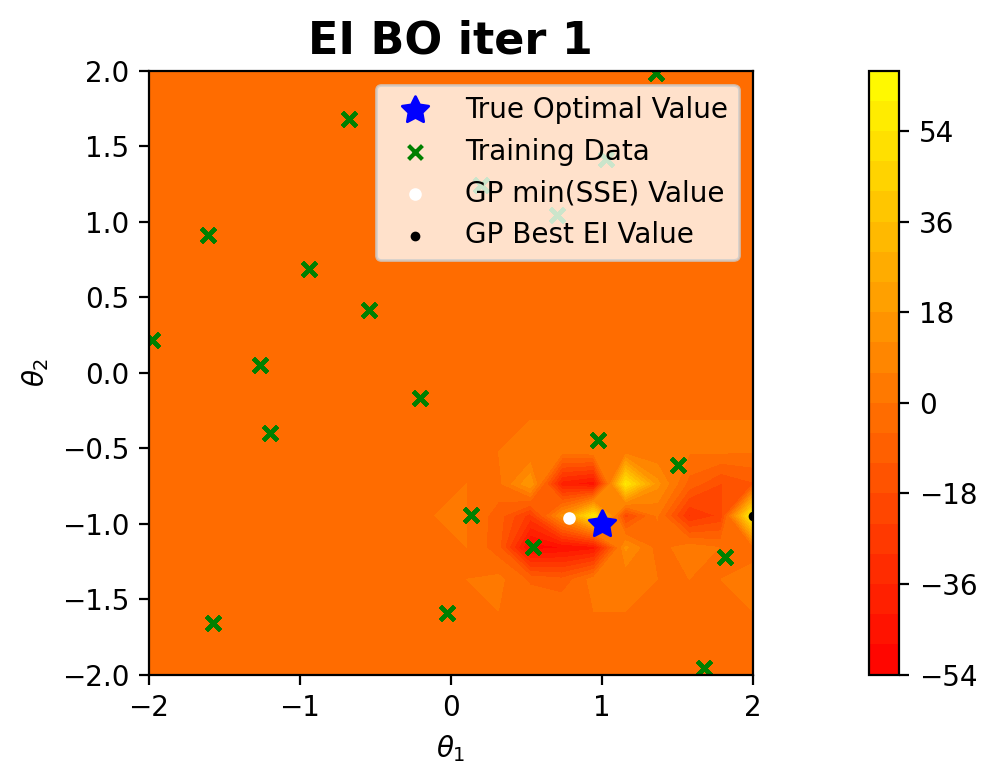

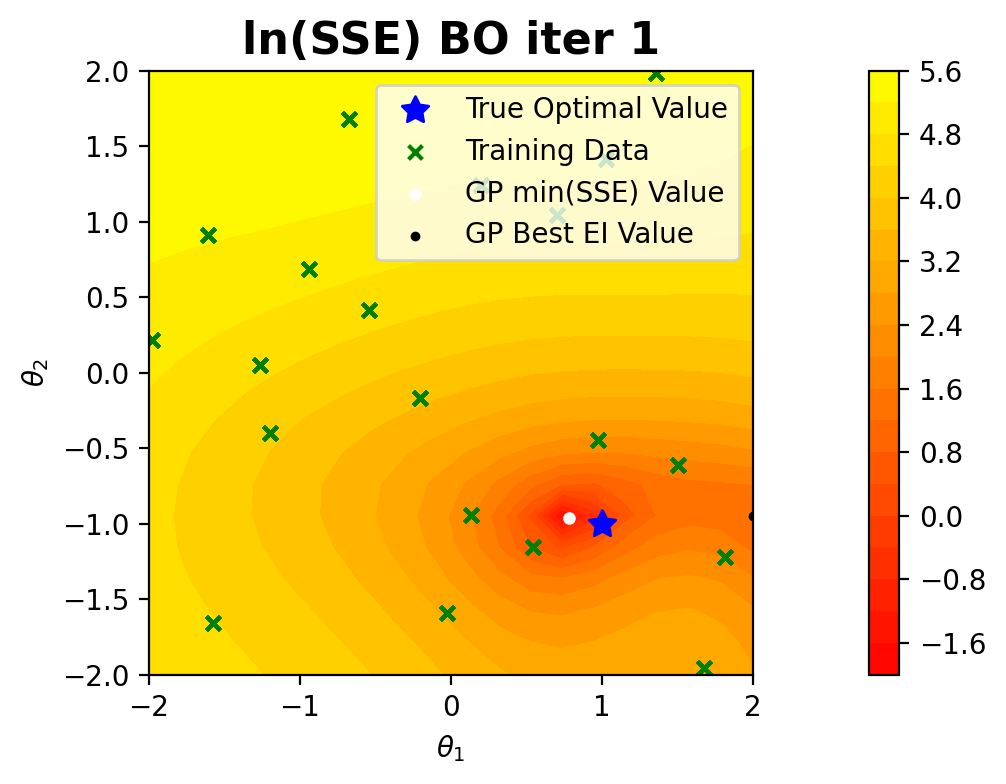

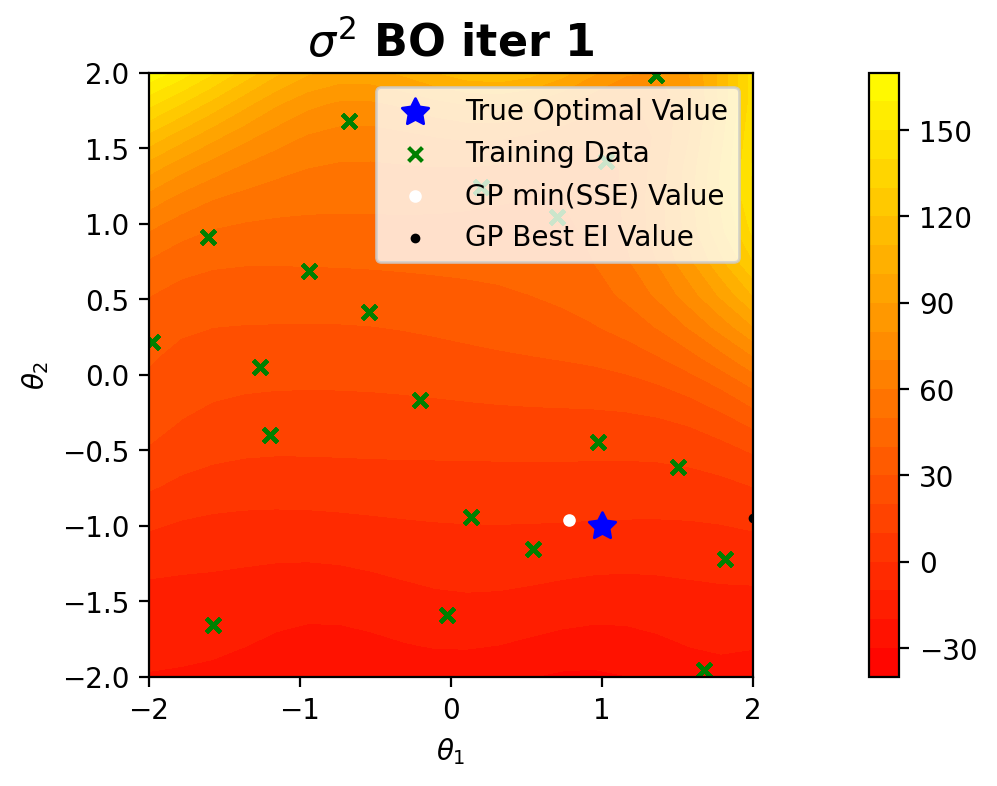

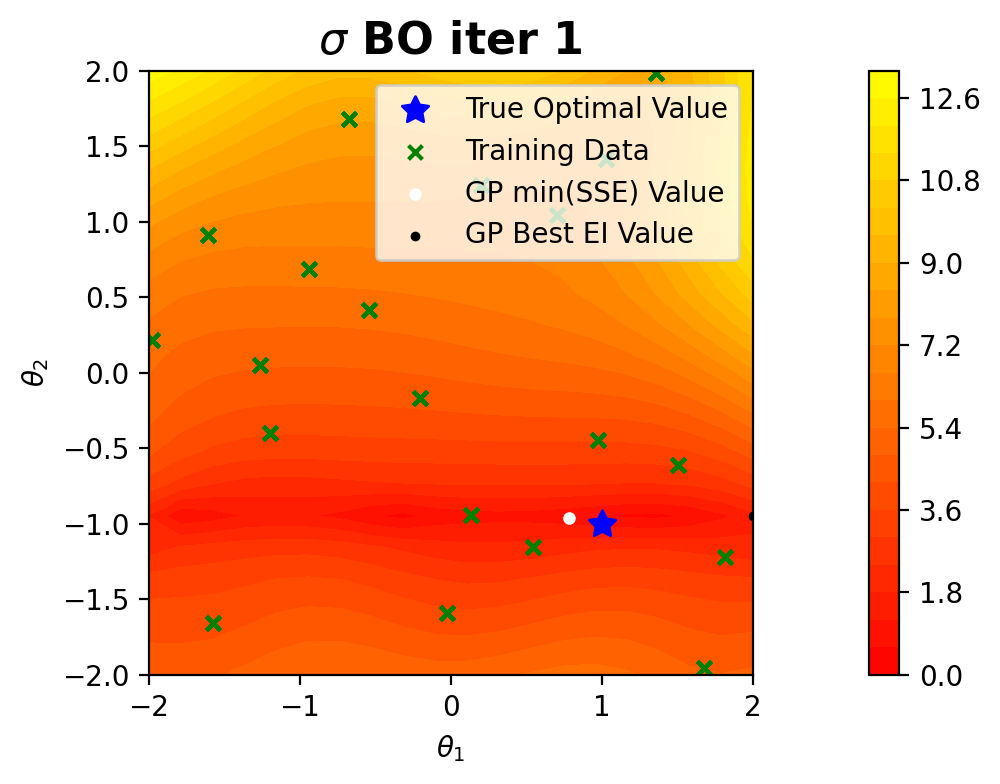

Best Error is: 2.8225
Magnitude of ln(SSE) given Theta_Opt =  [ 0.78260044 -0.96536034] is -7.0104e-01
BO Iteration =  2
Jasrasaria EP: 5.033820339575748
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.78005135 -1.00712452]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.8560951  -0.98031794]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 29.758521690968827 



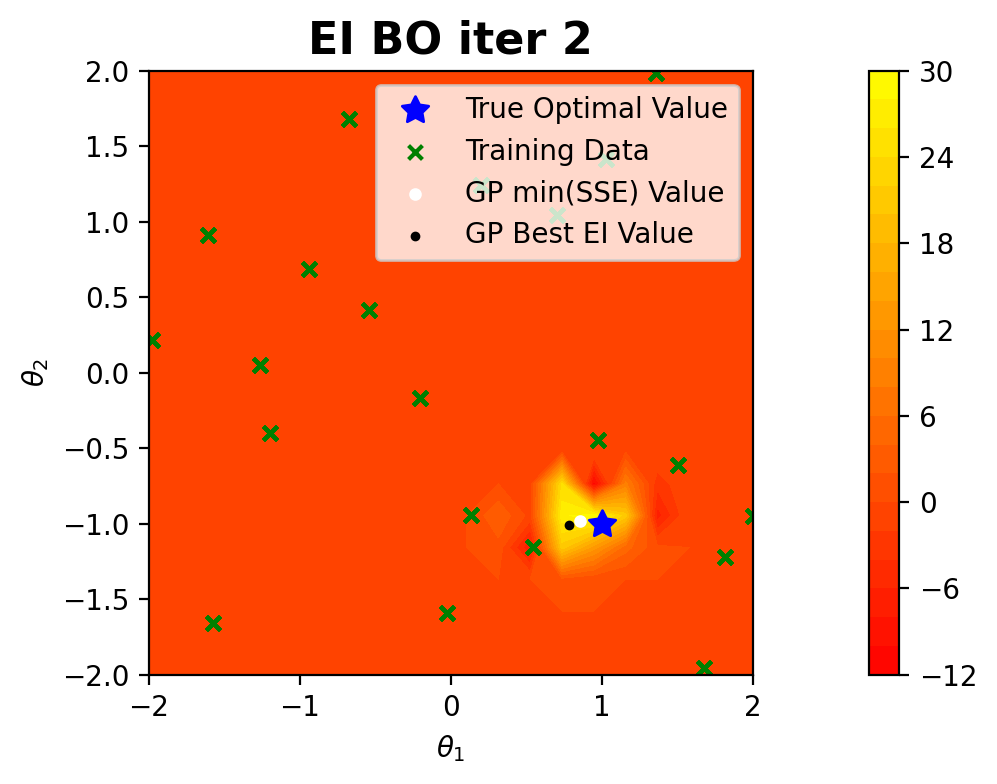

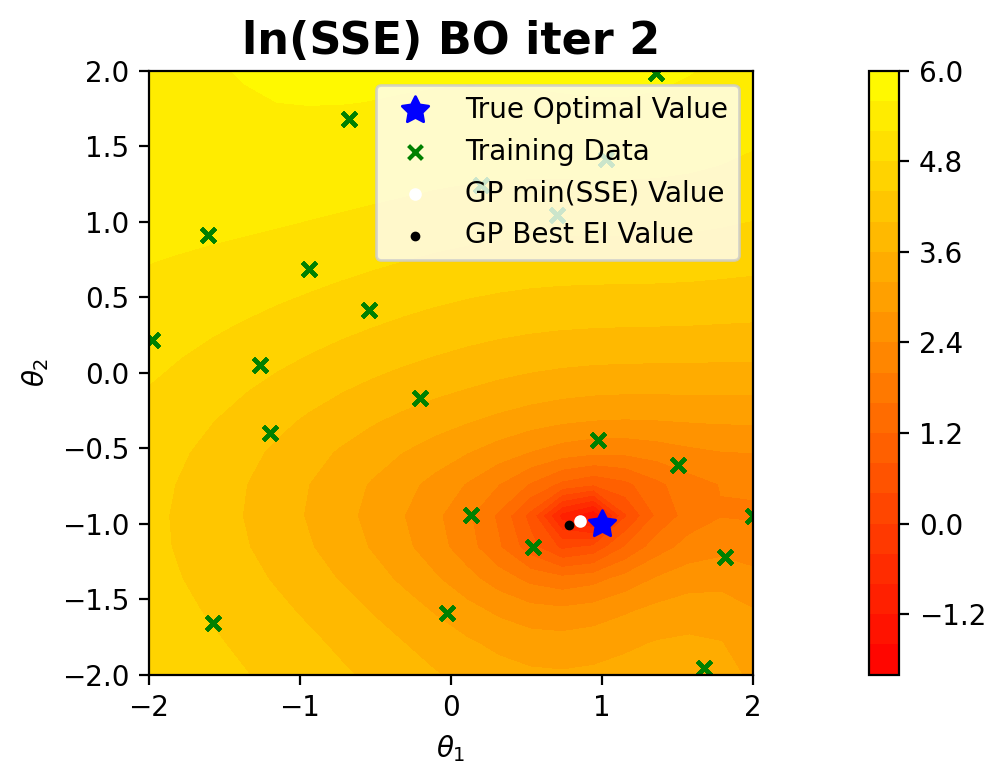

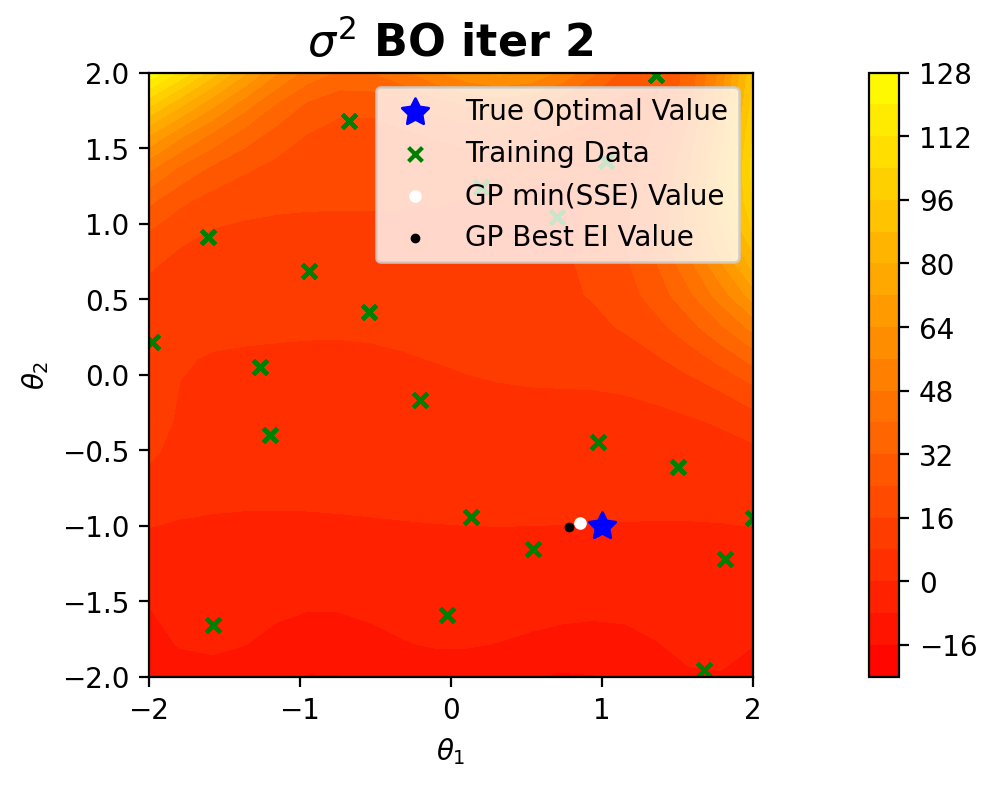

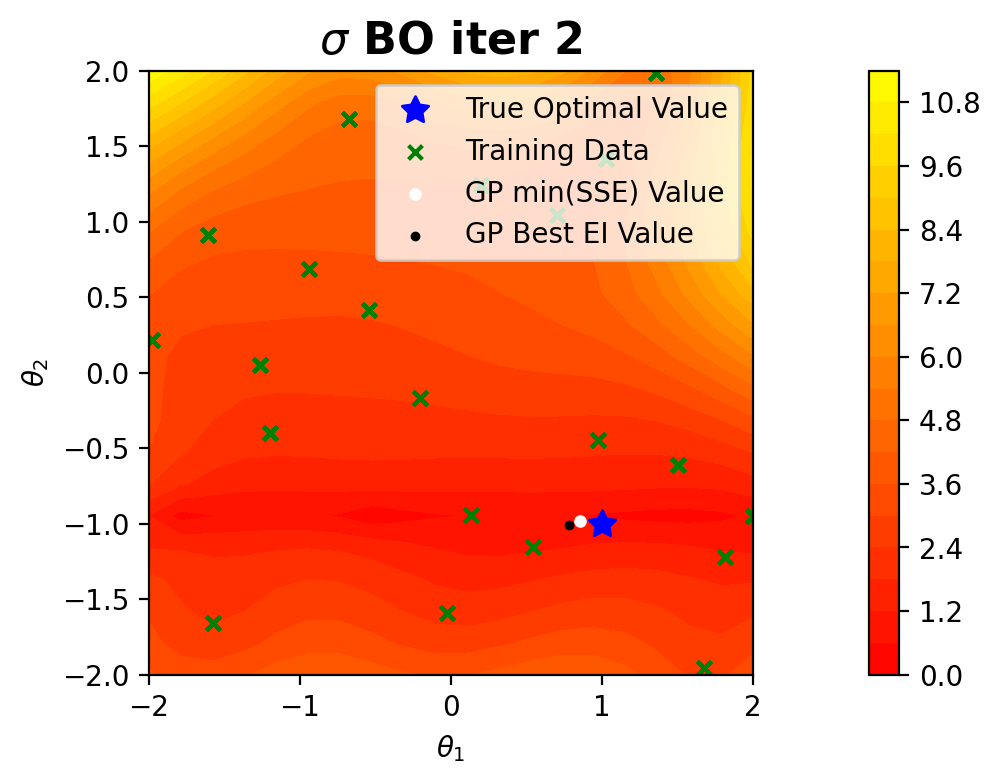

Best Error is: 2.8225
Magnitude of ln(SSE) given Theta_Opt =  [ 0.8560951  -0.98031794] is -1.5688e+00
BO Iteration =  3
Jasrasaria EP: 11.433350641932648
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.9432649 -1.0300653]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.96199661 -0.99293866]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 4.151385244270668 



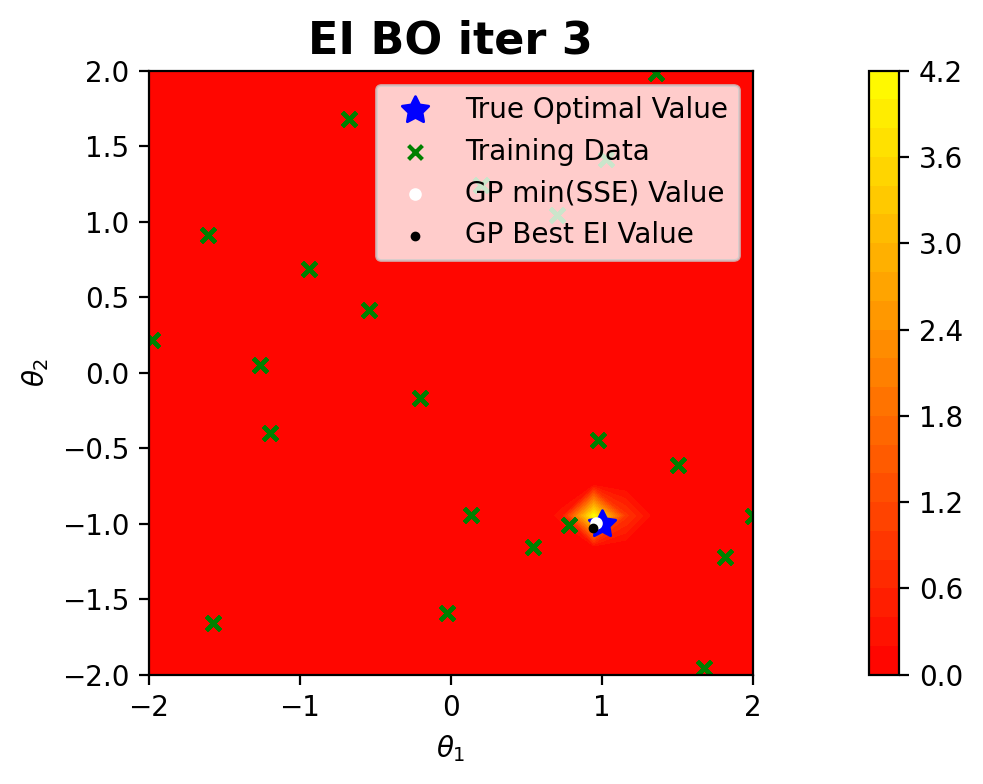

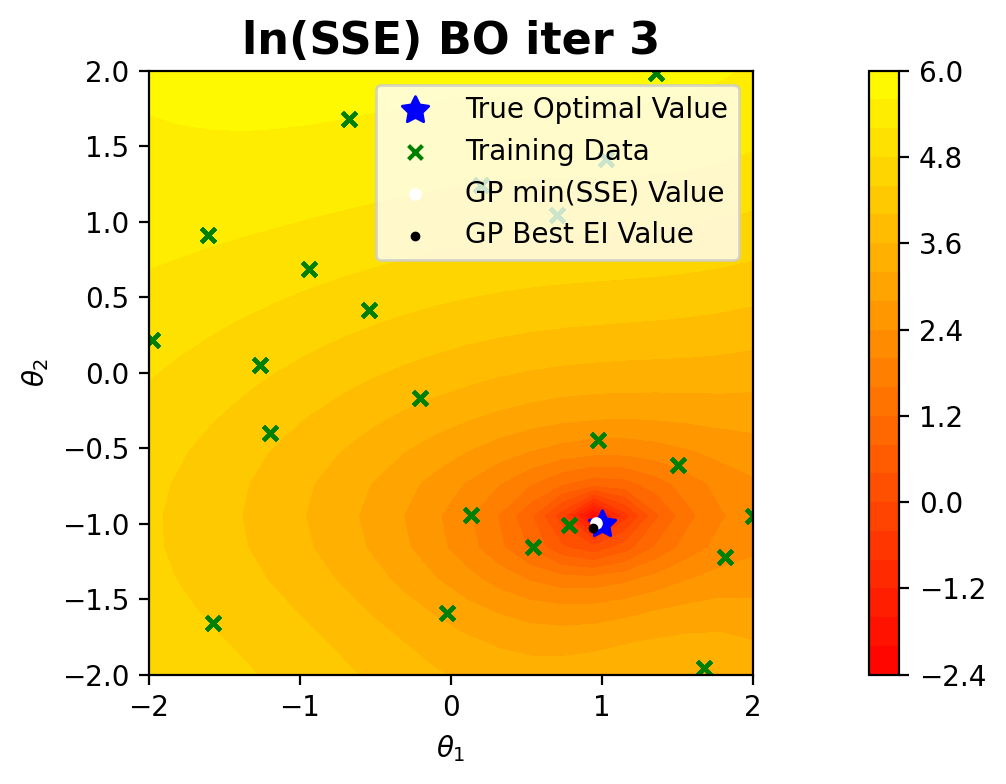

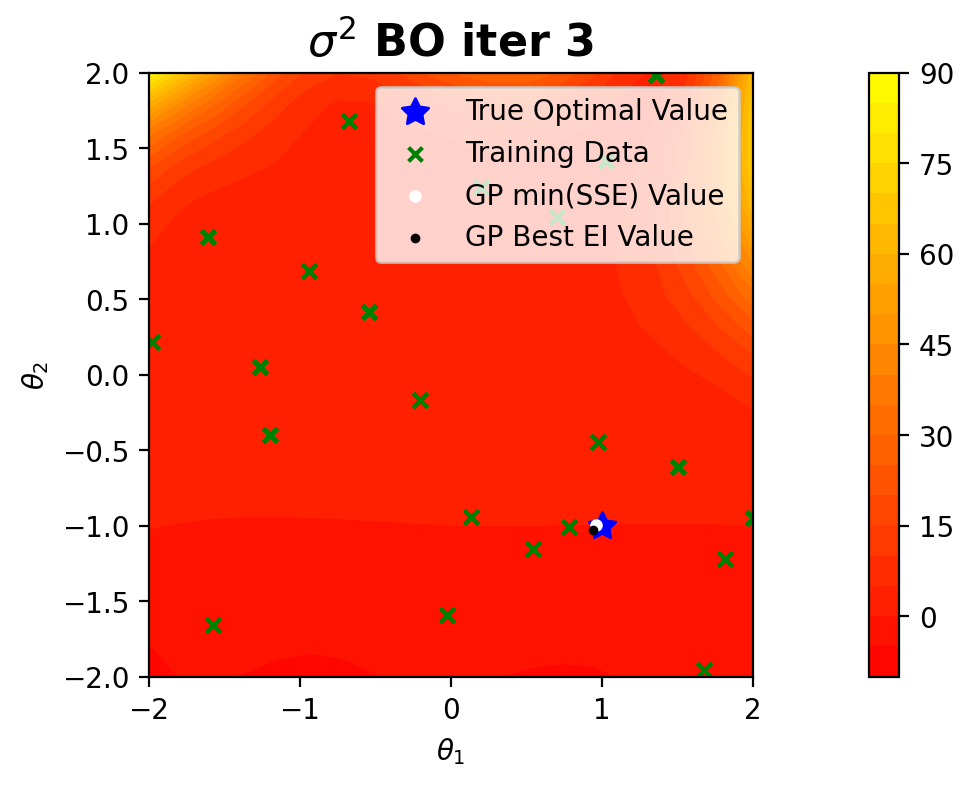

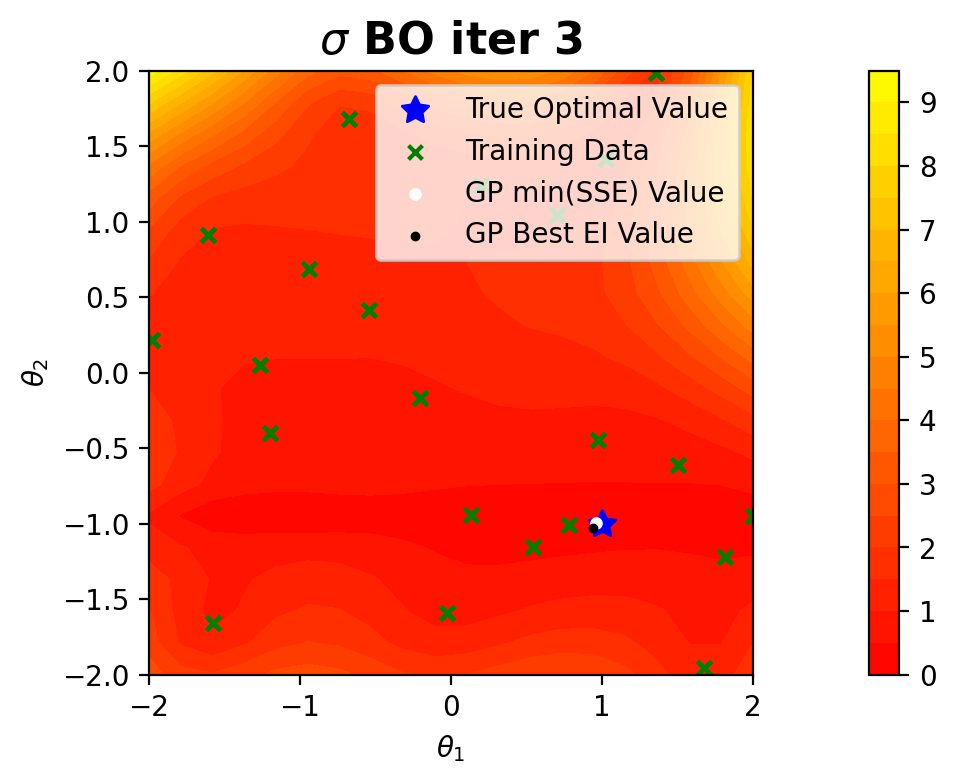

Best Error is: 0.4583
Magnitude of ln(SSE) given Theta_Opt =  [ 0.96199661 -0.99293866] is -4.2711e+00
BO Iteration =  4
Jasrasaria EP: 69.90032659406491
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.9935133 -0.9971091]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



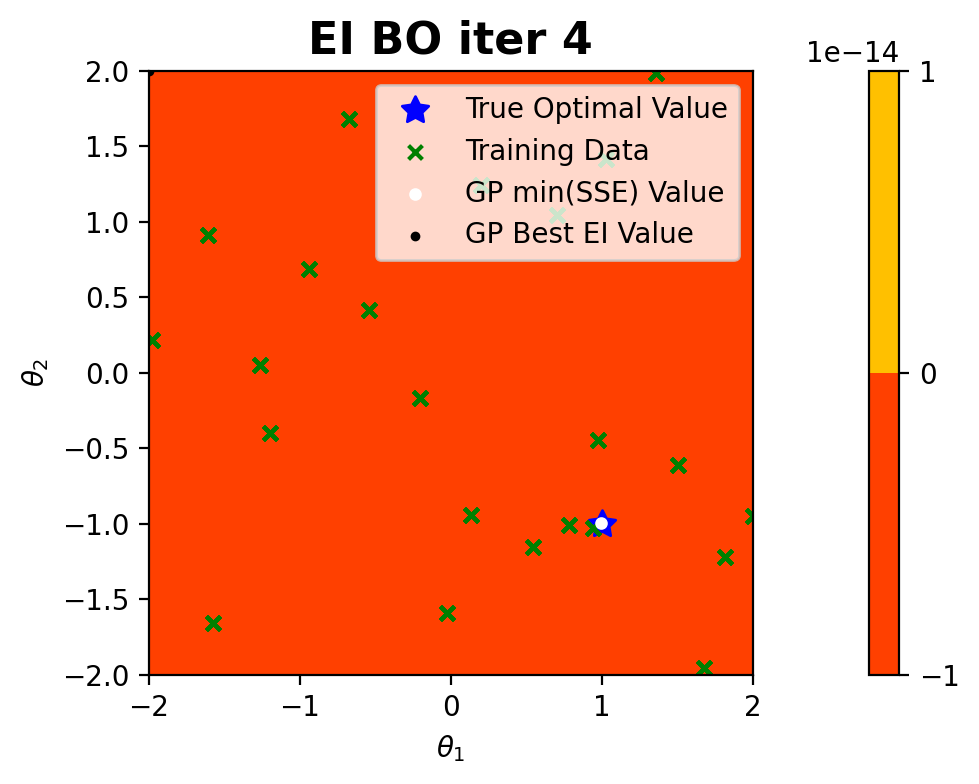

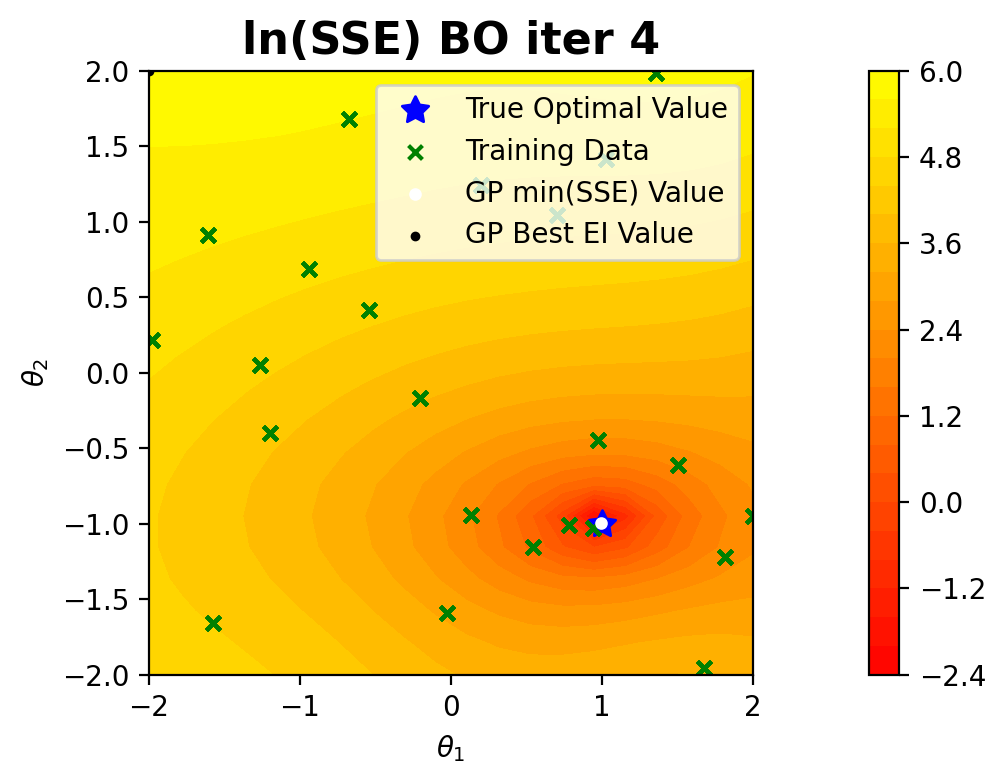

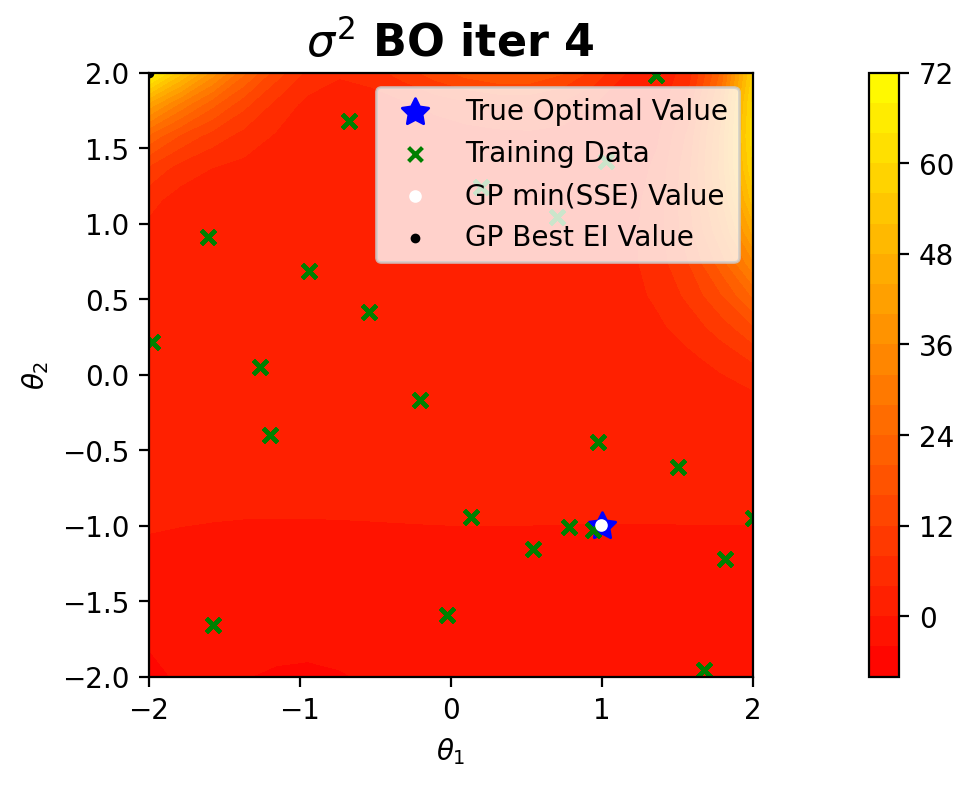

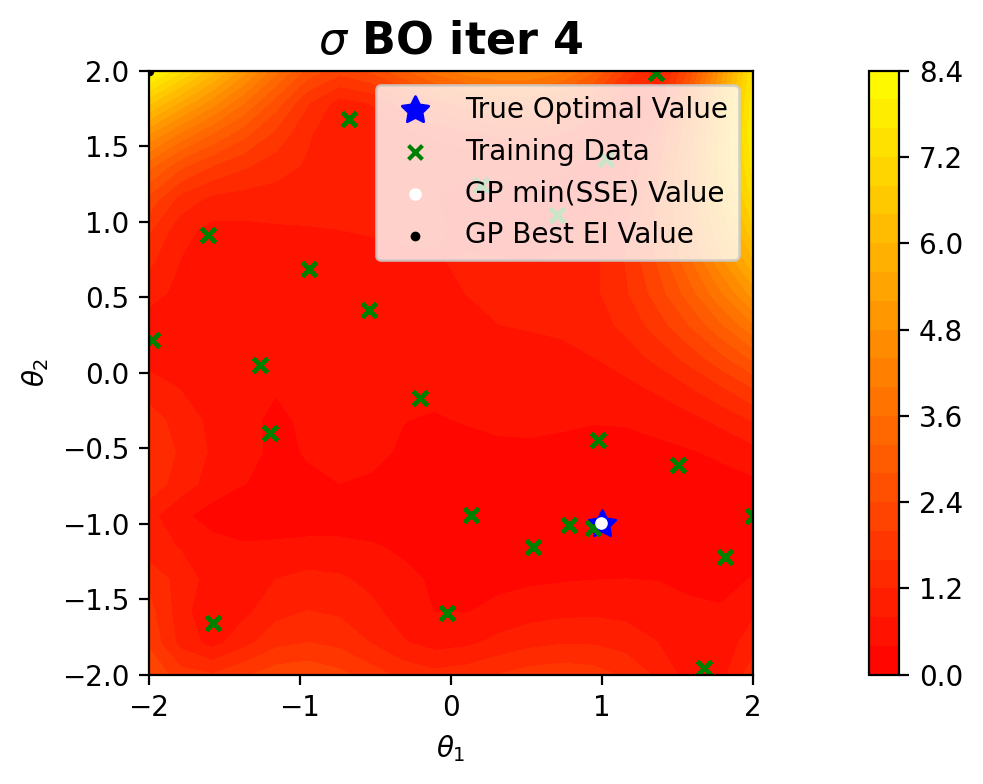

Best Error is: 0.0501
Magnitude of ln(SSE) given Theta_Opt =  [ 0.9935133 -0.9971091] is -6.6052e+00
BO Iteration =  5
Jasrasaria EP: 65.11088888552605
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 1.00338418 -1.00338418]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.98580792 -0.99708045]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.04928906922148216 



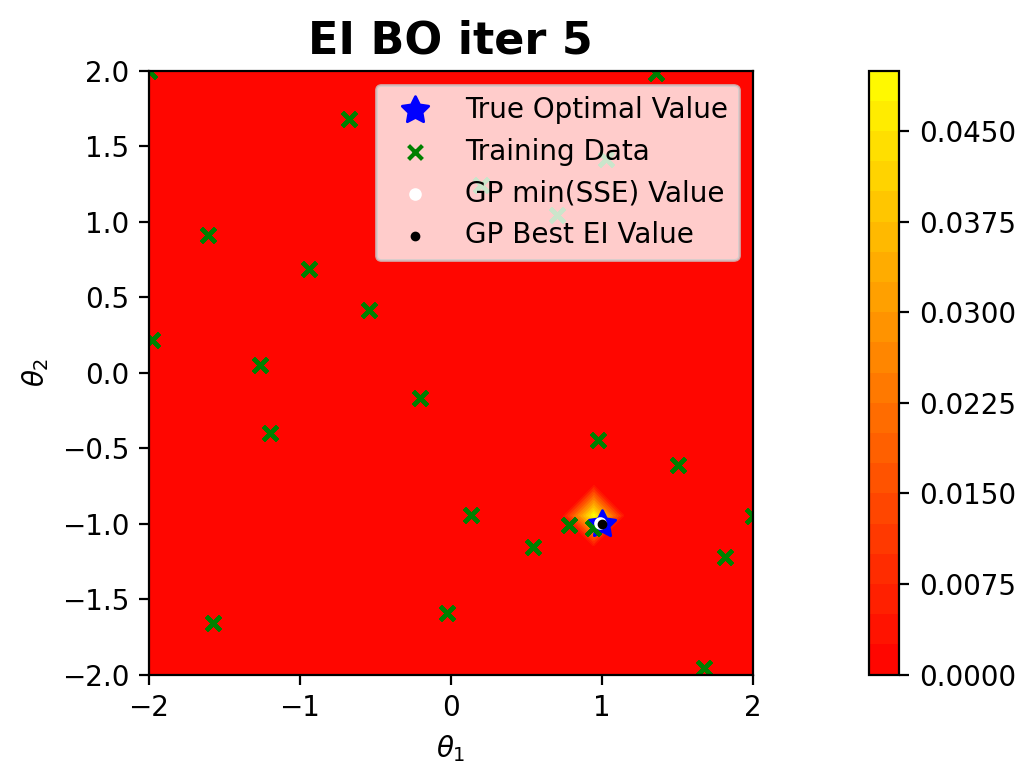

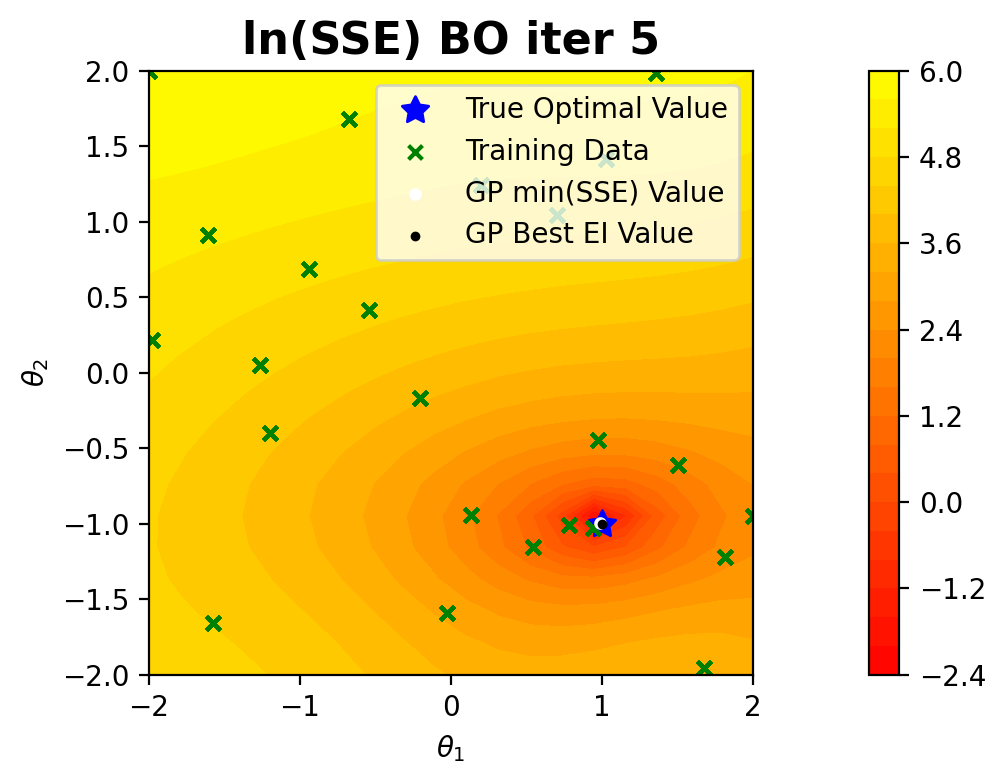

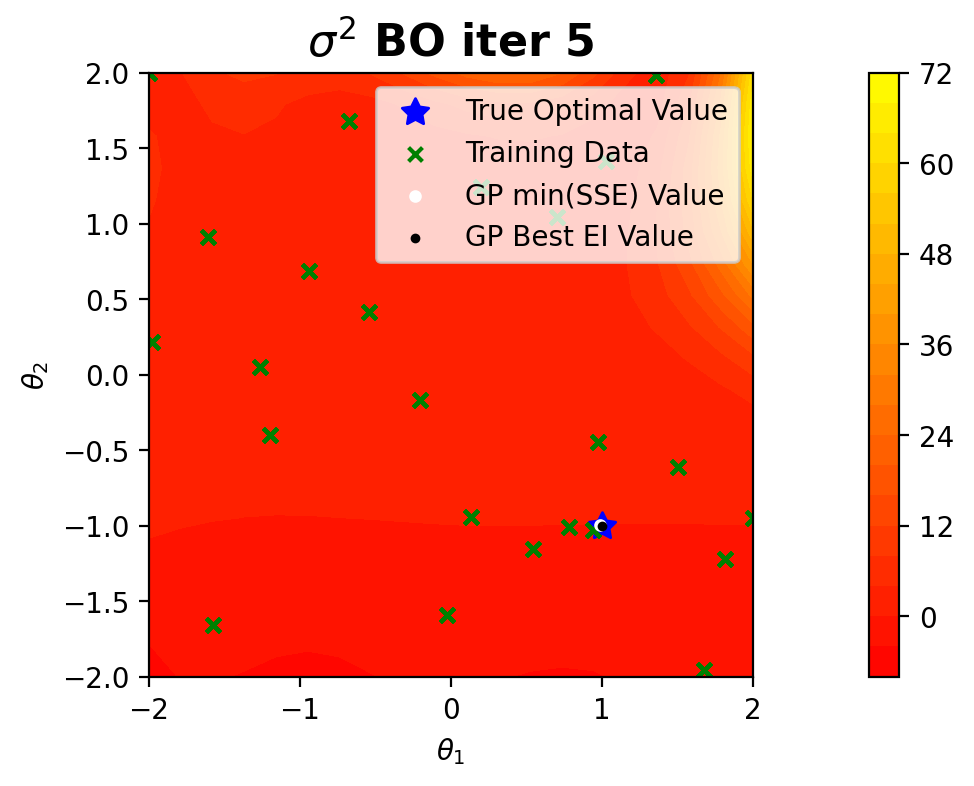

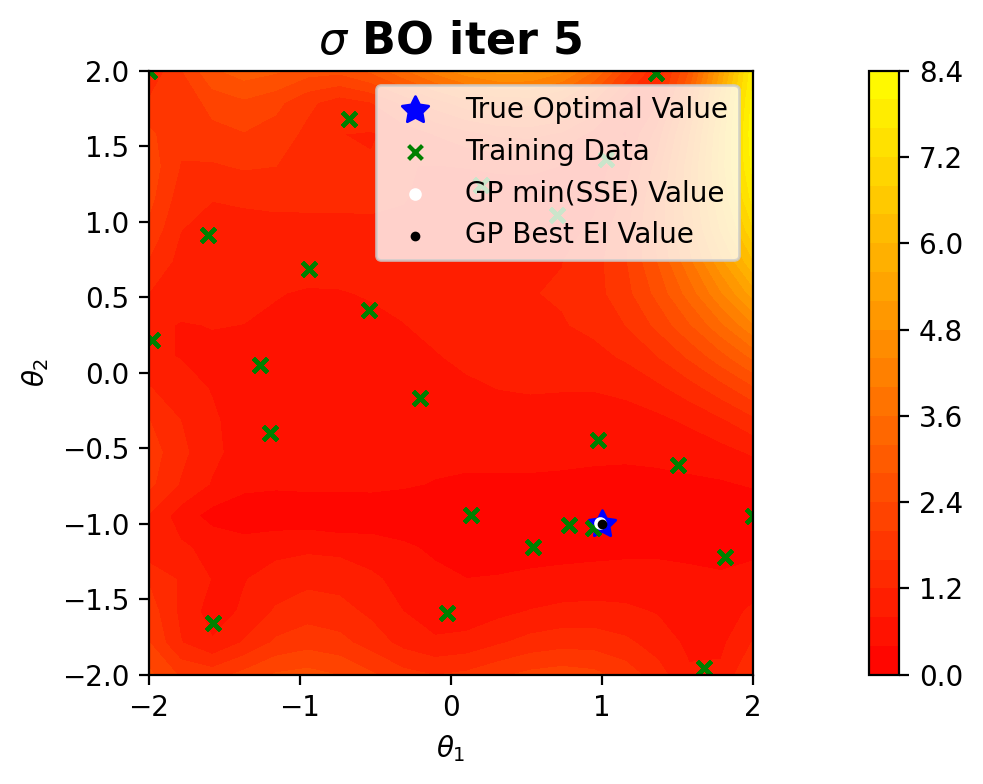

Best Error is: 0.0501
Magnitude of ln(SSE) given Theta_Opt =  [ 0.98580792 -0.99708045] is -6.1960e+00
BO Iteration =  6
Jasrasaria EP: 2640.7093013198987
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99568326 -0.99617018]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



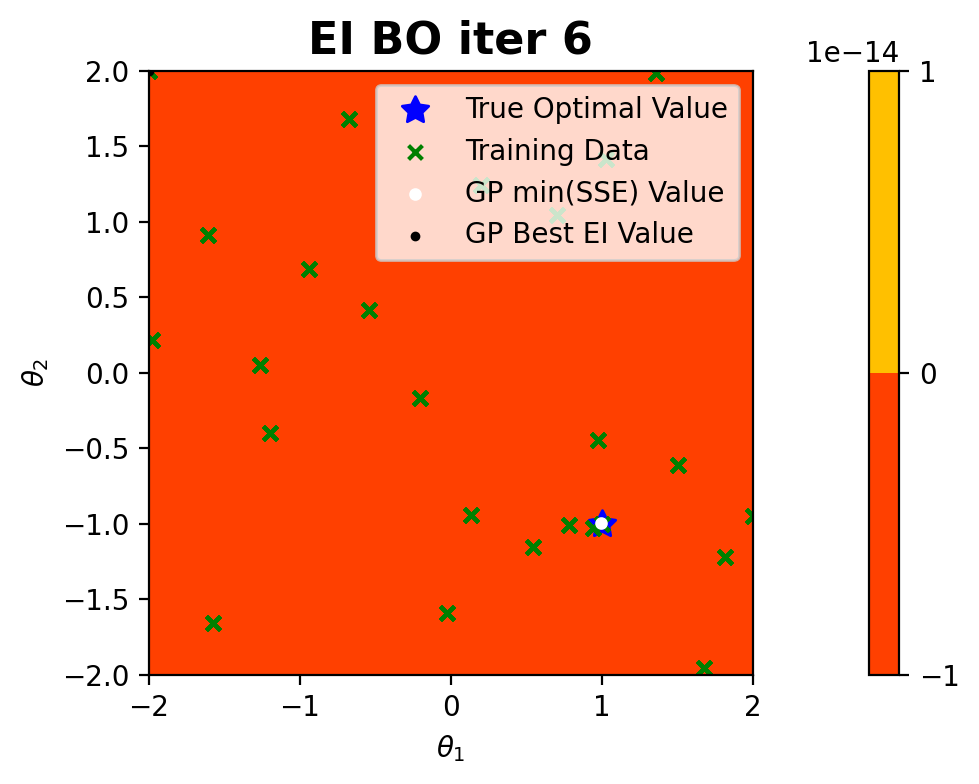

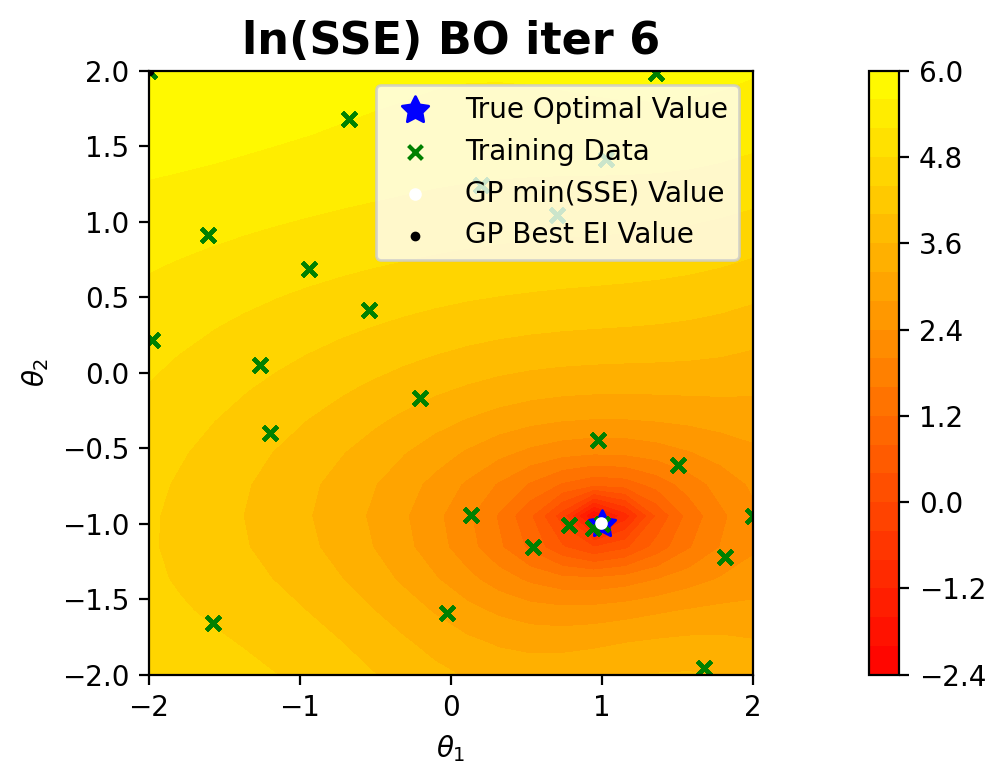

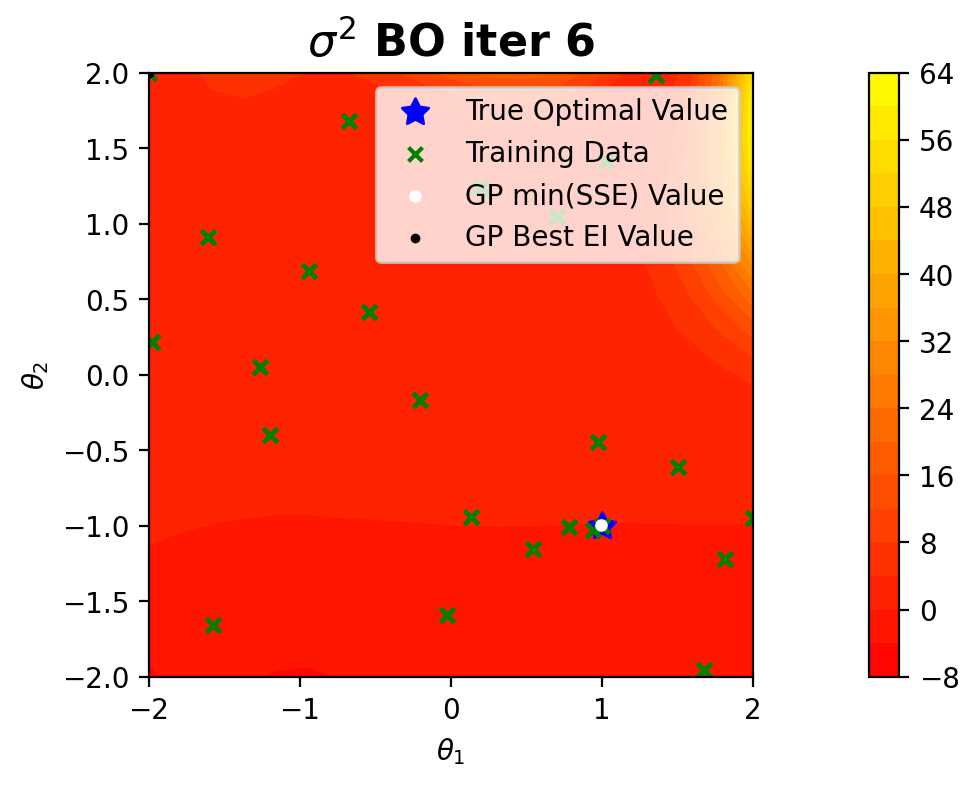

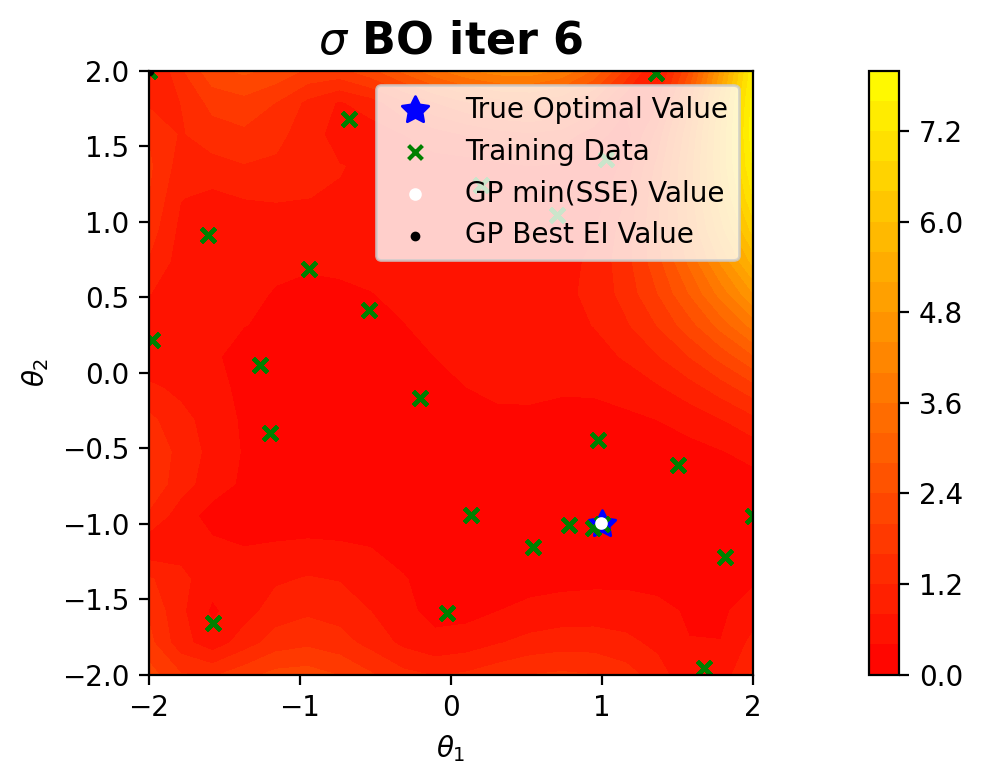

Best Error is: 0.0009
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99568326 -0.99617018] is -6.3165e+00
BO Iteration =  7
Jasrasaria EP: 2333.5476659926353
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99565797 -0.99525956]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



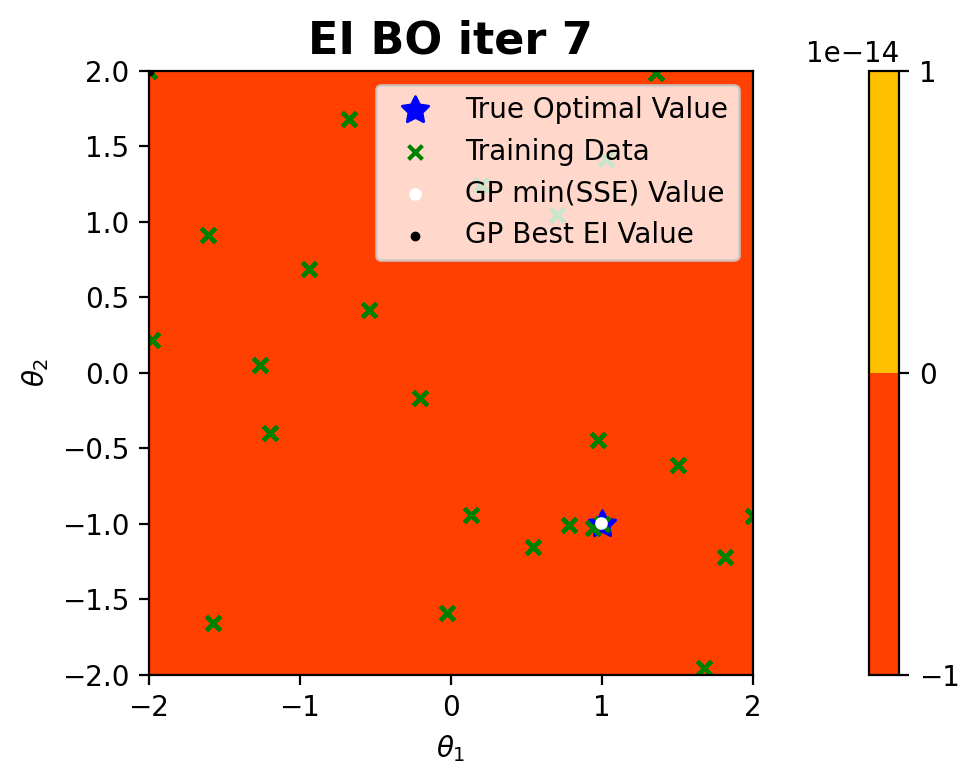

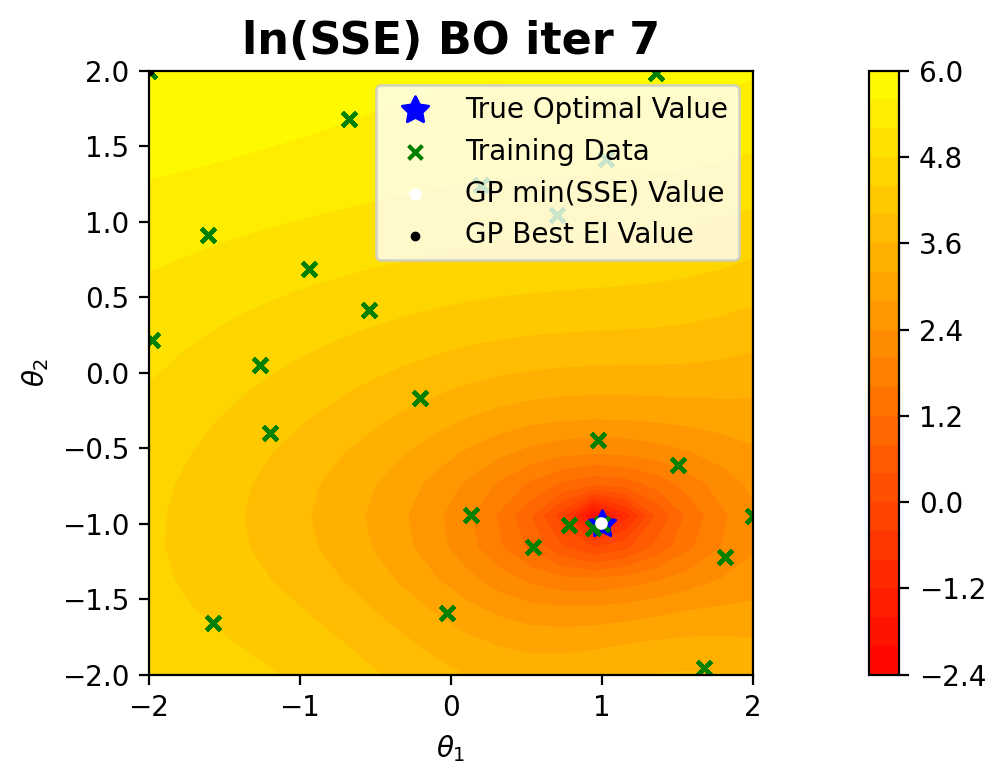

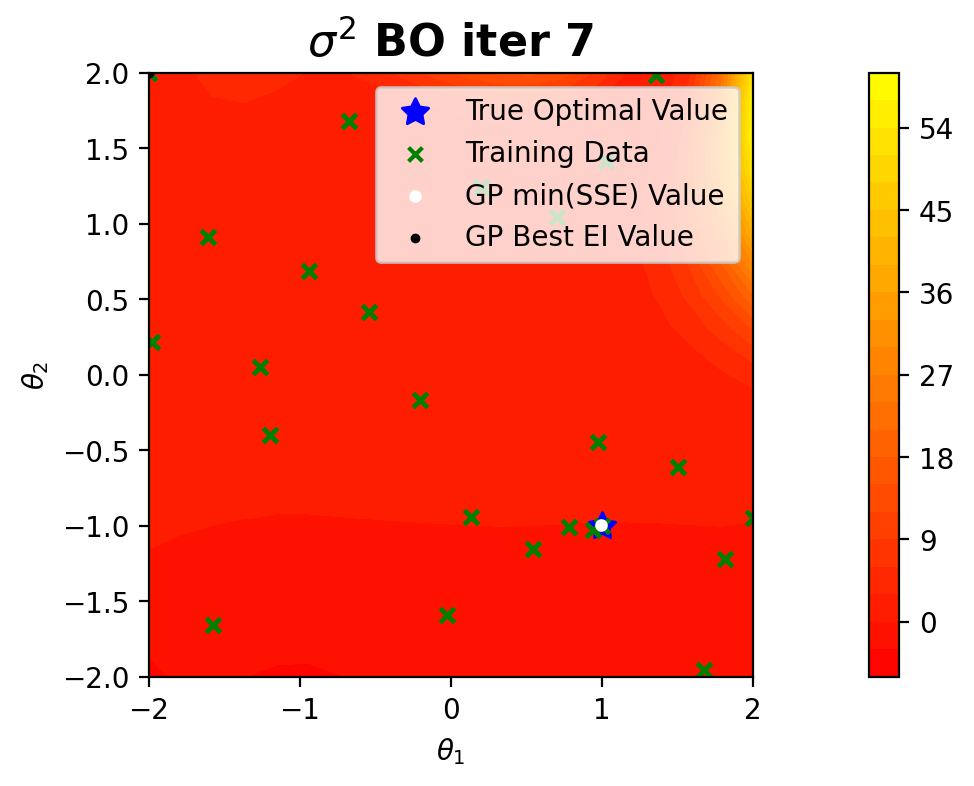

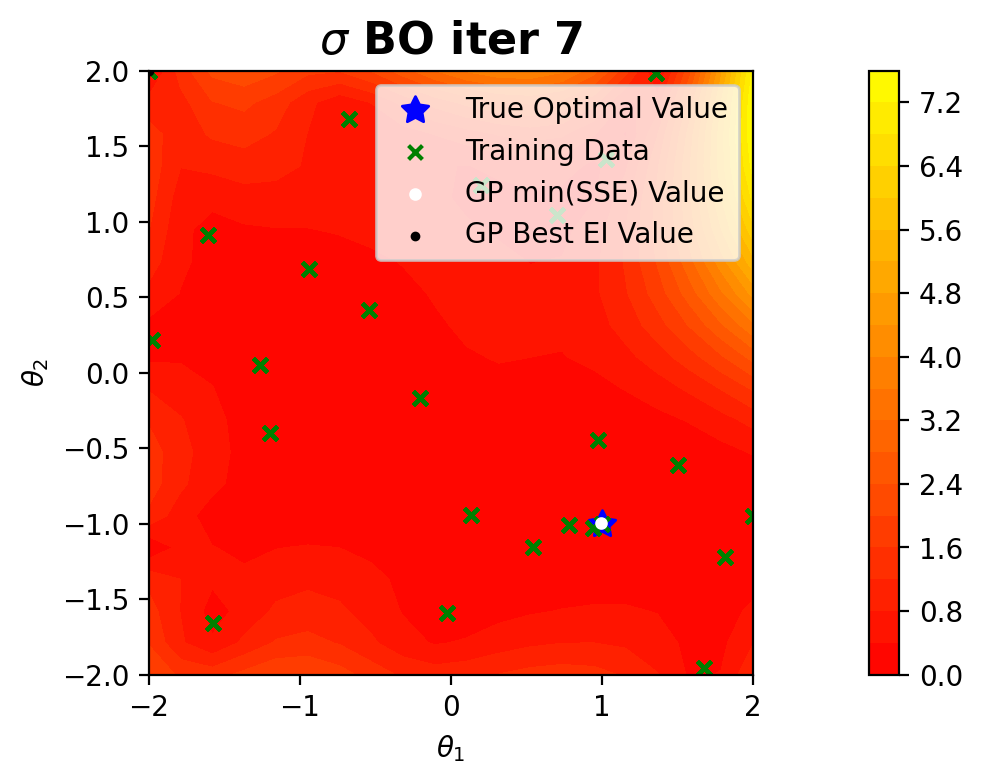

Best Error is: 0.0009
Run Number:  2


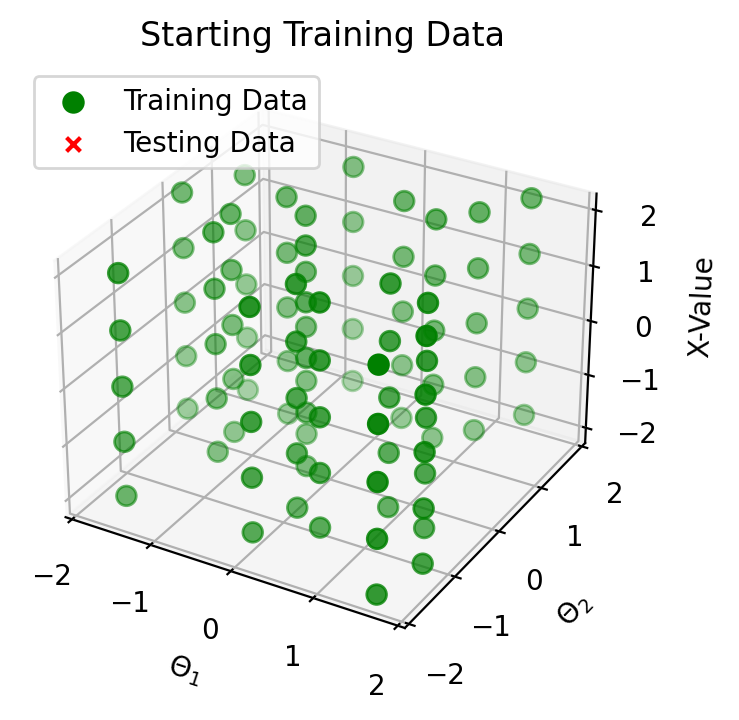

BO Iteration =  1
Jasrasaria EP: tensor(0)
Boyle EP: tensor(0)
Exp EP: tensor(0)
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 2.         -0.94457428]
Argmax Theta Best =  [ 2.         -0.94736842]
Scipy Theta Opt =  [ 0.78260048 -0.96536031]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842]
EI_max = 60.632363914634006 



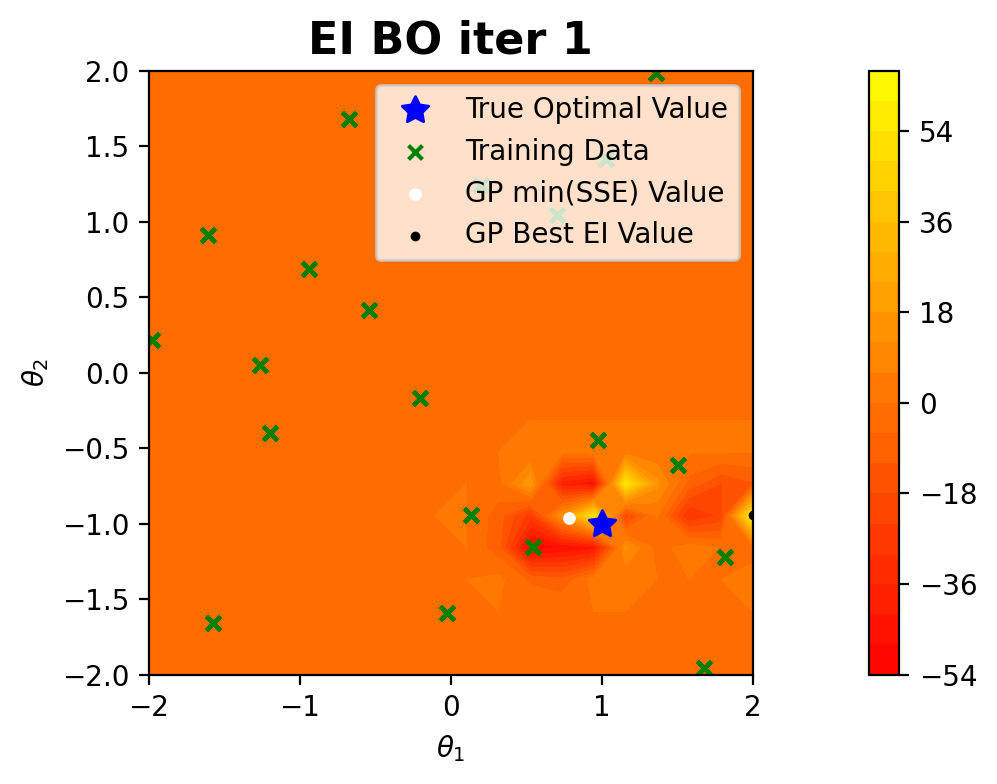

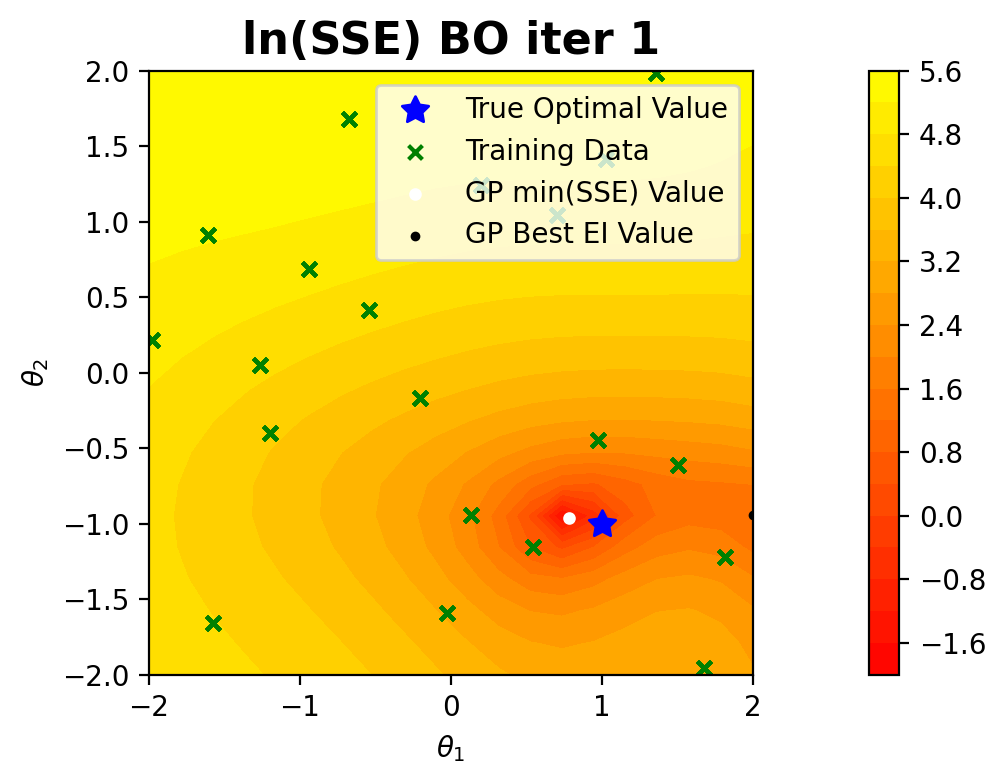

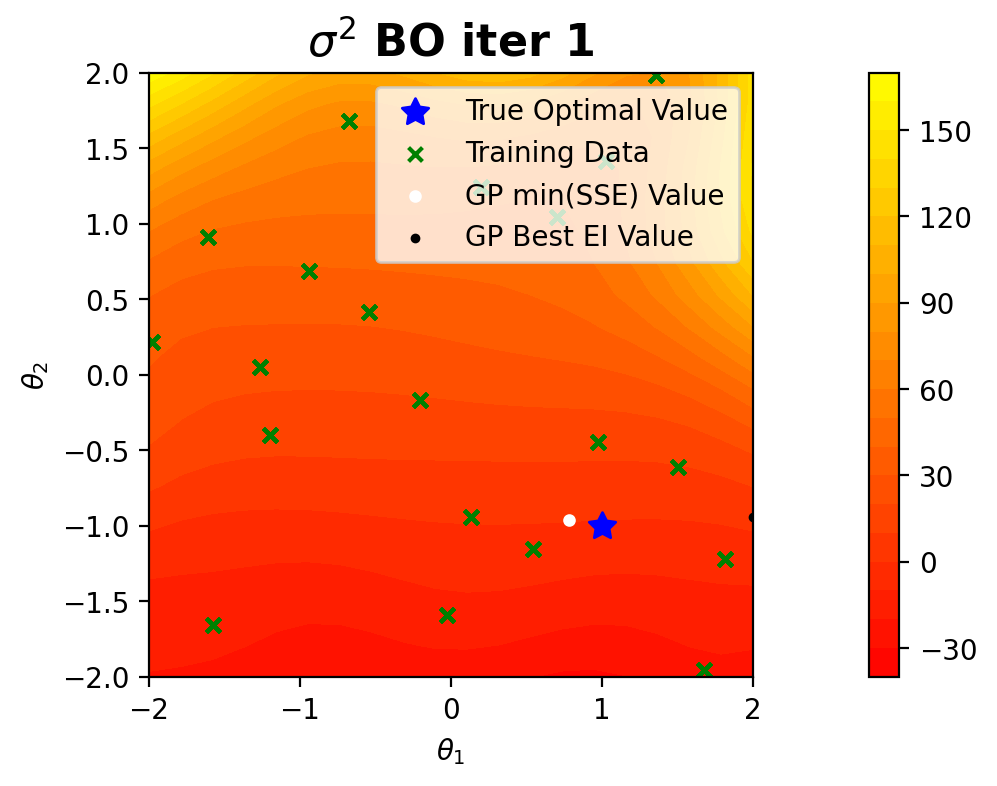

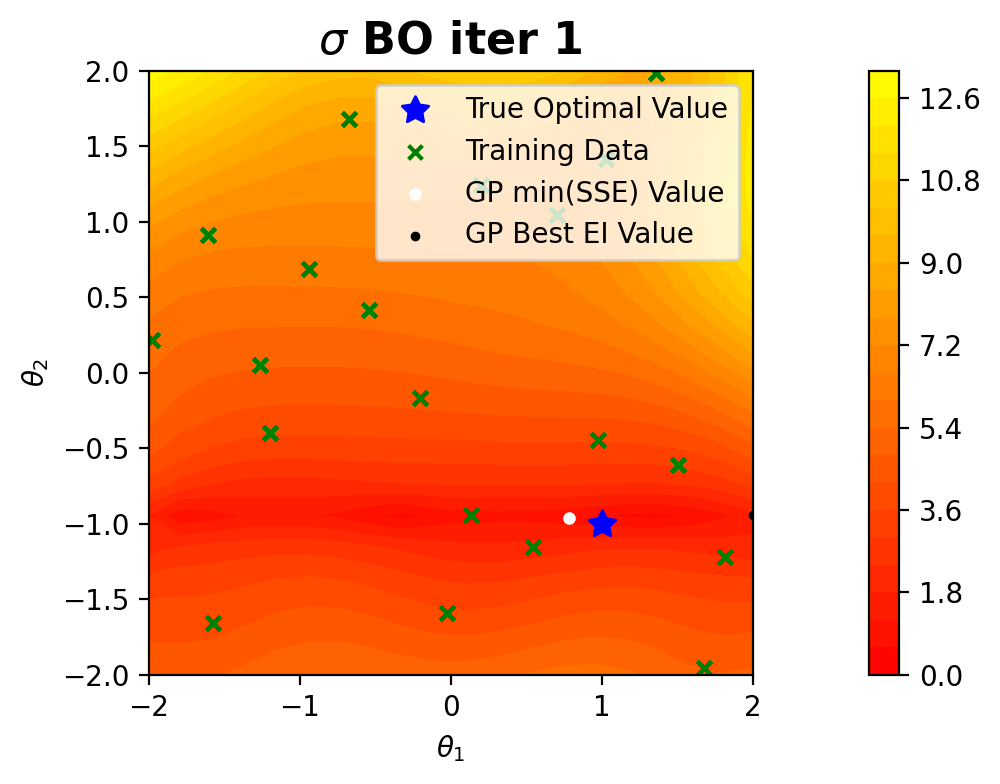

Best Error is: 2.8225
Magnitude of ln(SSE) given Theta_Opt =  [ 0.78260048 -0.96536031] is -7.0104e-01
BO Iteration =  2
Jasrasaria EP: 5.047106815156465
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.82107044 -0.98026786]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.85612994 -0.98029072]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 29.691139616396946 



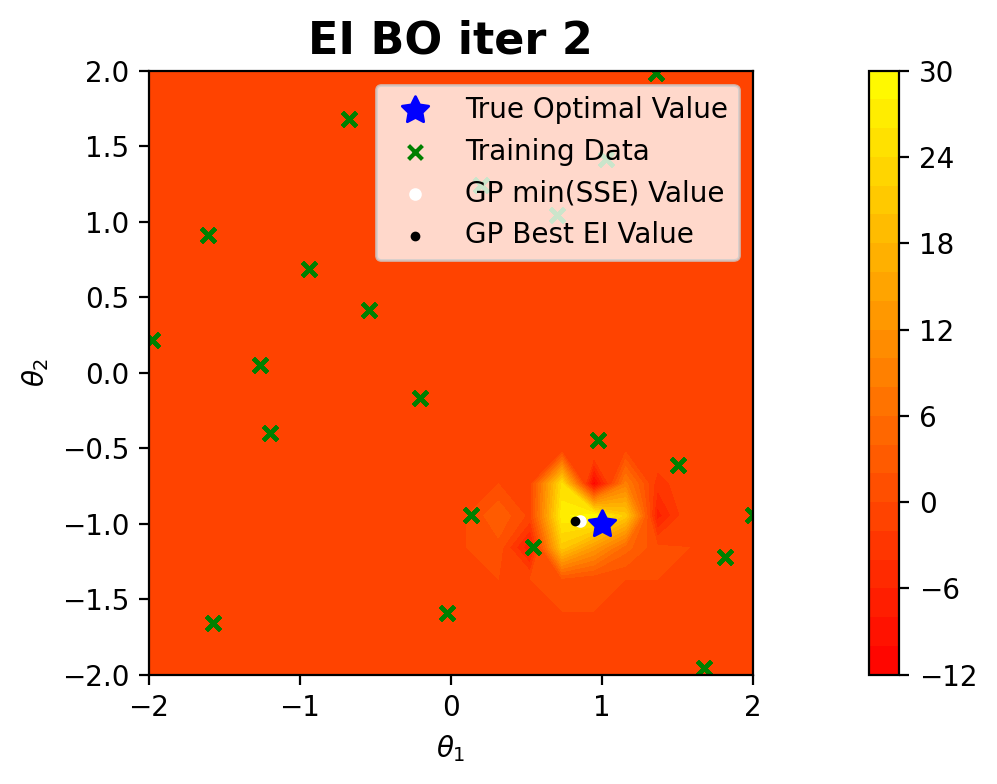

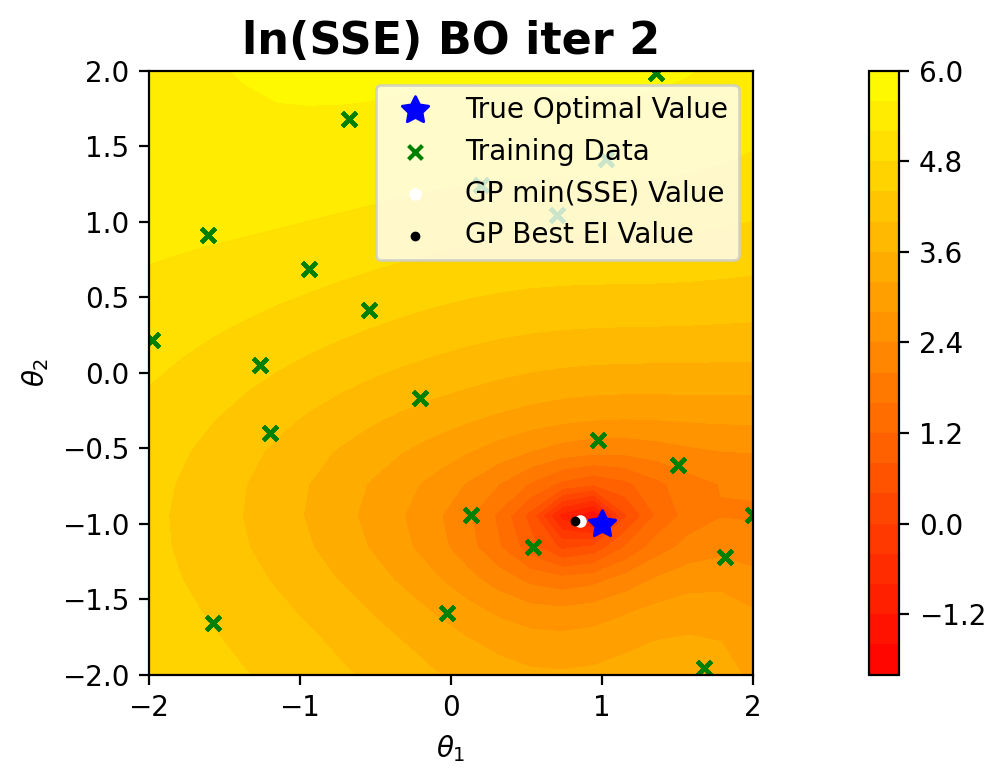

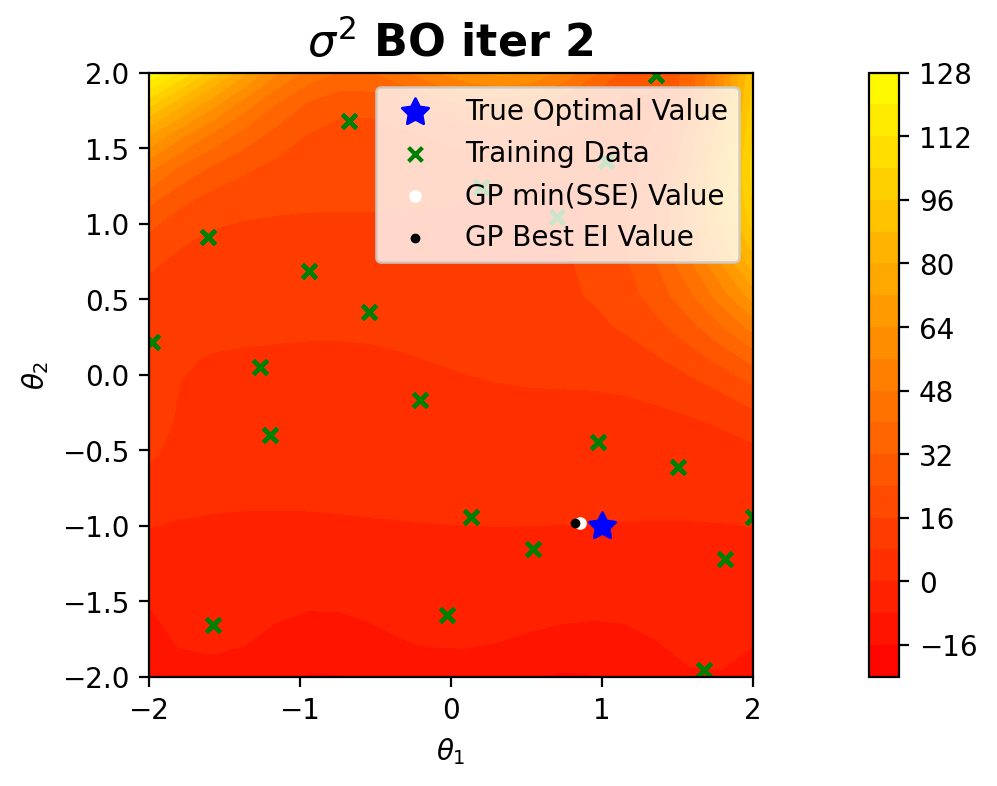

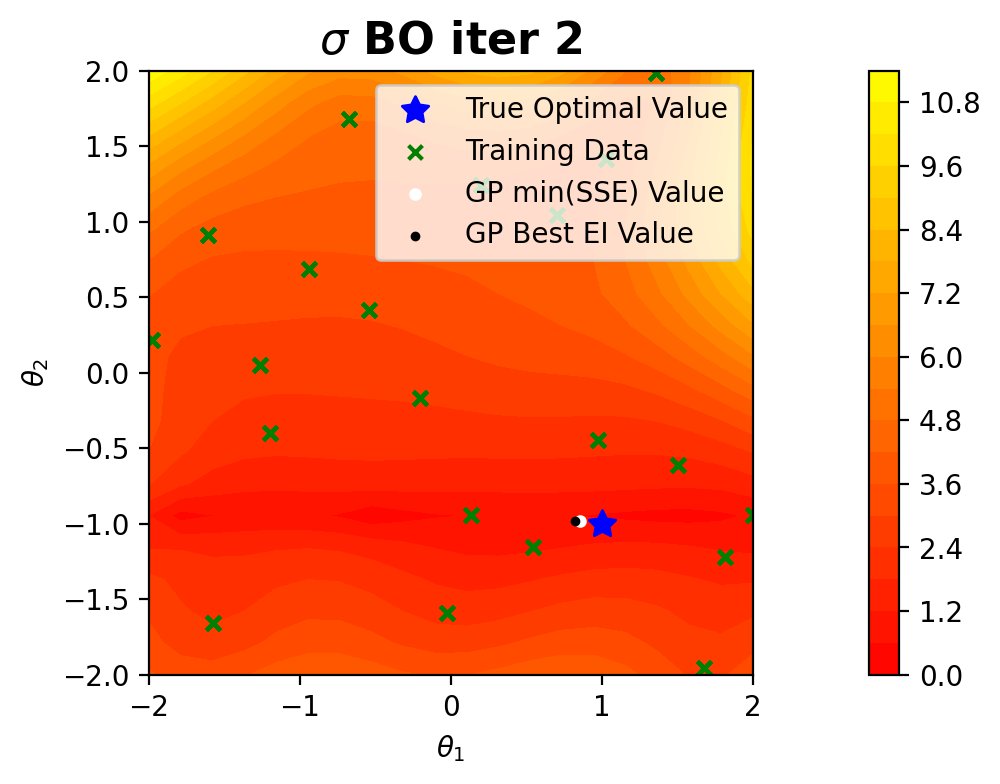

Best Error is: 2.8225
Magnitude of ln(SSE) given Theta_Opt =  [ 0.85612994 -0.98029072] is -1.5691e+00
BO Iteration =  3
Jasrasaria EP: 16.53325340044768
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 1.03142811 -0.94778264]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.96296372 -0.99215228]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 2.174628342210042 



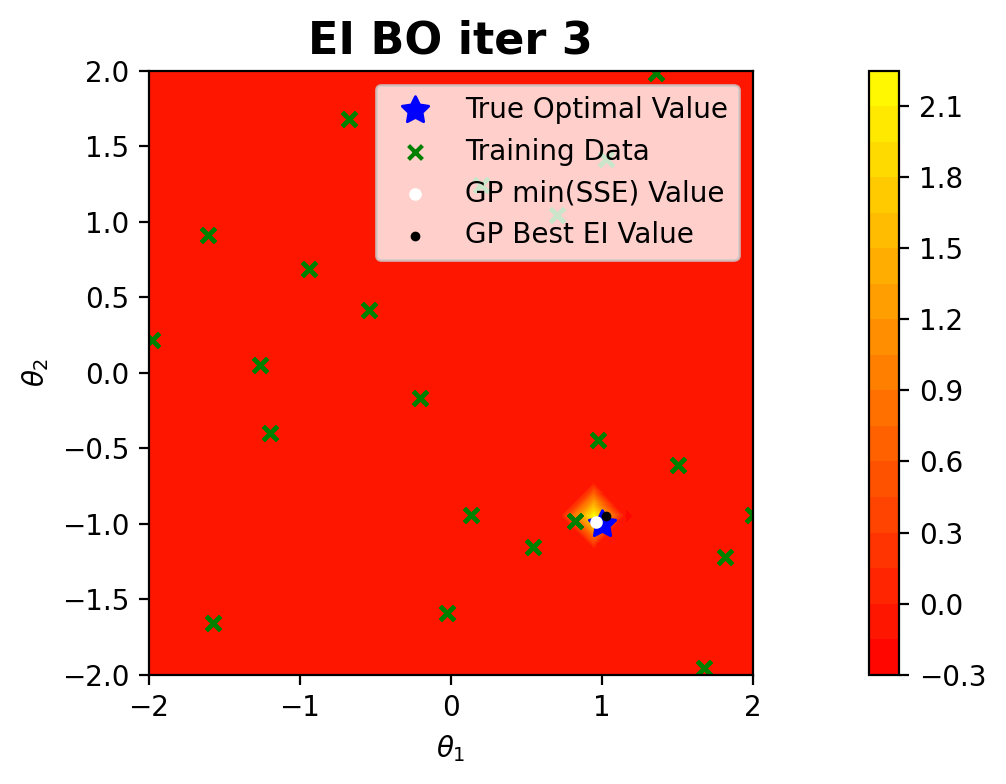

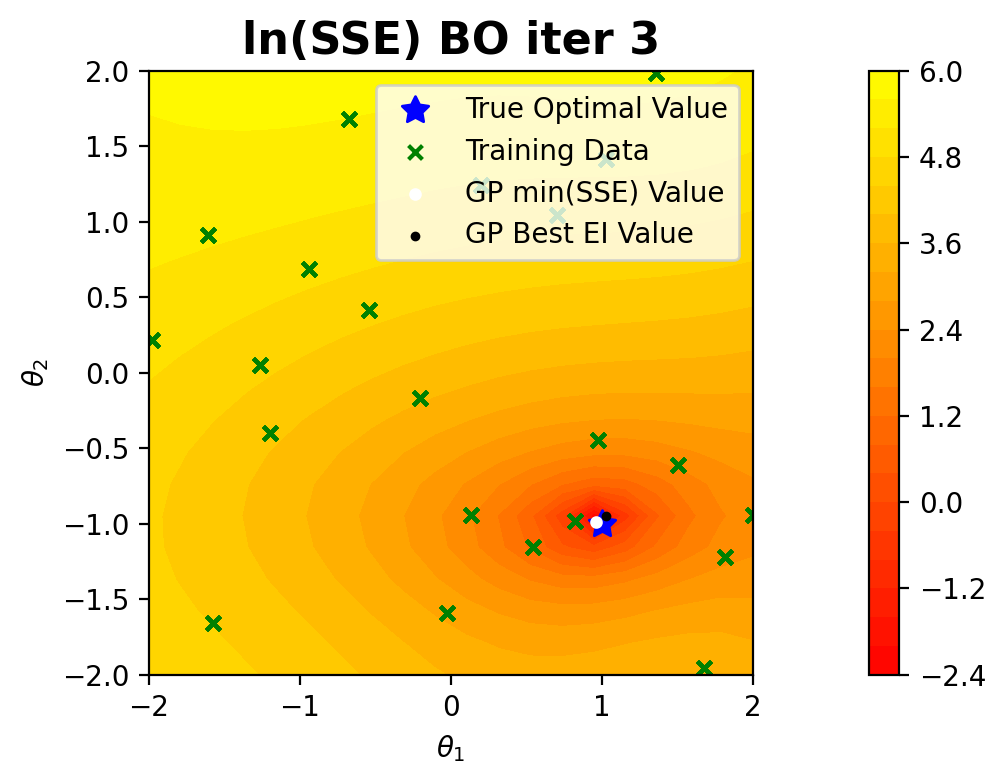

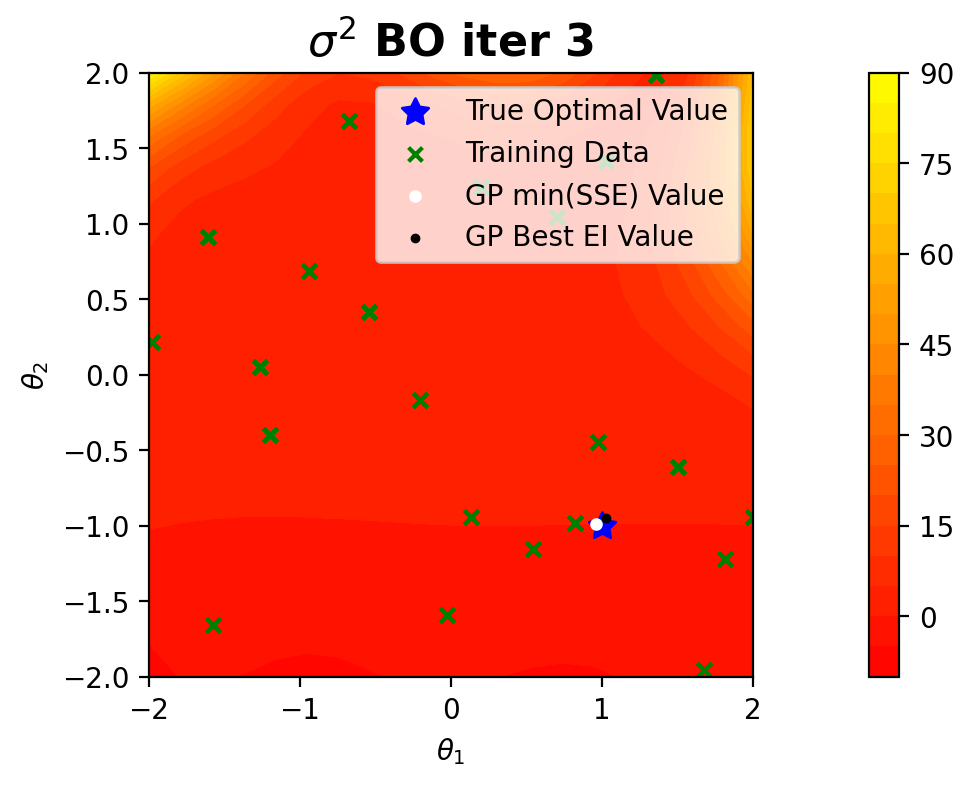

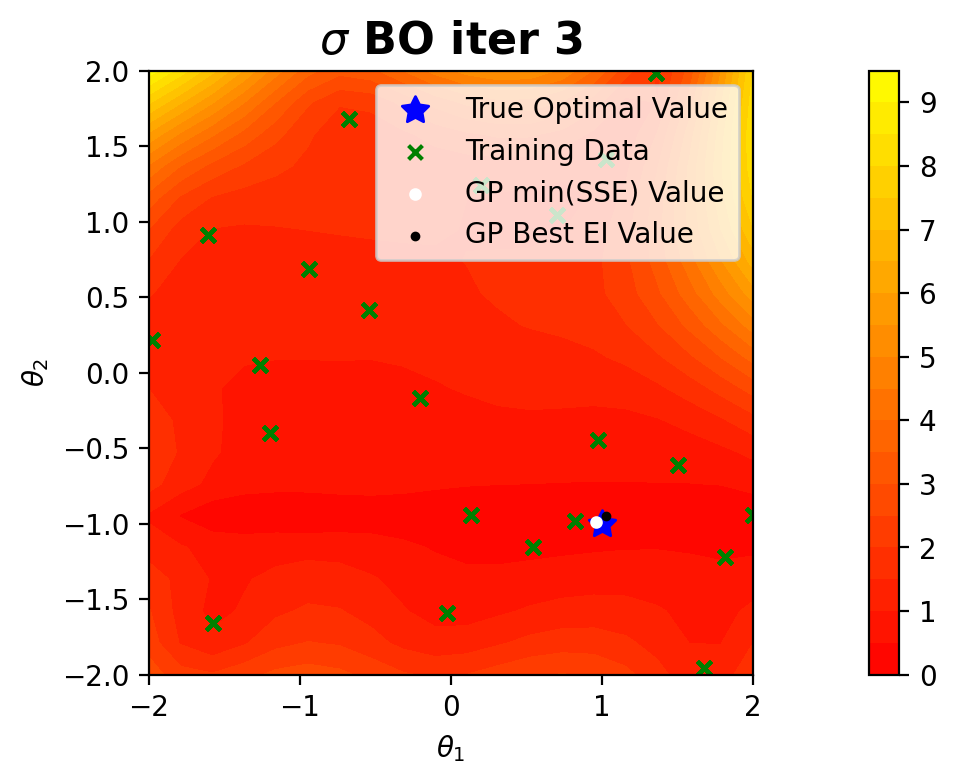

Best Error is: 0.3173
Magnitude of ln(SSE) given Theta_Opt =  [ 0.96296372 -0.99215228] is -4.2735e+00
BO Iteration =  4
Jasrasaria EP: 29.289099643908028
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.94644666 -0.94653167]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.99246784 -0.99489699]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.32262548959706544 



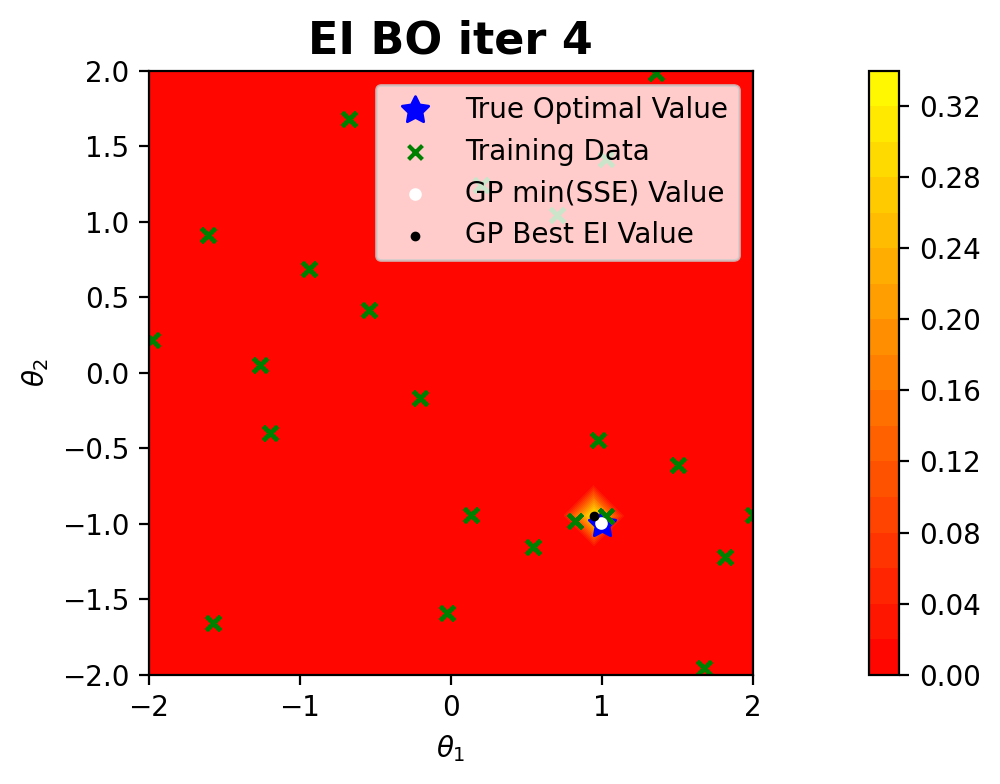

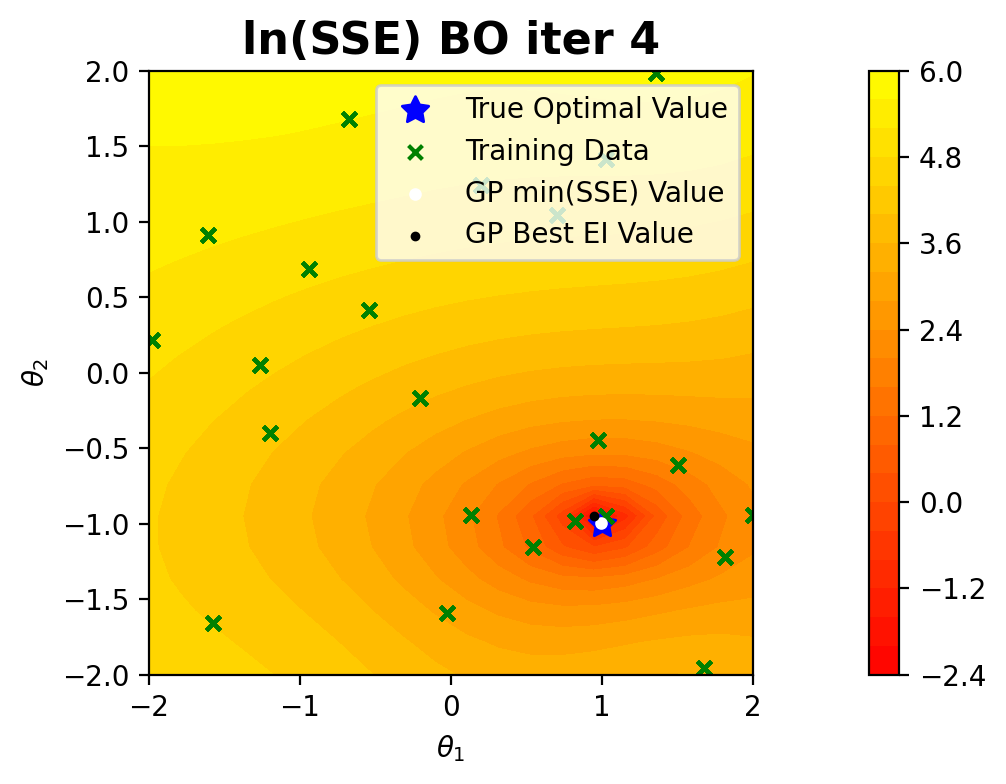

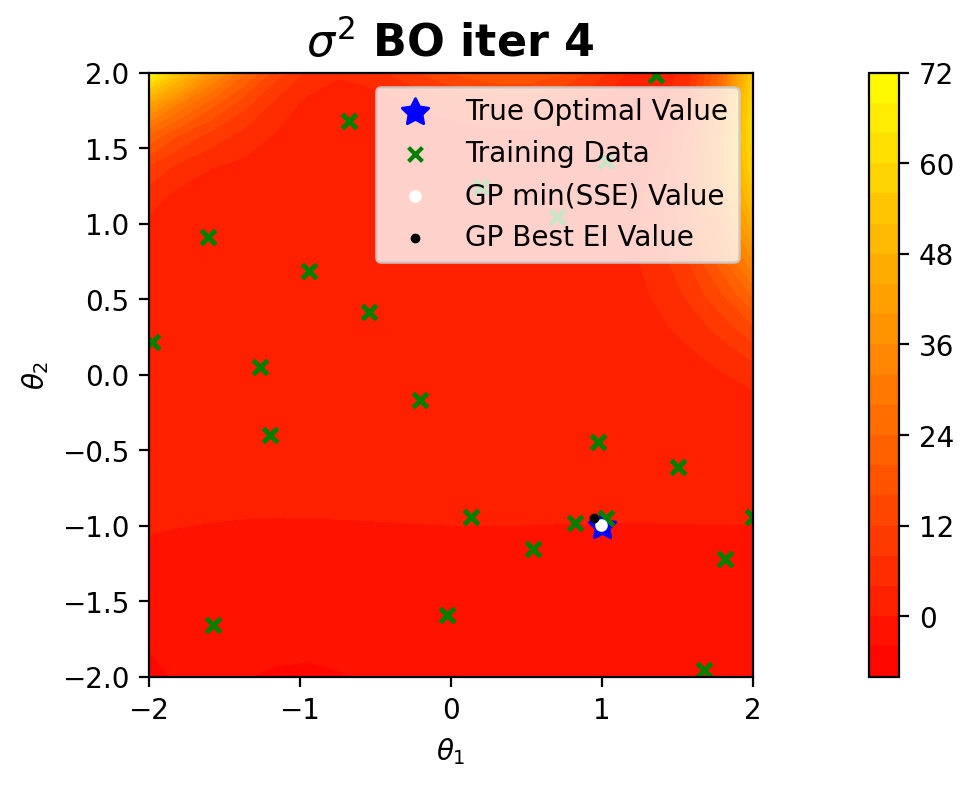

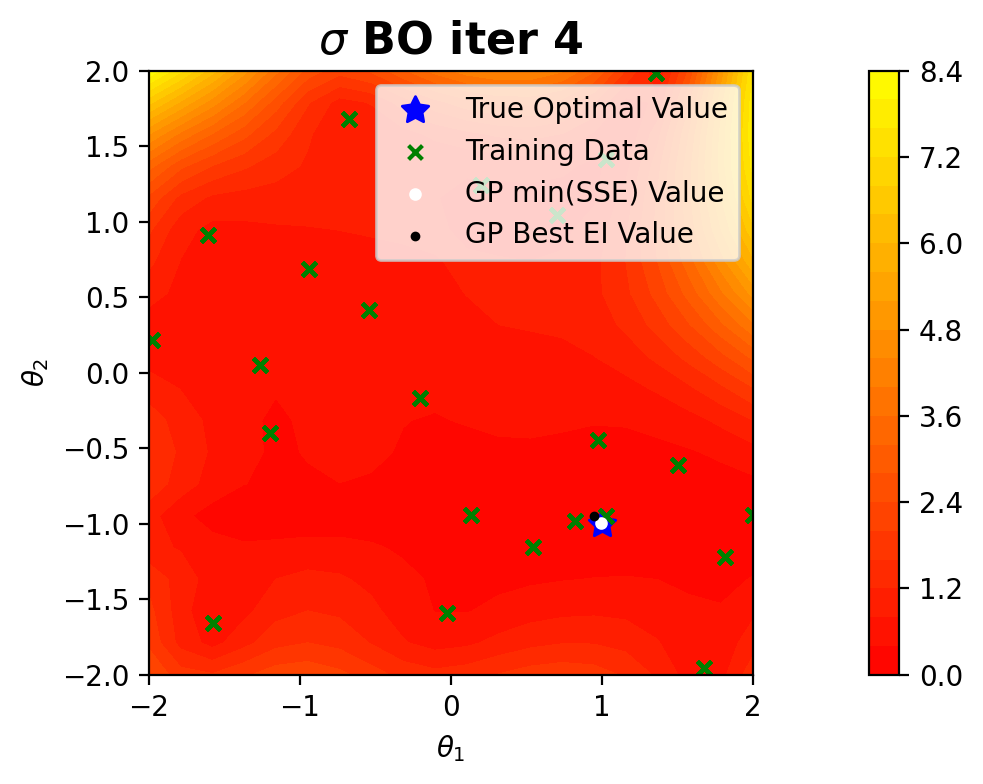

Best Error is: 0.119
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99246784 -0.99489699] is -6.0000e+00
BO Iteration =  5
Jasrasaria EP: 23.961757053242778
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.9446181  -0.94461833]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.994176   -0.99389804]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.23595592913198035 



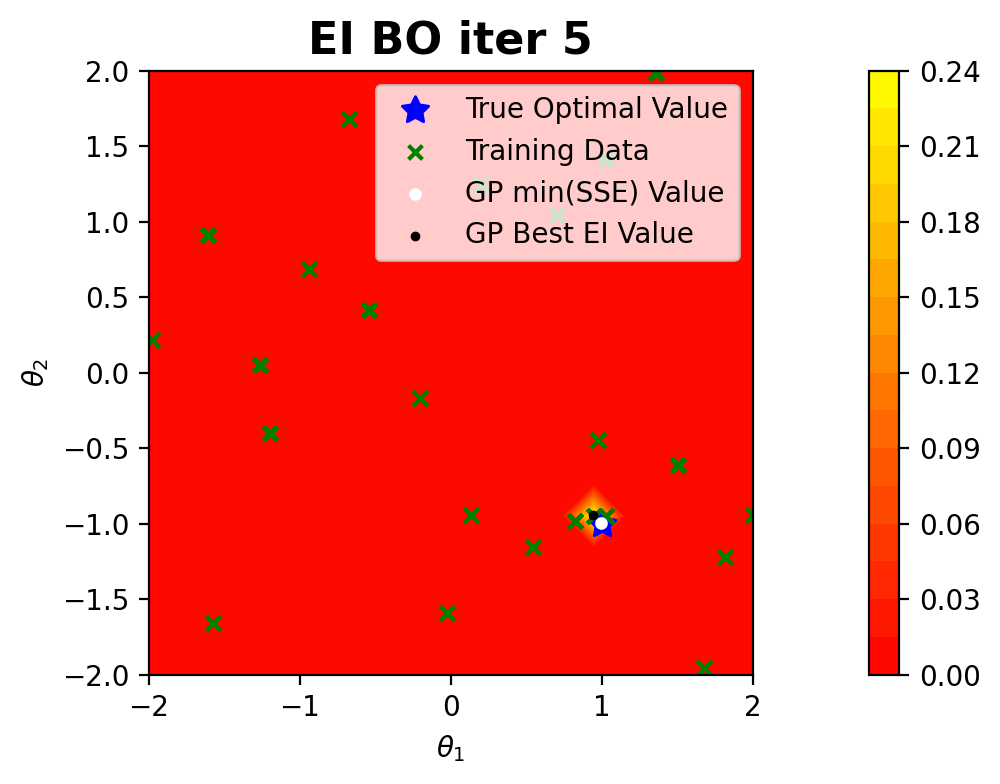

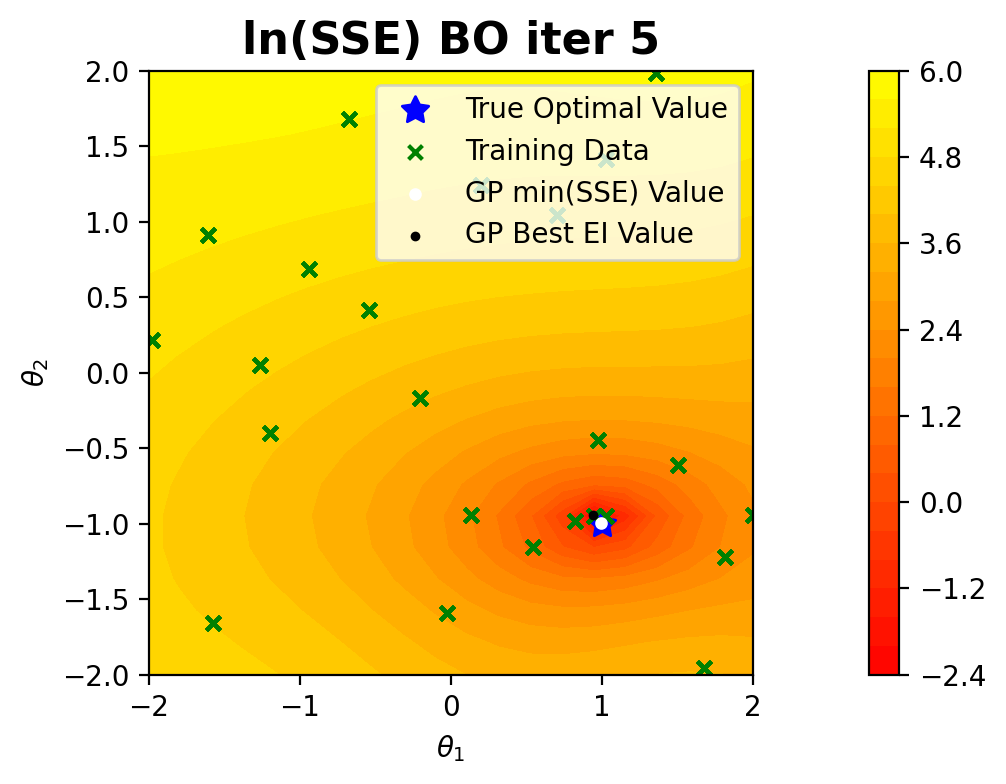

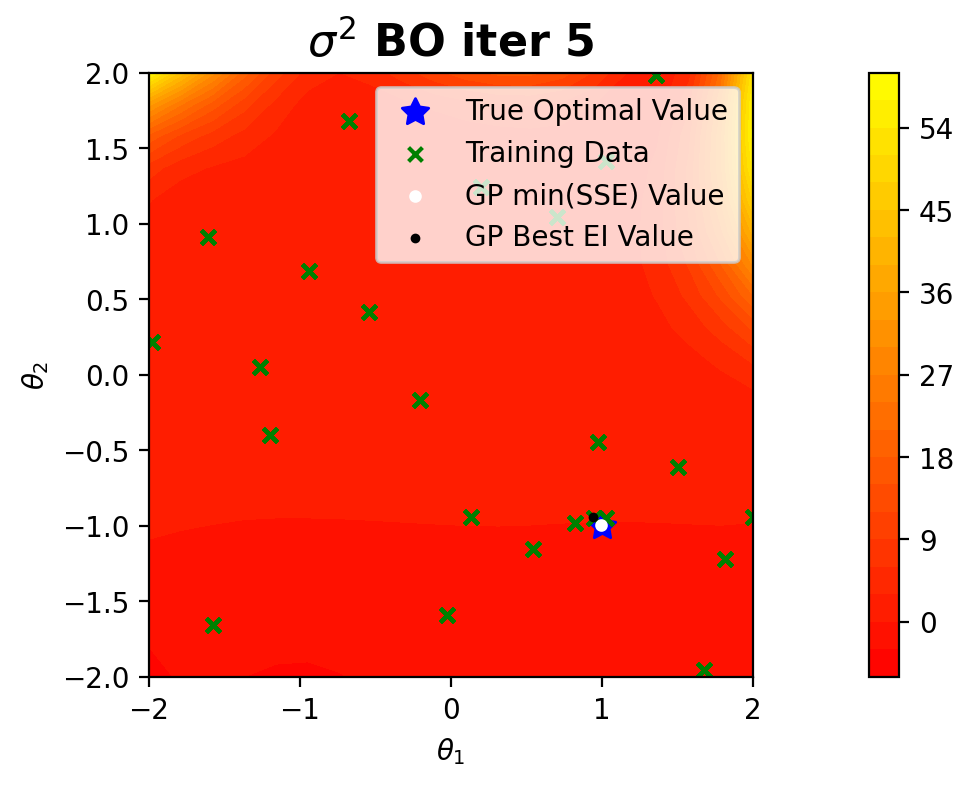

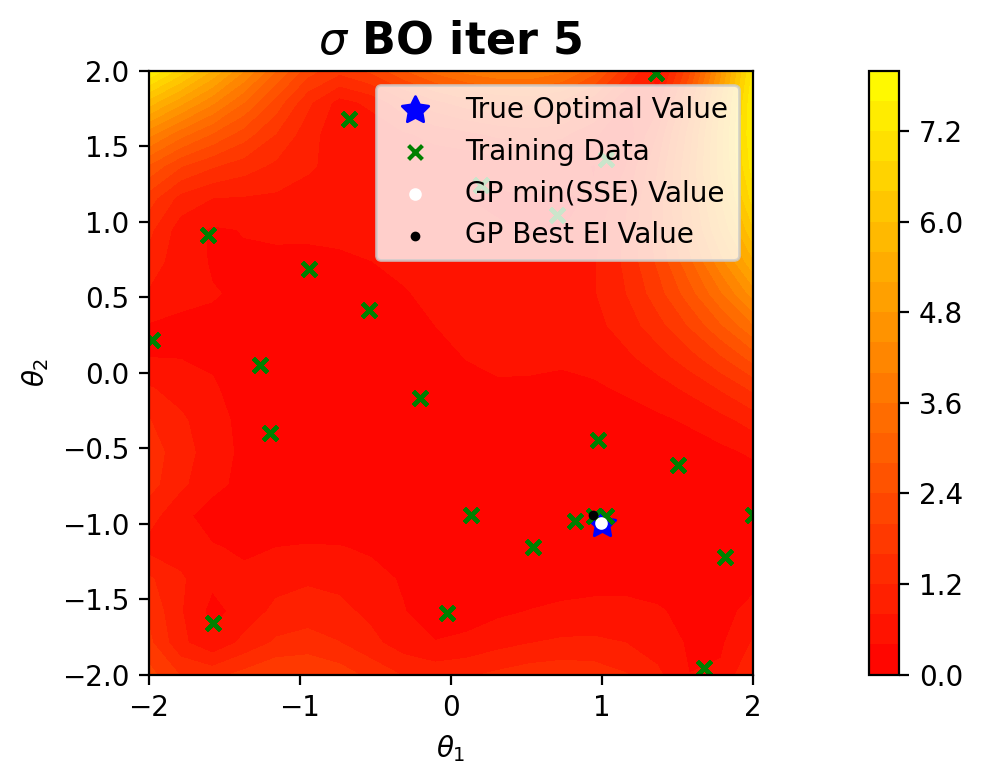

Best Error is: 0.119
Magnitude of ln(SSE) given Theta_Opt =  [ 0.994176   -0.99389804] is -5.7885e+00
BO Iteration =  6
Jasrasaria EP: 21.609493019794044
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.95552862 -0.956547  ]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.99376401 -0.99333901]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.299100325082286 



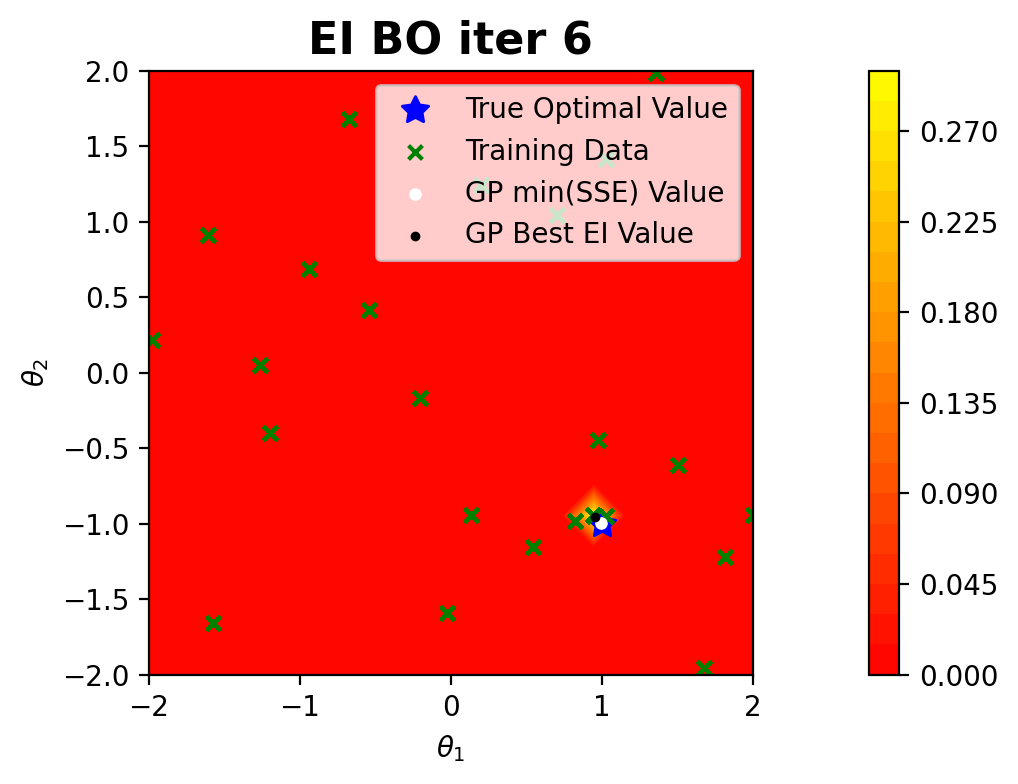

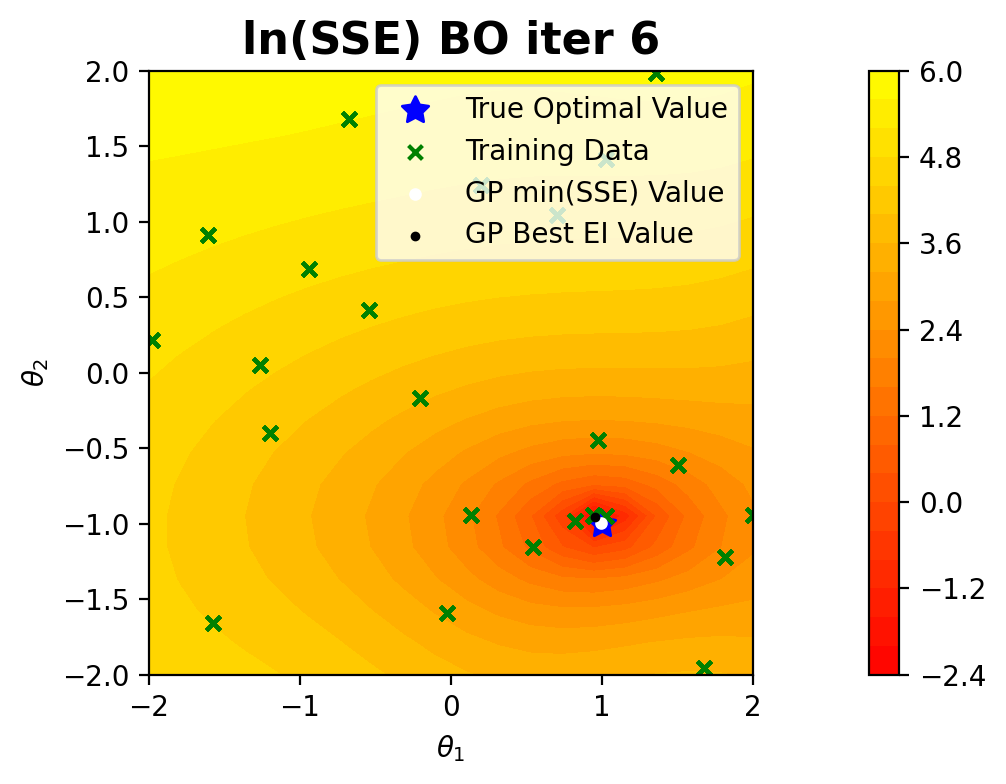

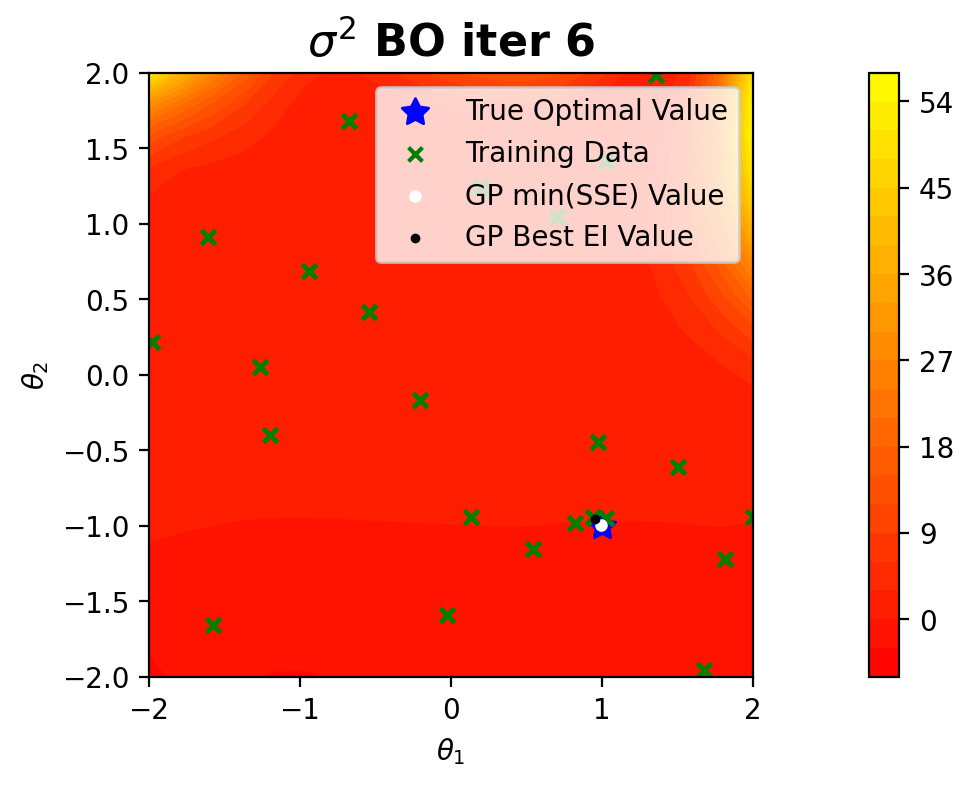

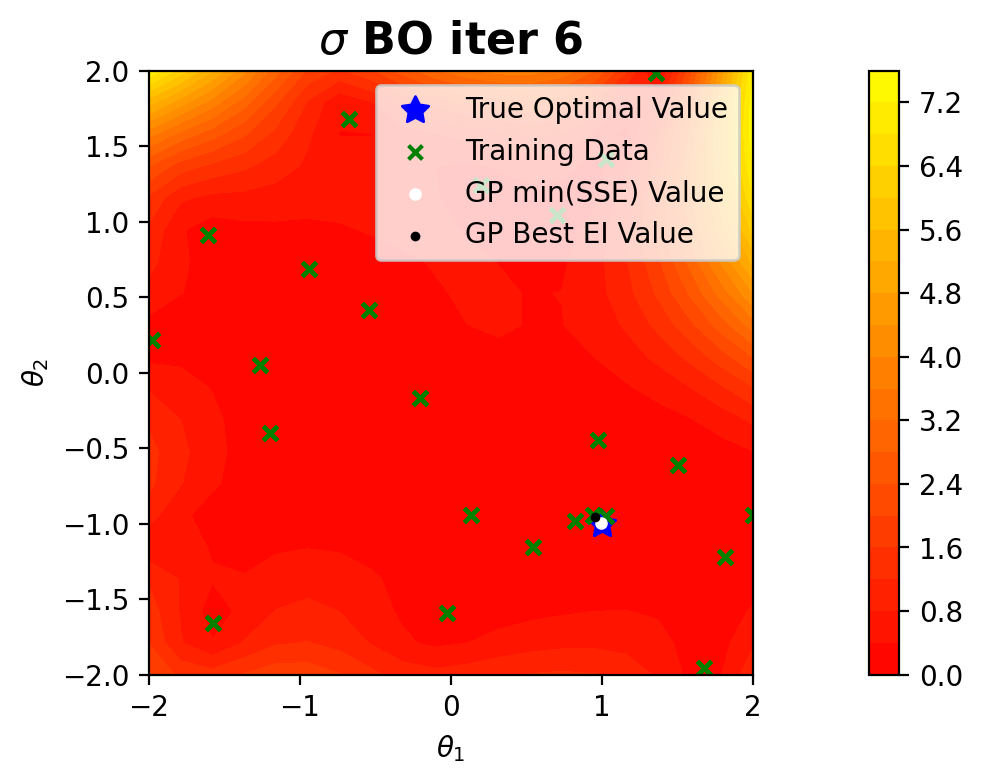

Best Error is: 0.119
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99376401 -0.99333901] is -5.6744e+00
BO Iteration =  7
Jasrasaria EP: 27.38145839654045
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.94735046 -0.94733487]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.99364012 -0.99329464]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.008659702196252495 



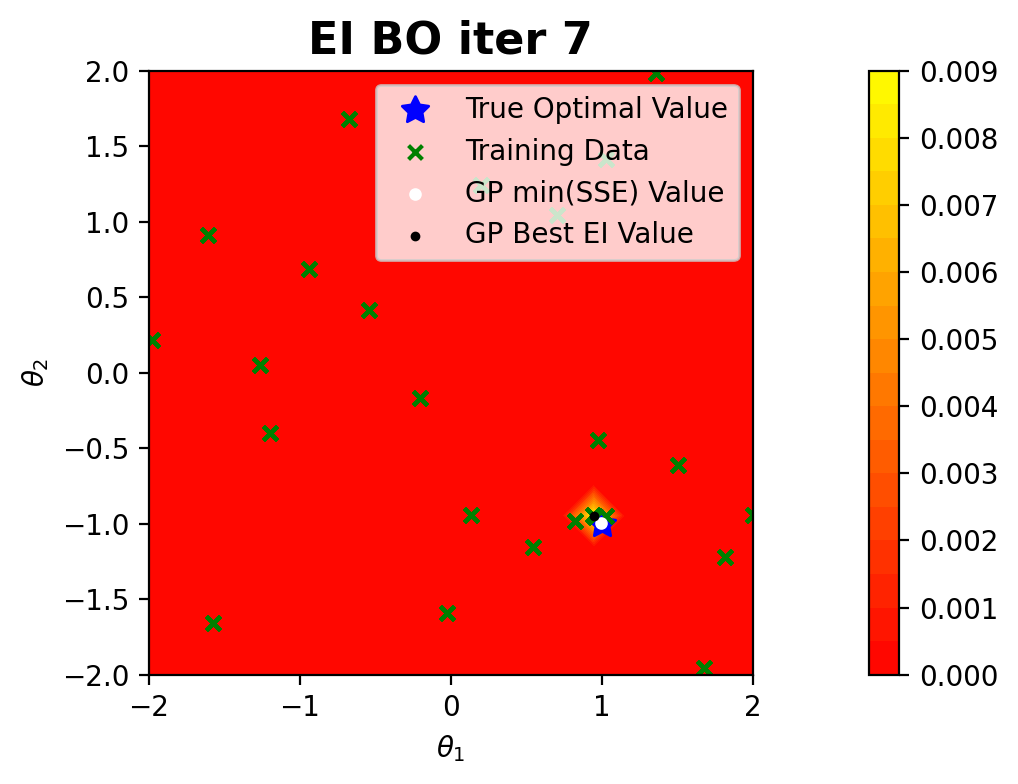

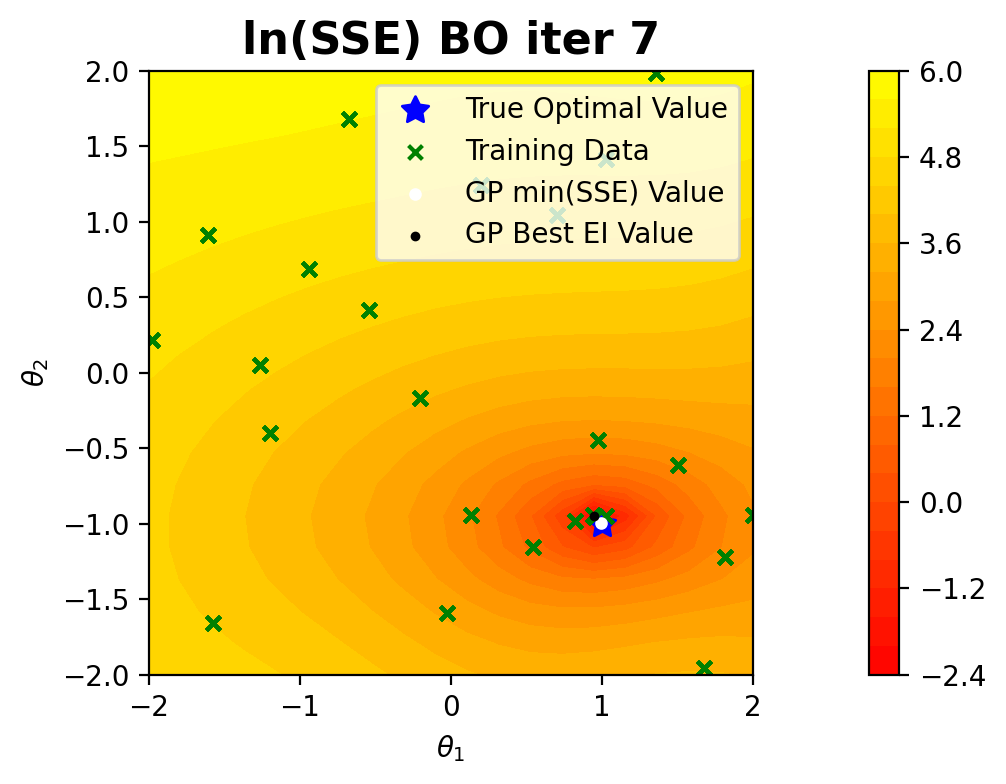

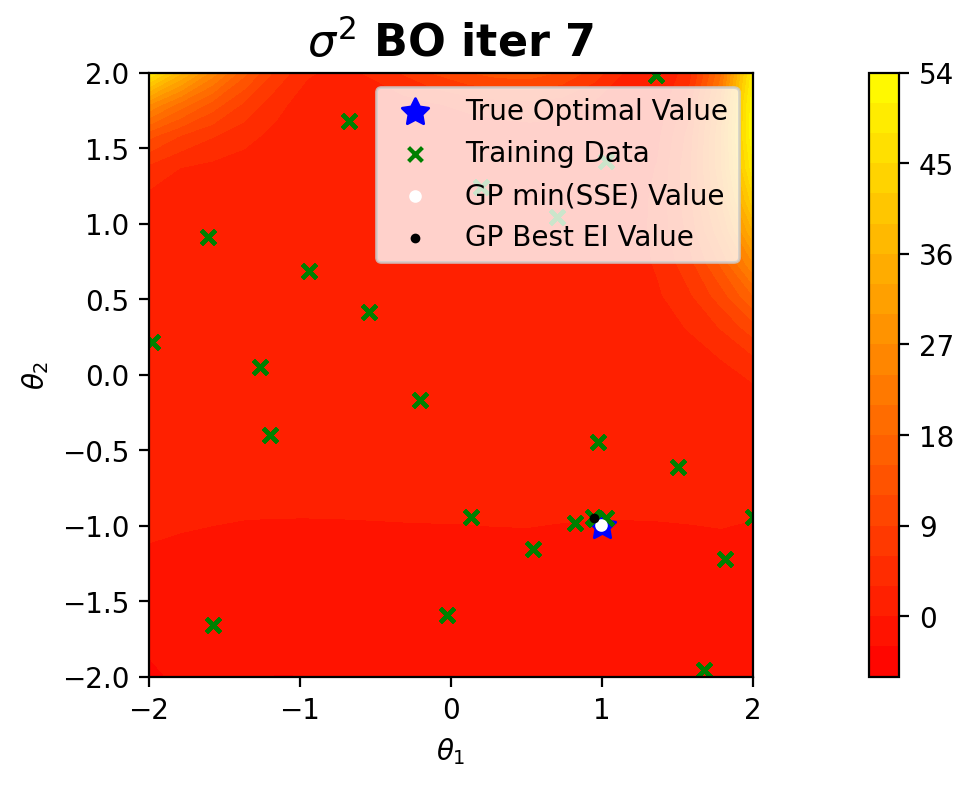

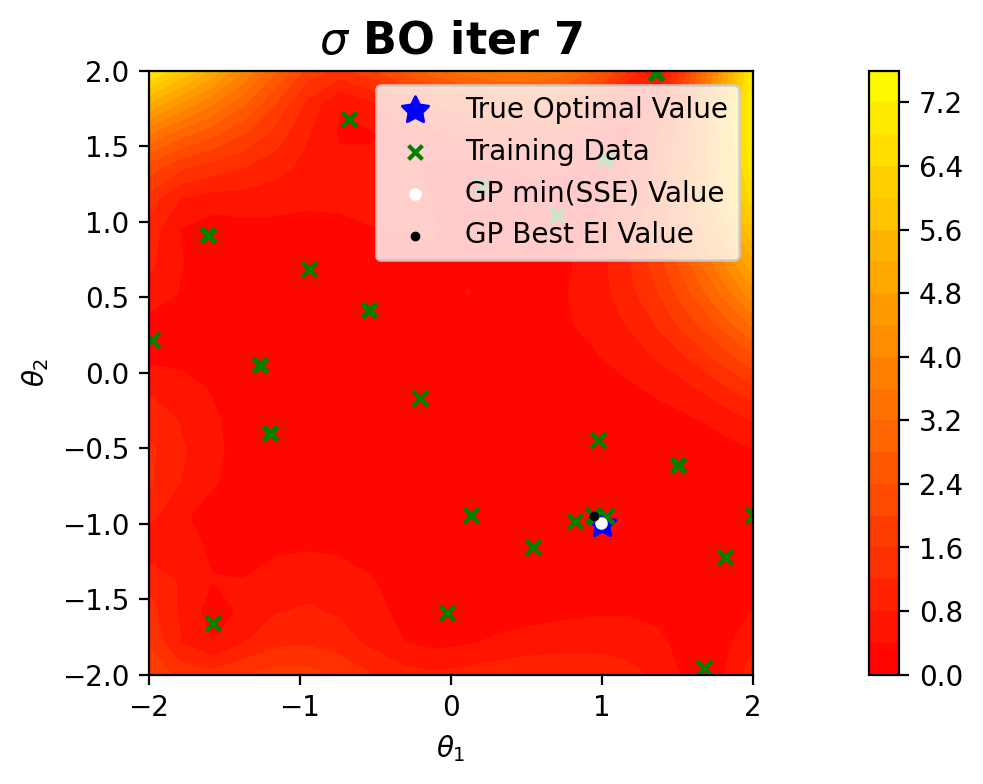

Best Error is: 0.0893
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99364012 -0.99329464] is -5.6654e+00
BO Iteration =  8
Jasrasaria EP: 26.780918379751256
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.99263424 -0.99231027]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.99360277 -0.99330154]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.002145277786001017 



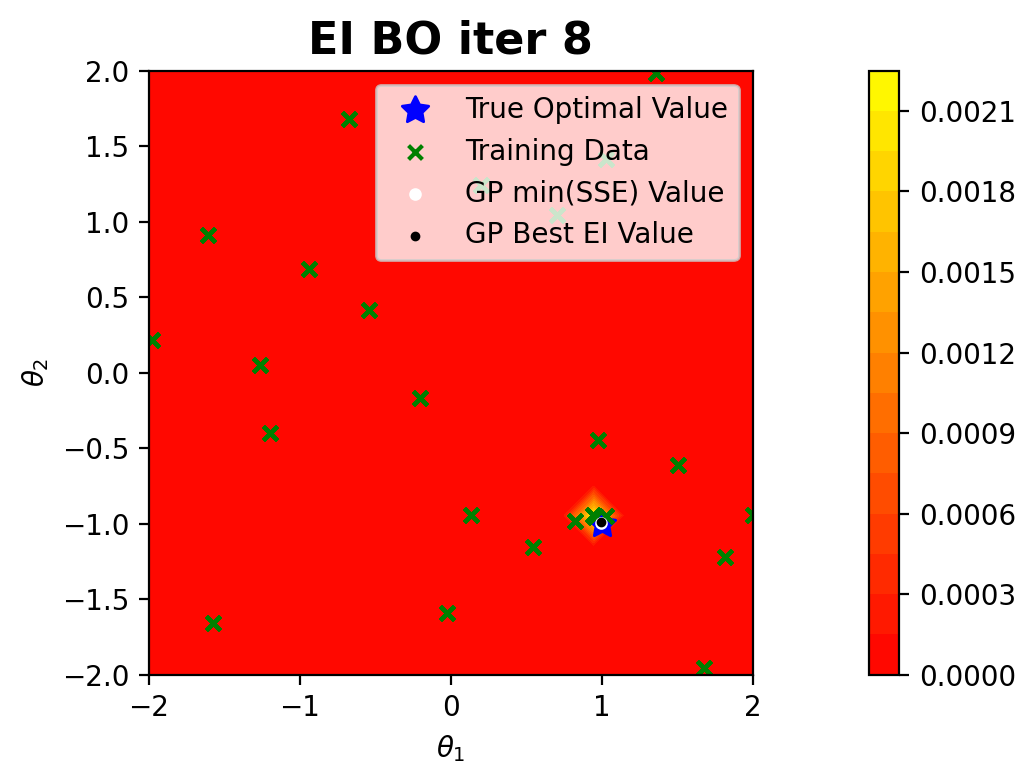

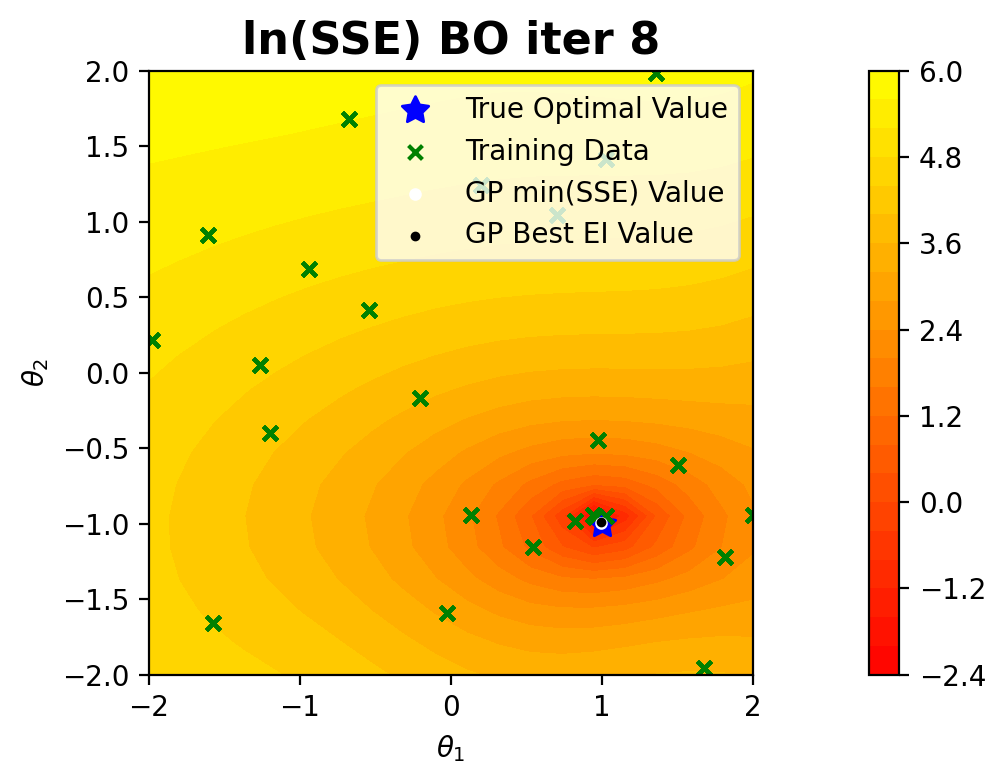

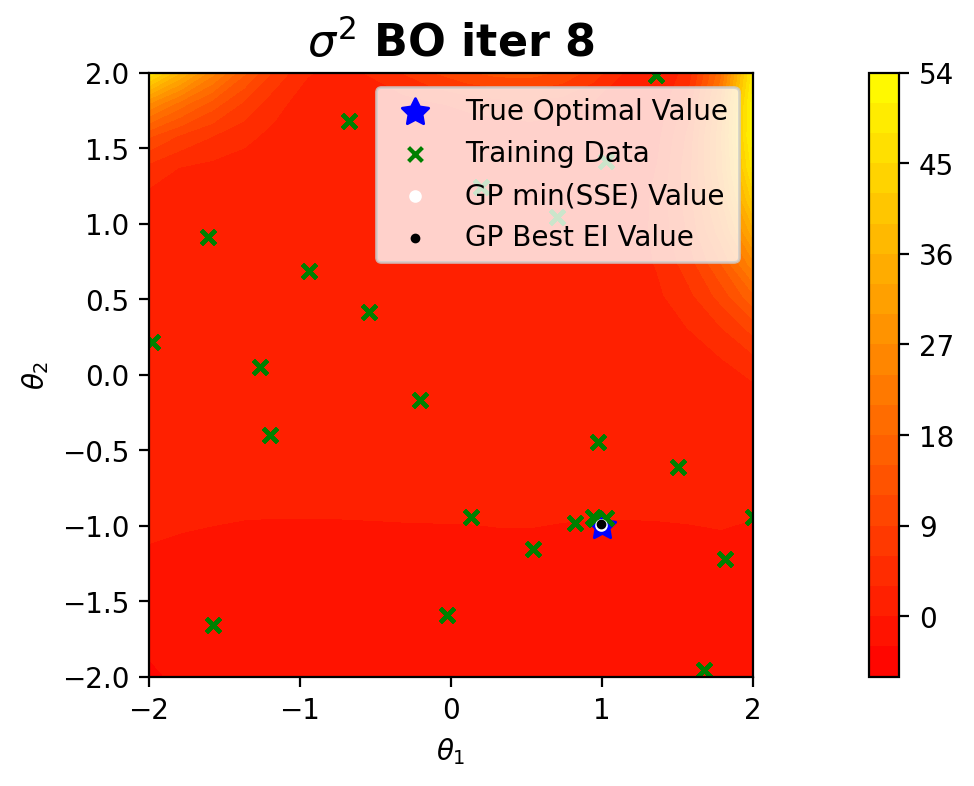

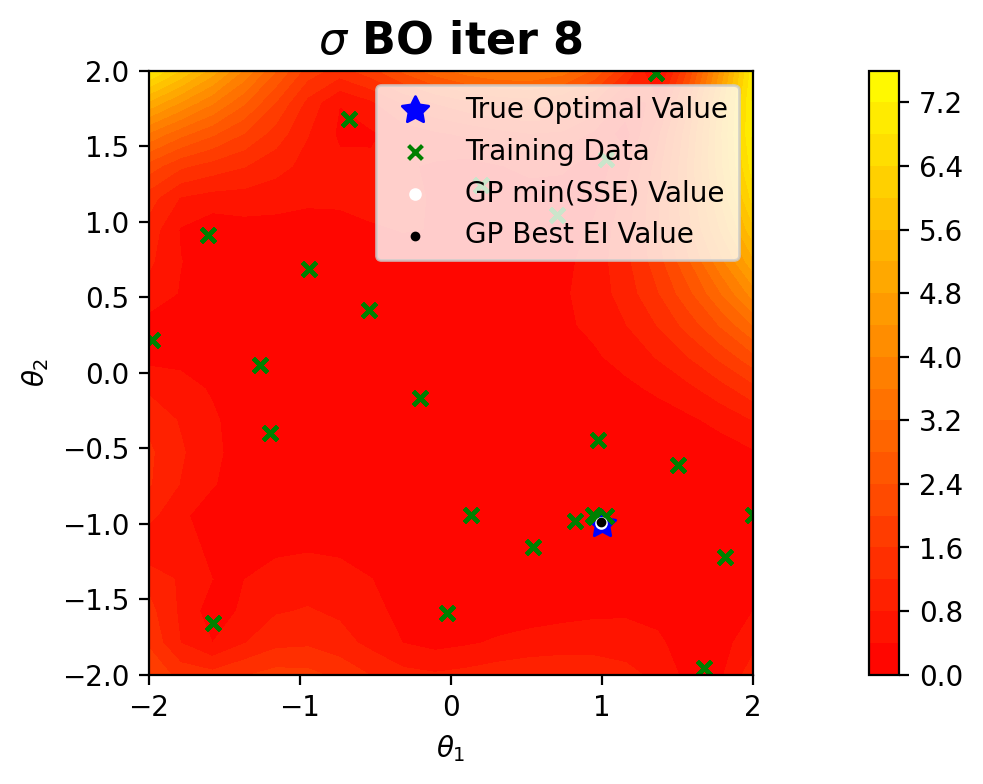

Best Error is: 0.0893
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99360277 -0.99330154] is -5.6667e+00
BO Iteration =  9
Jasrasaria EP: 551.6590914124384
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99373795 -0.99359911]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



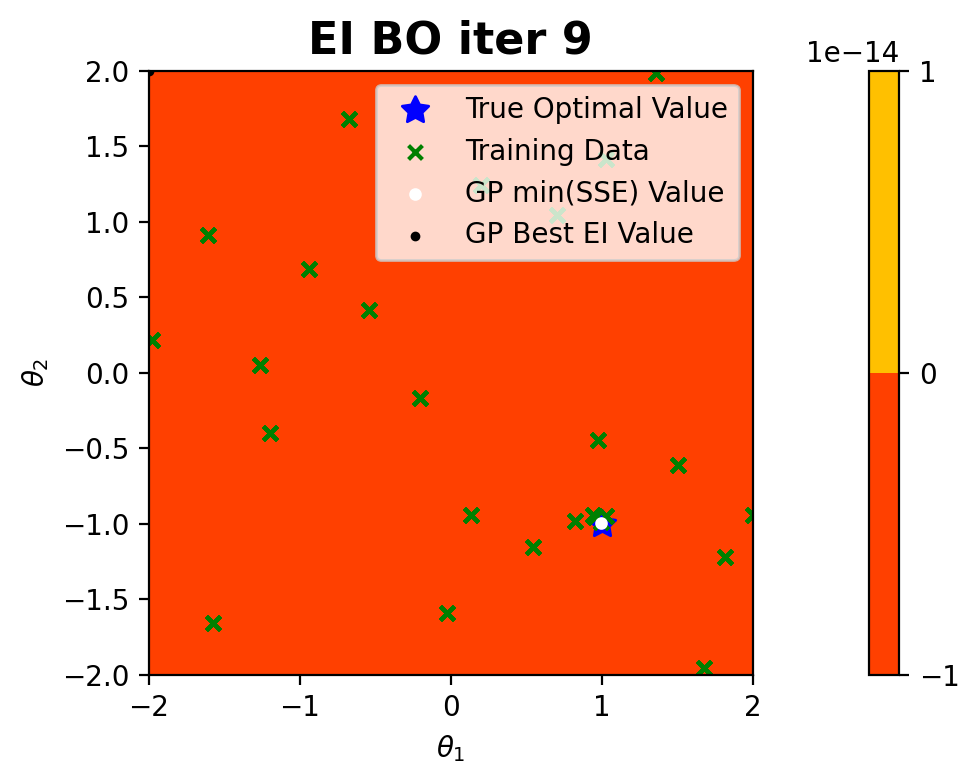

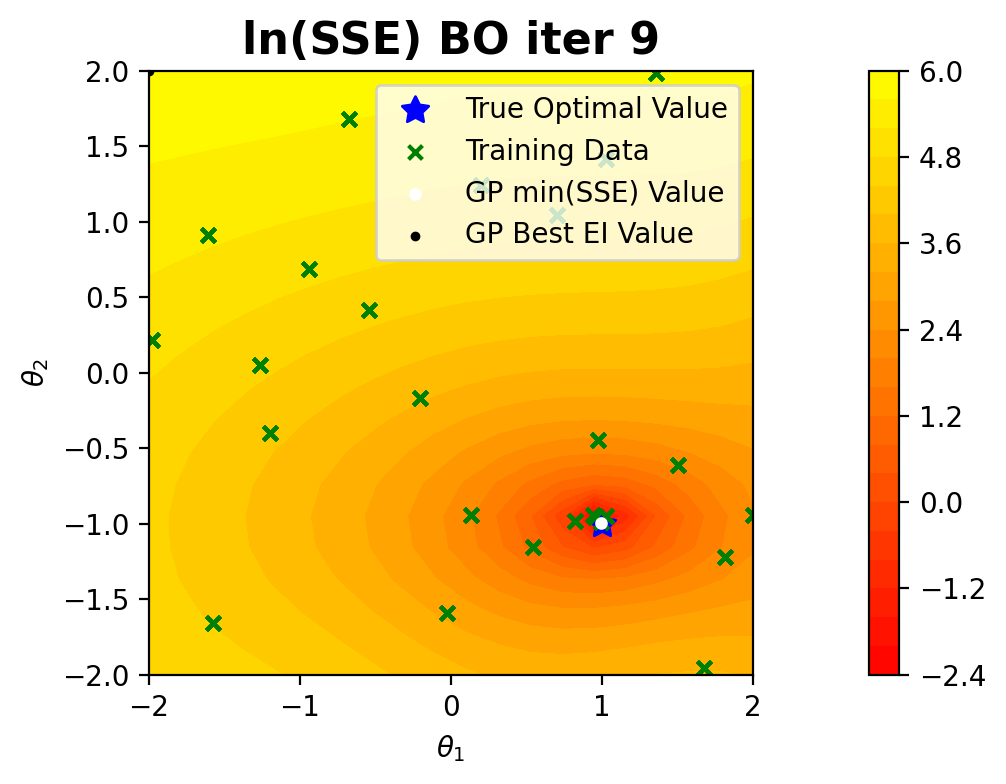

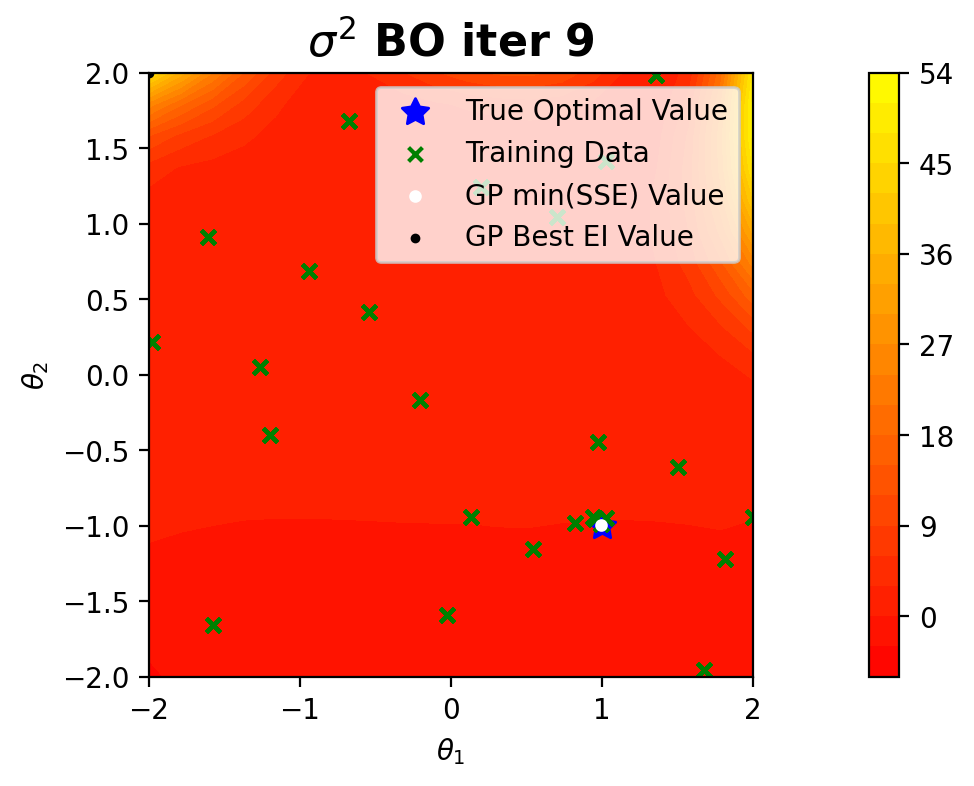

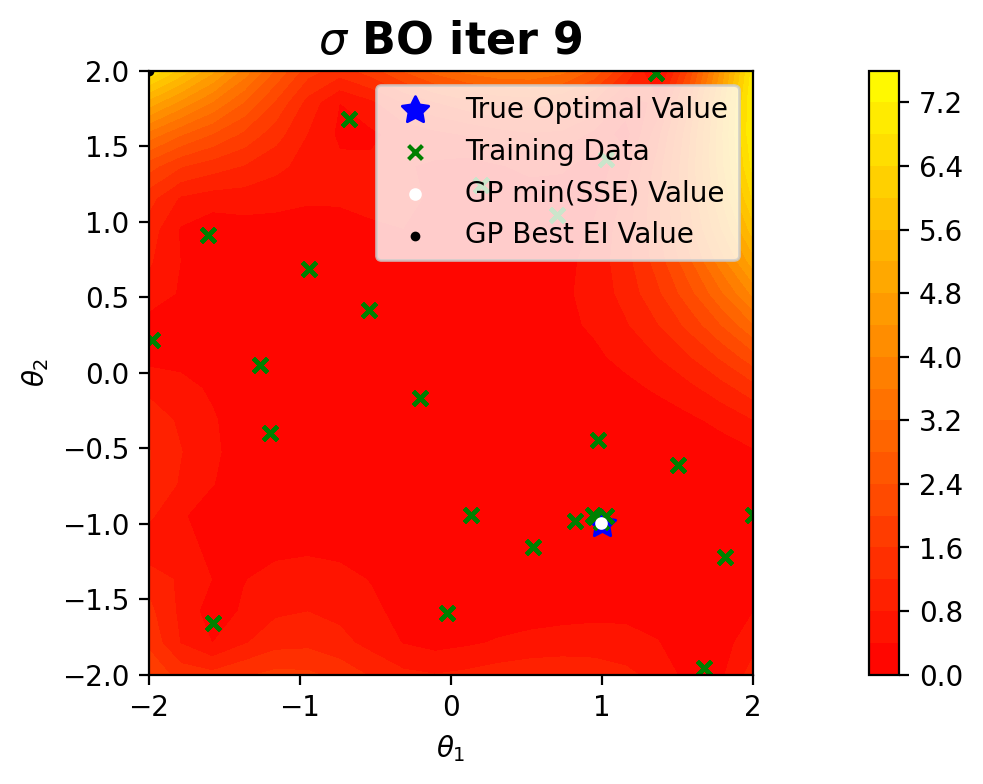

Best Error is: 0.0042
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99373795 -0.99359911] is -5.7266e+00
BO Iteration =  10
Jasrasaria EP: 415.72505622555906
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99371526 -0.99333296]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



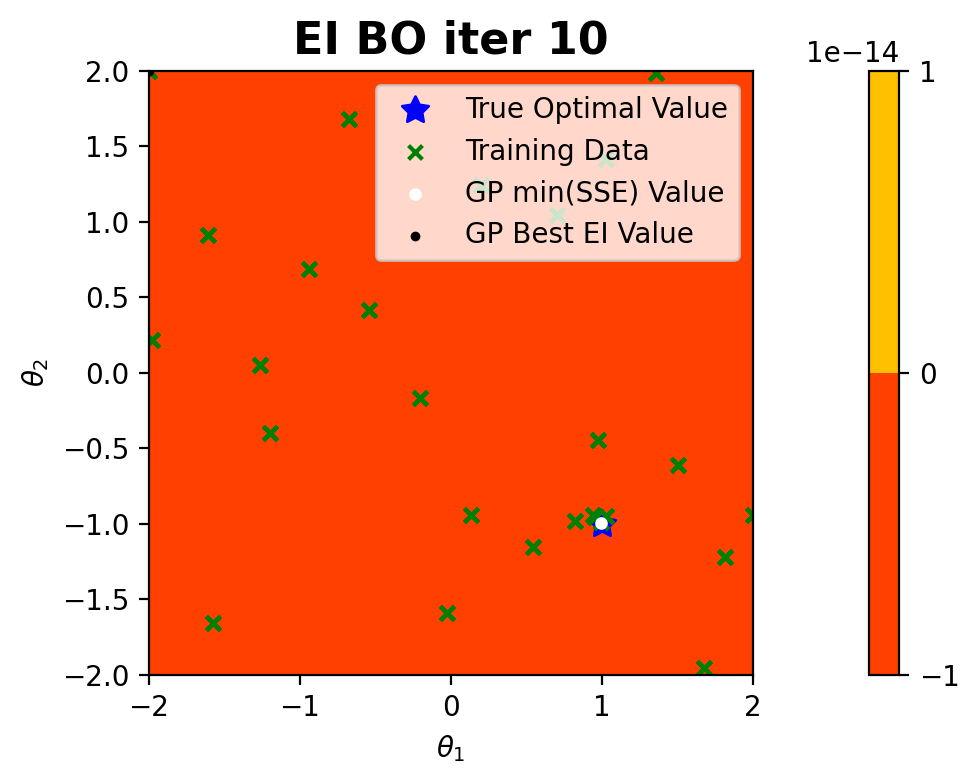

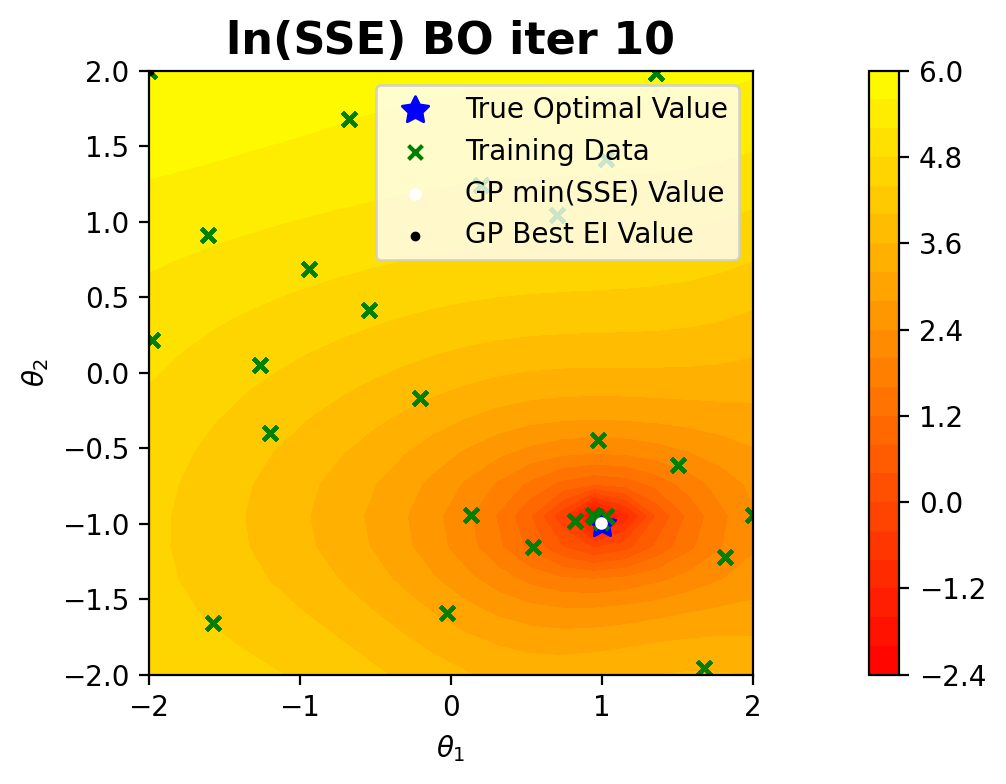

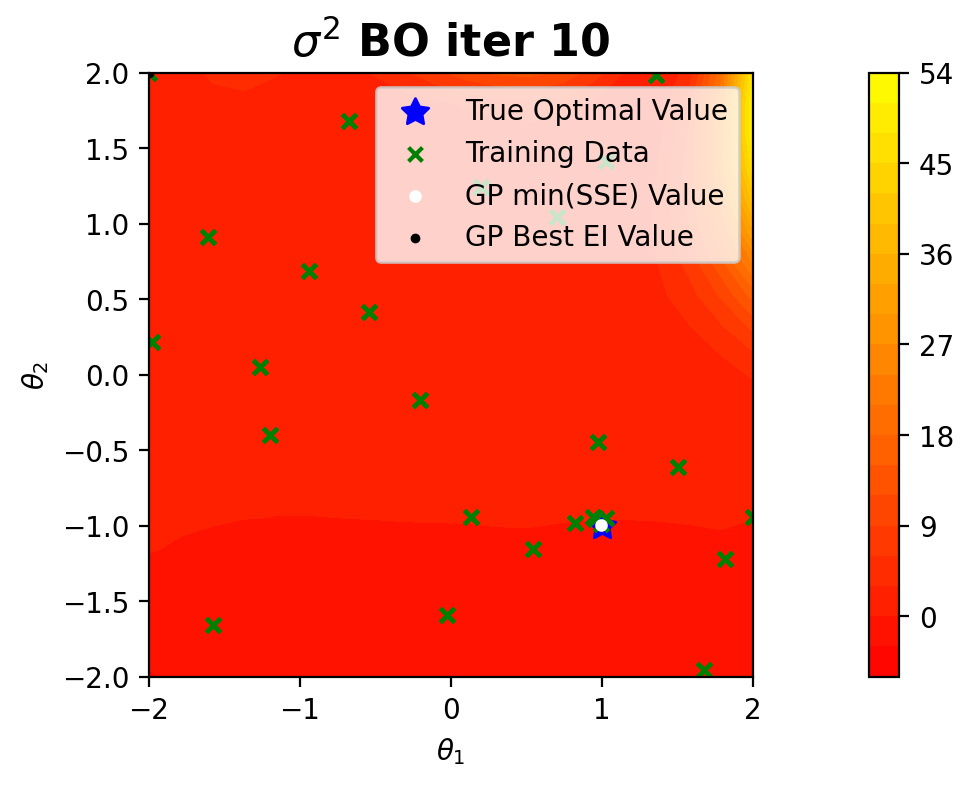

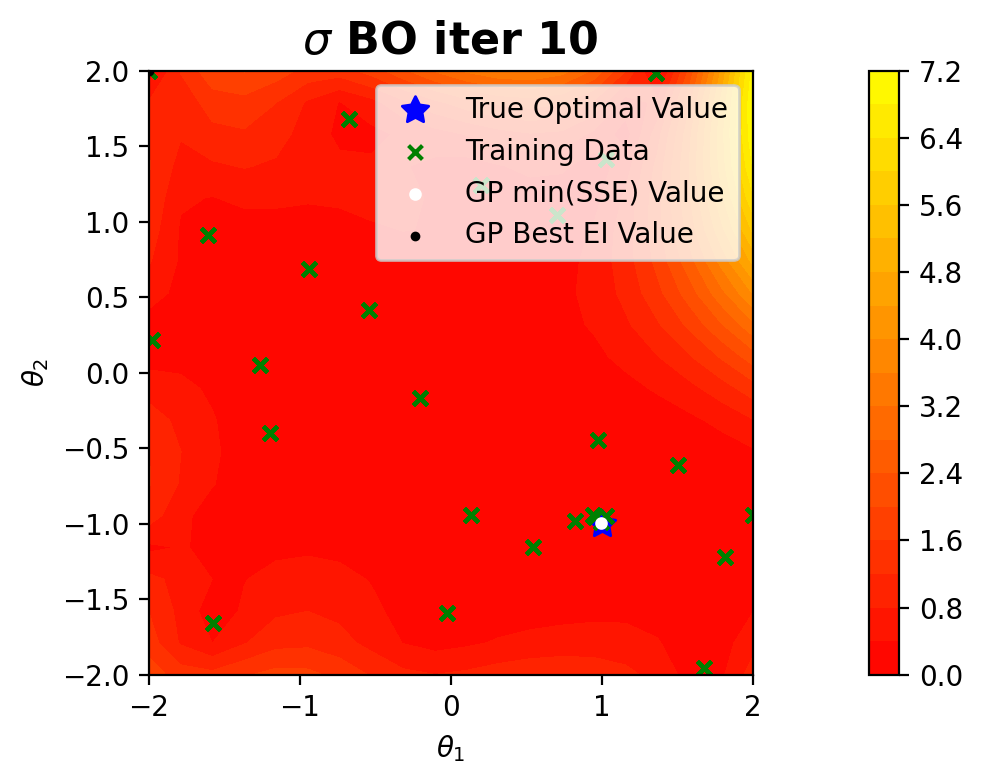

Best Error is: 0.0042
Run Number:  3


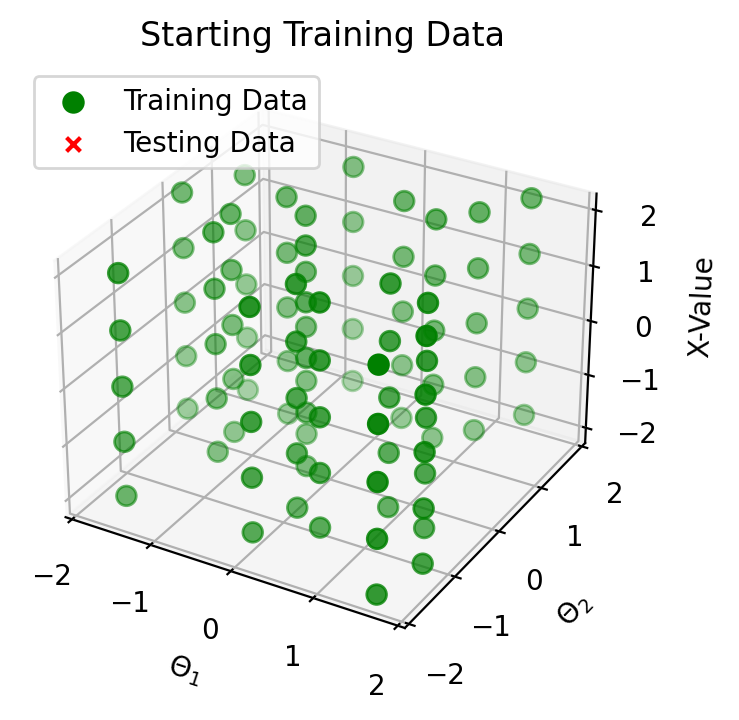

BO Iteration =  1
Jasrasaria EP: tensor(0)
Boyle EP: tensor(0)
Exp EP: tensor(0)
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 1.99999996 -0.94736839]
Argmax Theta Best =  [ 2.         -0.94736842]
Scipy Theta Opt =  [ 0.78260047 -0.96536031]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842]
EI_max = 60.632231564241614 



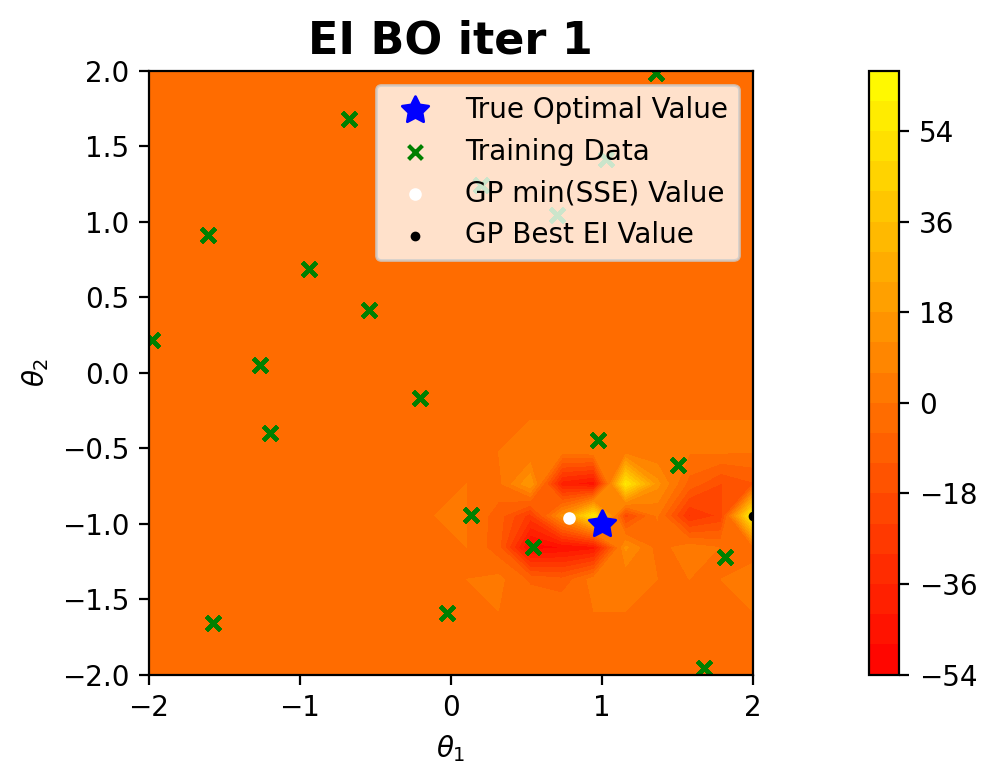

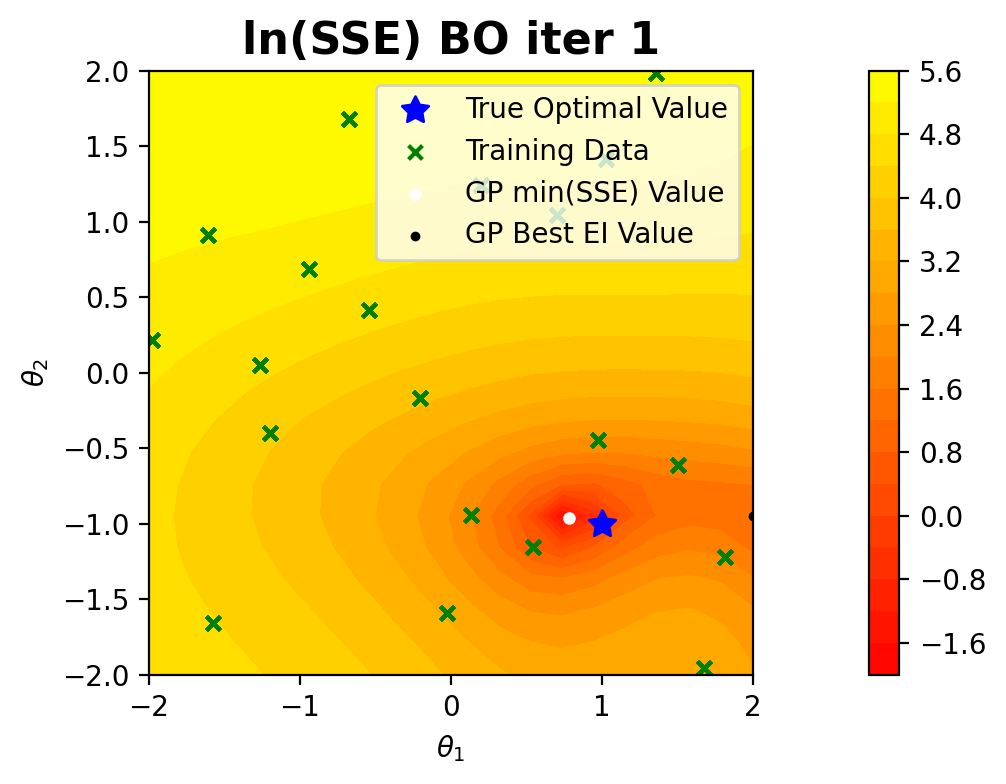

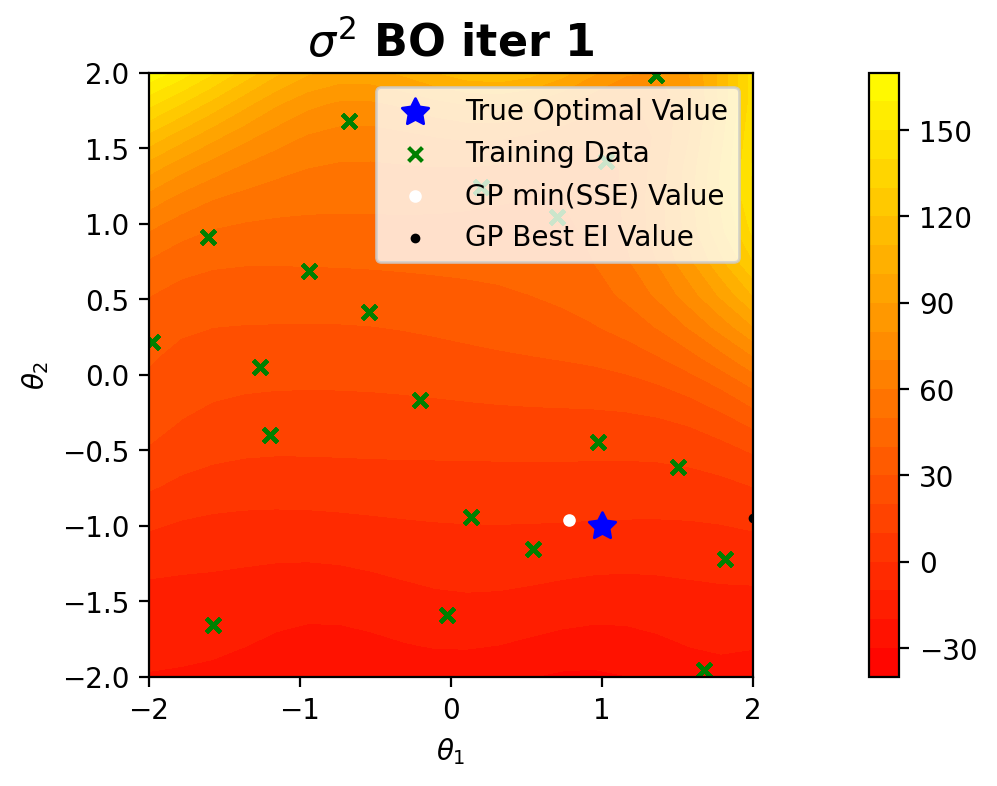

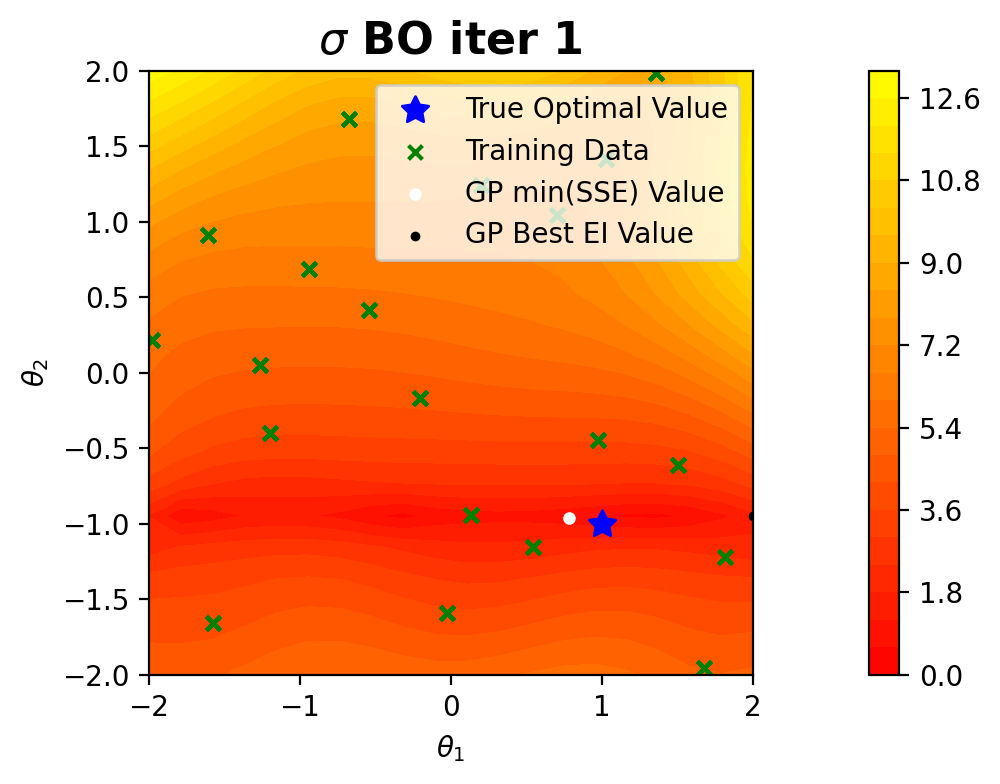

Best Error is: 2.8225
Magnitude of ln(SSE) given Theta_Opt =  [ 0.78260047 -0.96536031] is -7.0104e-01
BO Iteration =  2
Jasrasaria EP: 5.033820932863699
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.84518369 -0.97822881]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.85609512 -0.98031794]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 29.75852714753055 



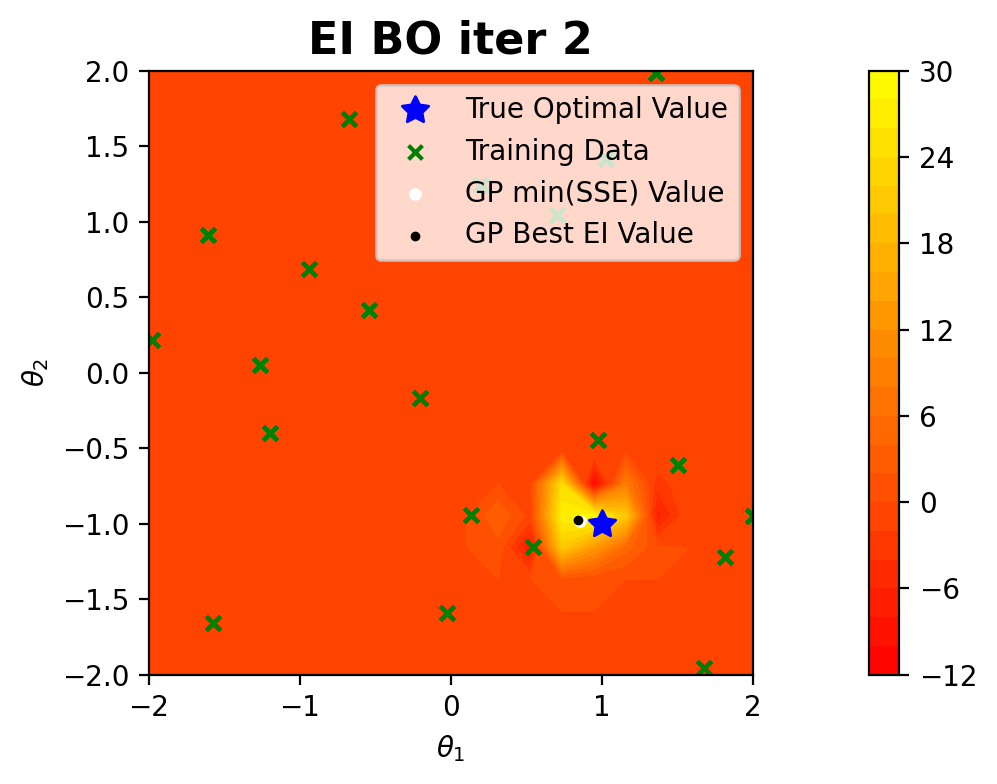

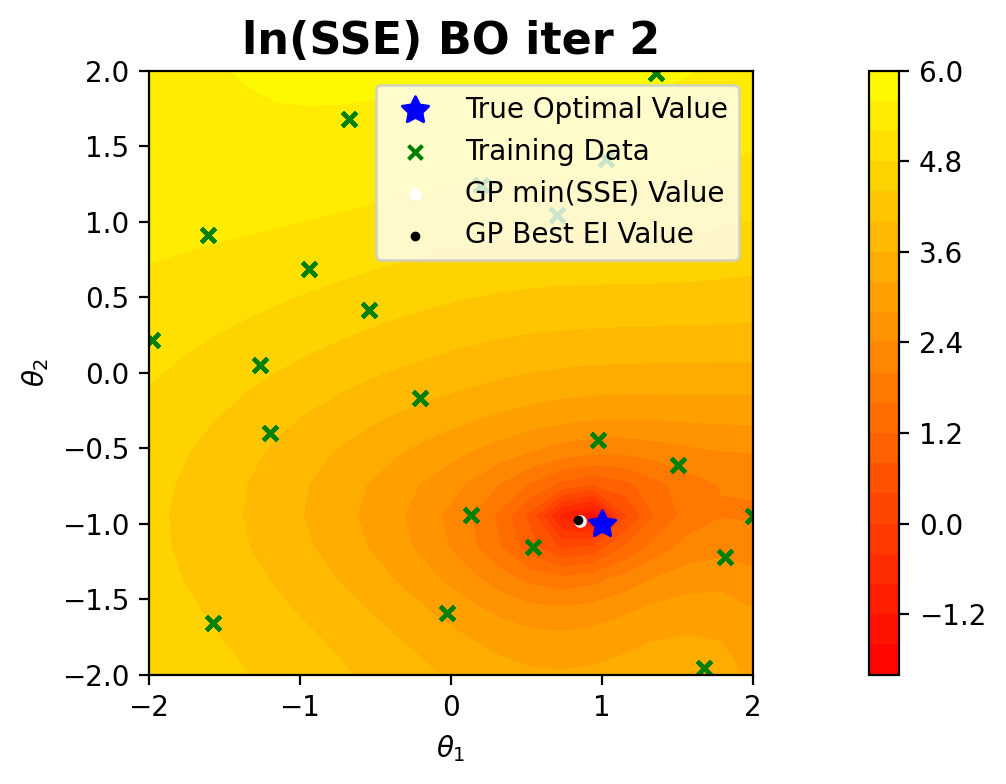

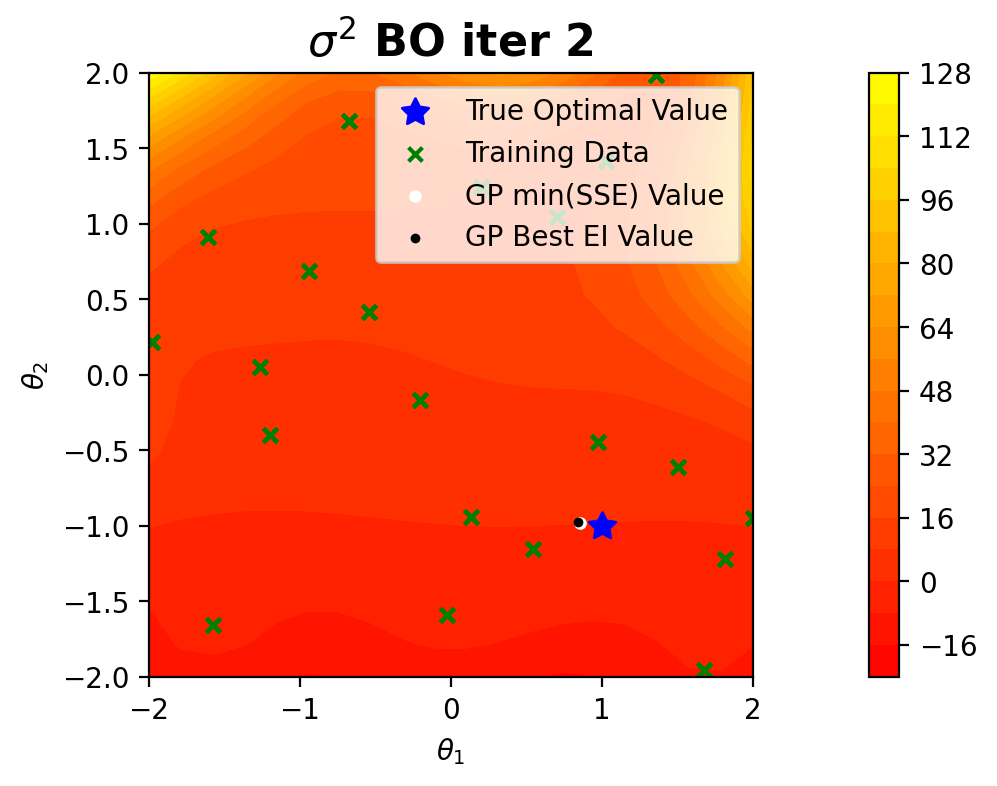

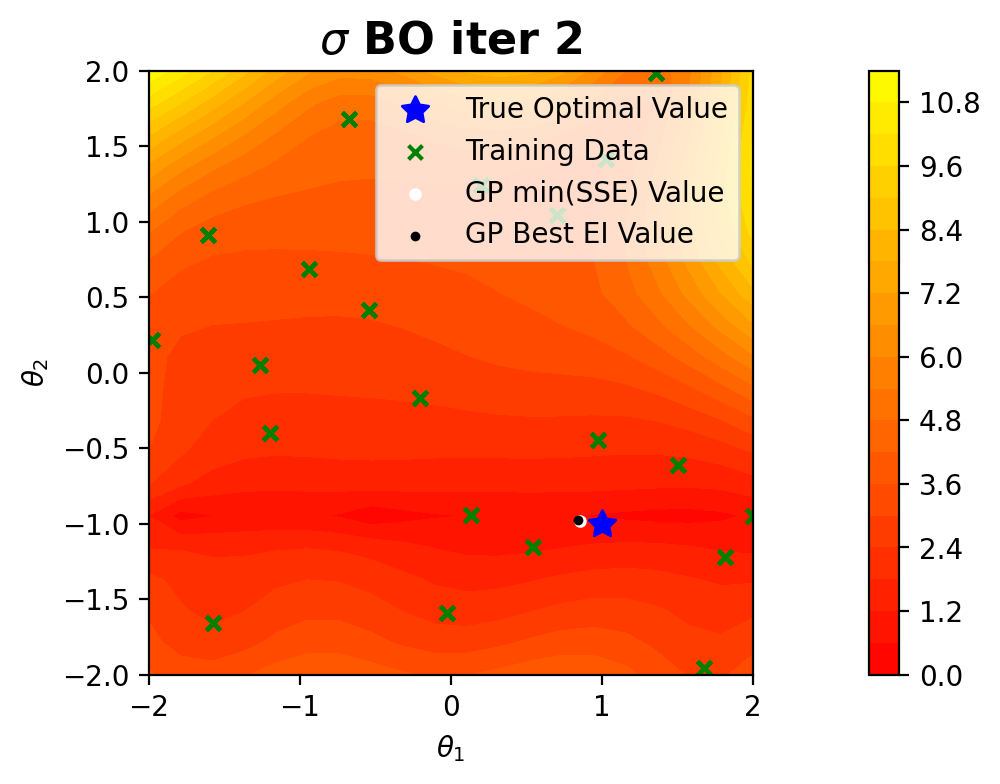

Best Error is: 2.8225
Magnitude of ln(SSE) given Theta_Opt =  [ 0.85609512 -0.98031794] is -1.5688e+00
BO Iteration =  3
Jasrasaria EP: 21.57476360419989
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.94532866 -0.95219795]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.96415117 -0.99229373]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 2.0646677786723813 



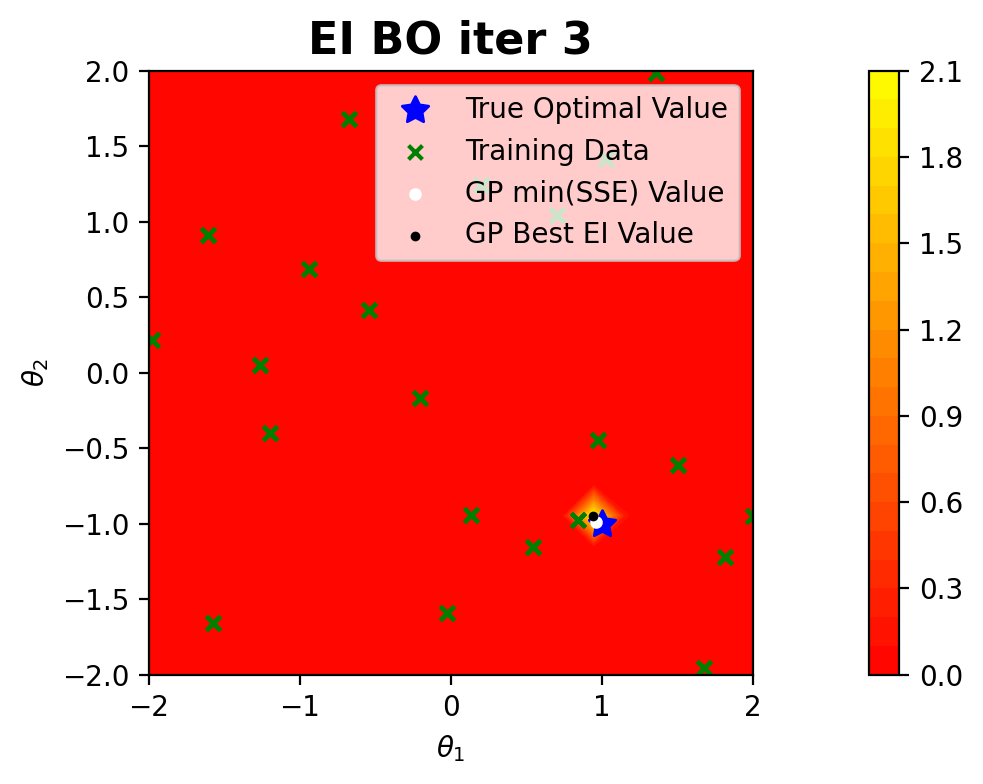

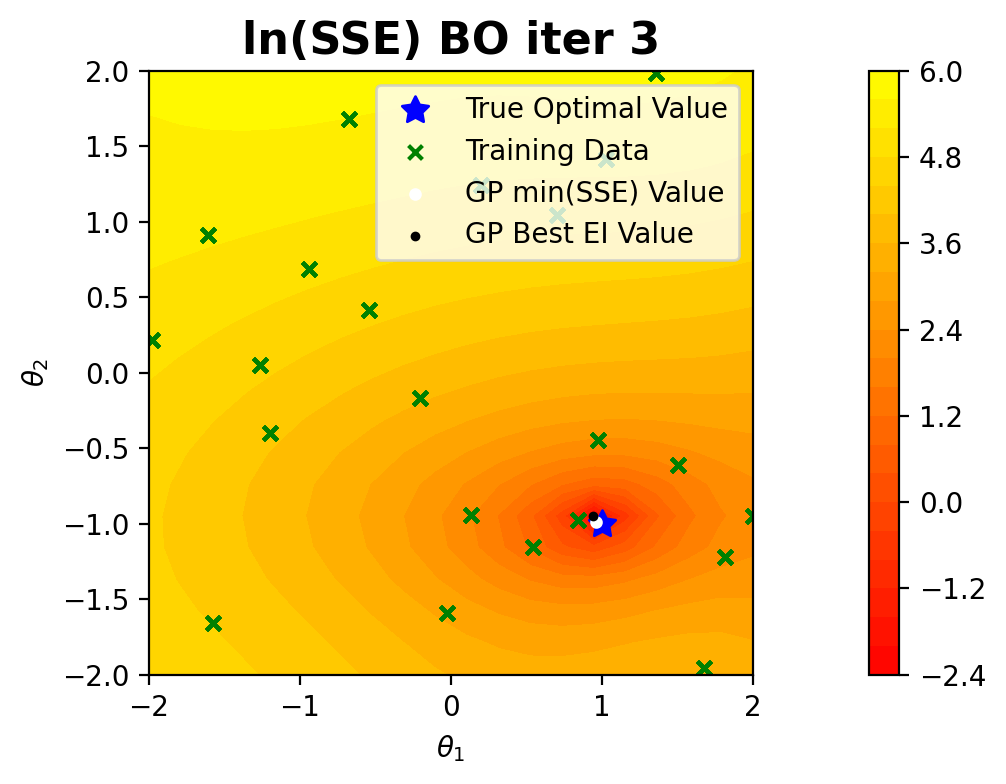

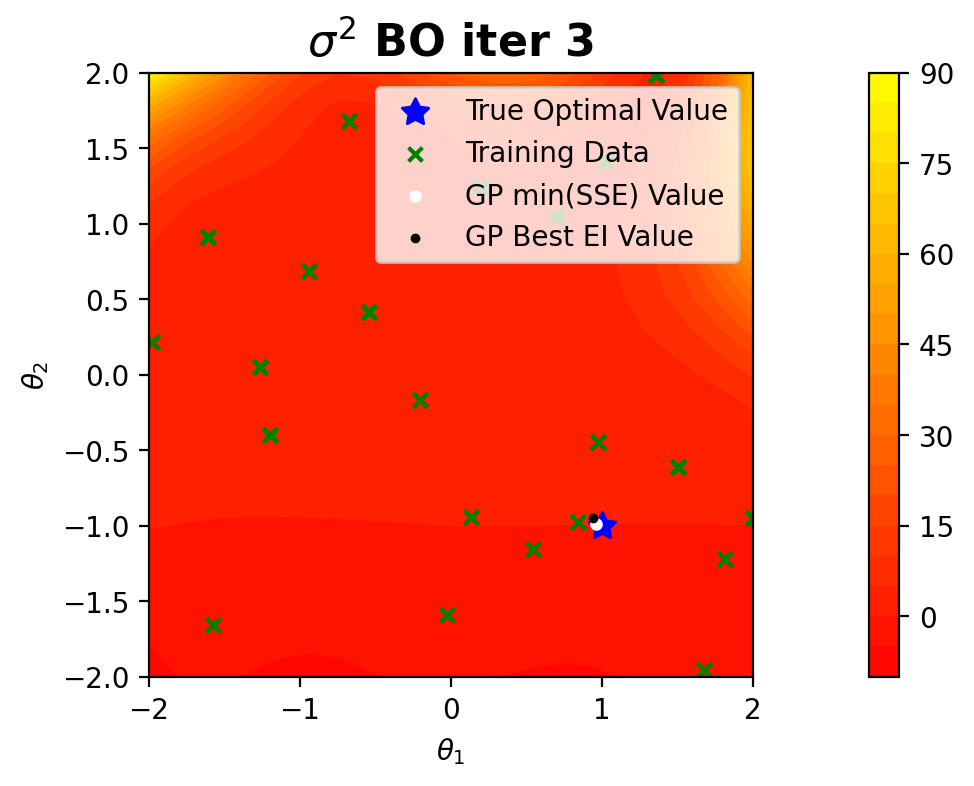

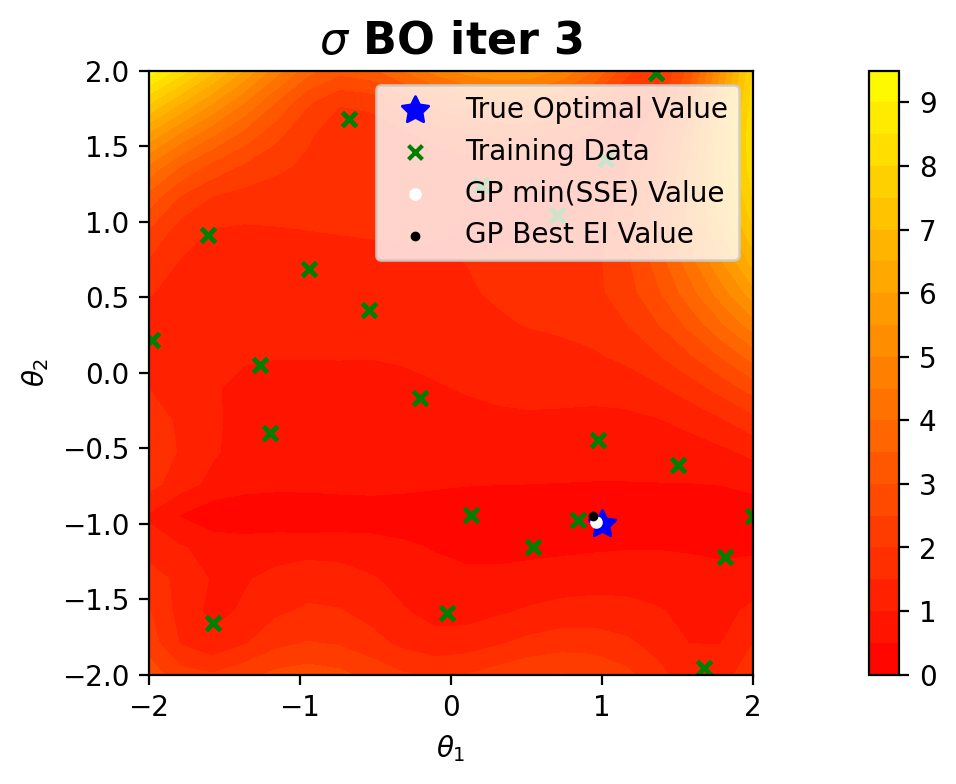

Best Error is: 0.243
Magnitude of ln(SSE) given Theta_Opt =  [ 0.96415117 -0.99229373] is -4.3349e+00
BO Iteration =  4
Jasrasaria EP: 30.942382814856533
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [ 0.98411138 -0.98411138]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.99120714 -0.99483026]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.7707004271467269 



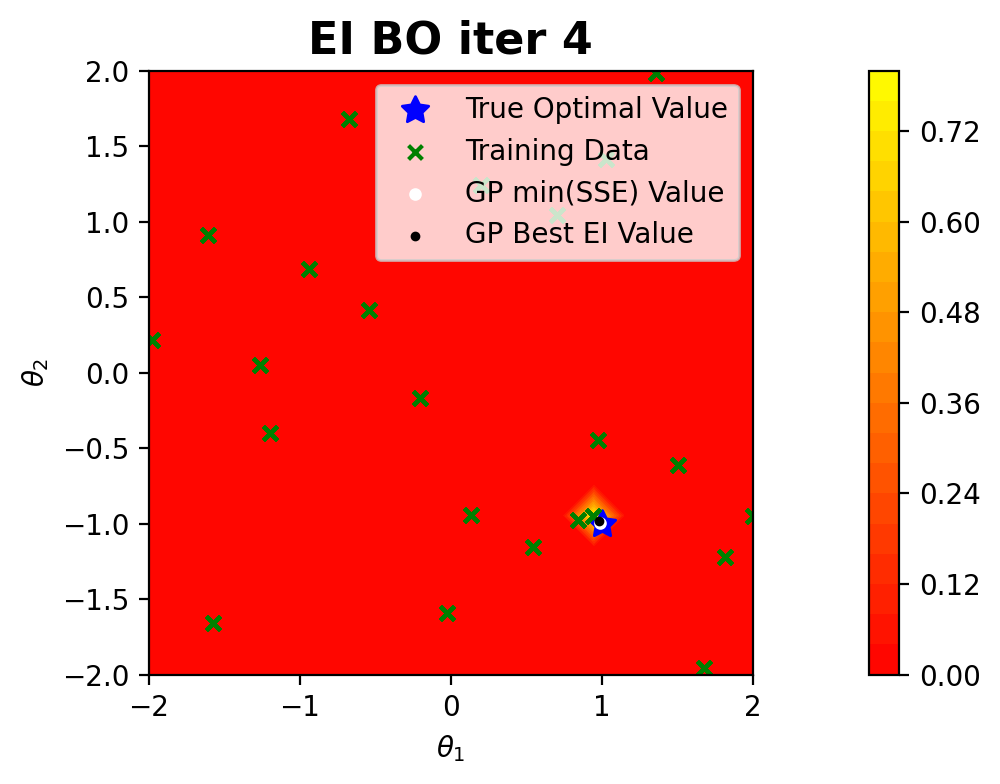

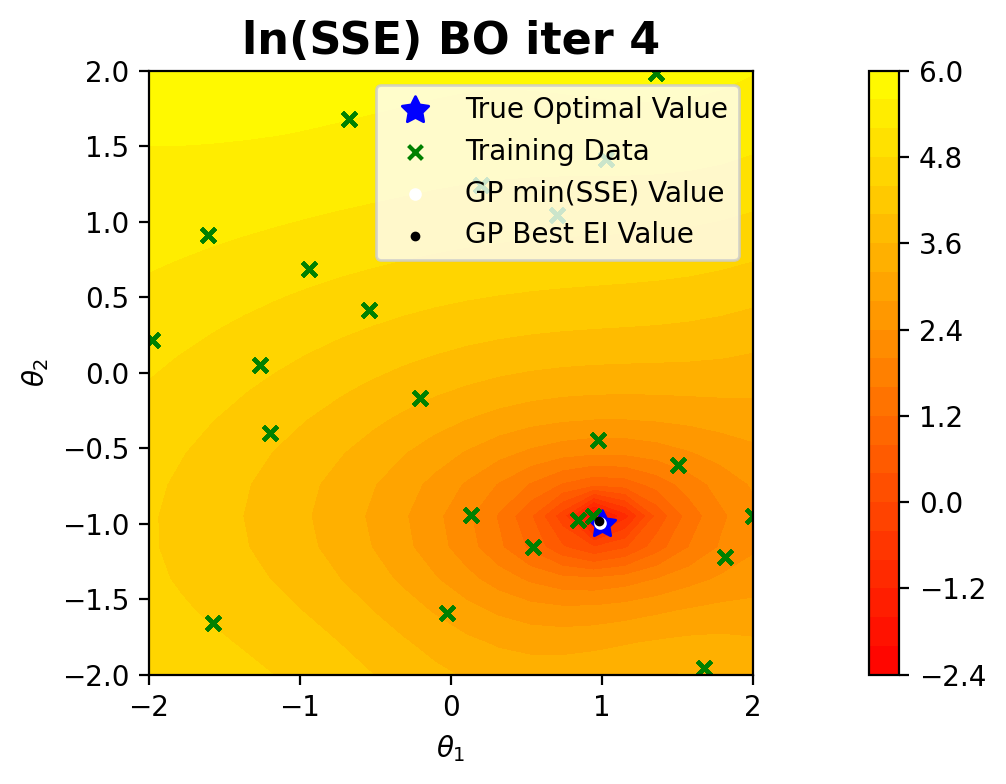

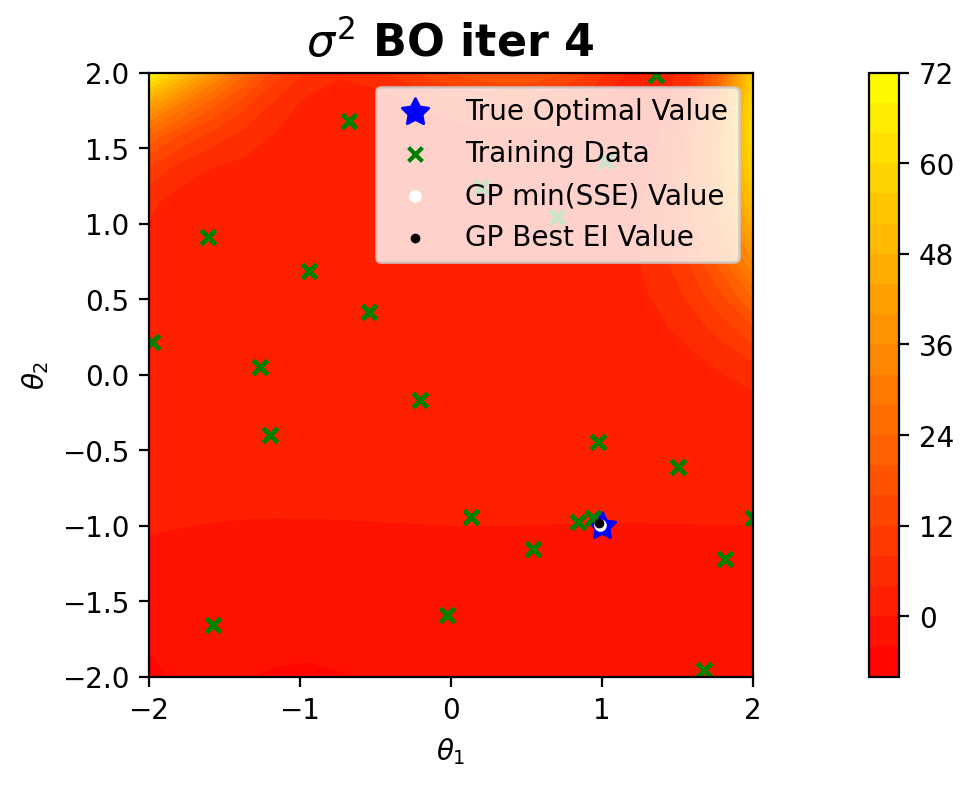

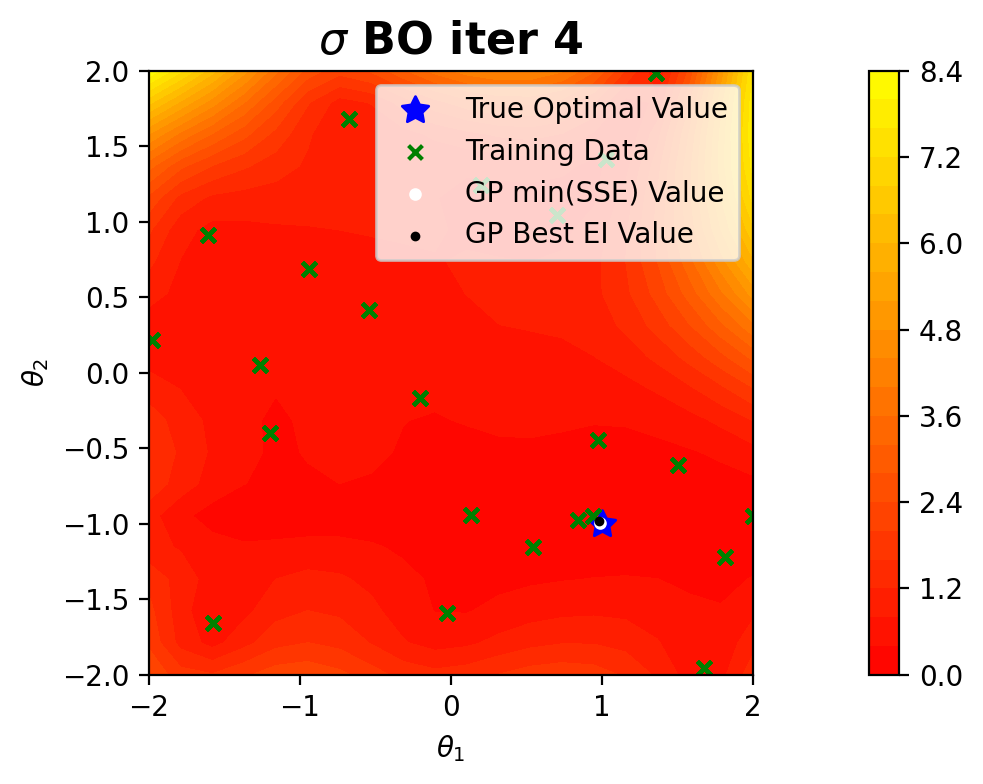

Best Error is: 0.1127
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99120714 -0.99483026] is -5.9629e+00
BO Iteration =  5
Jasrasaria EP: 210.68100341968062
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99428676 -0.99436534]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



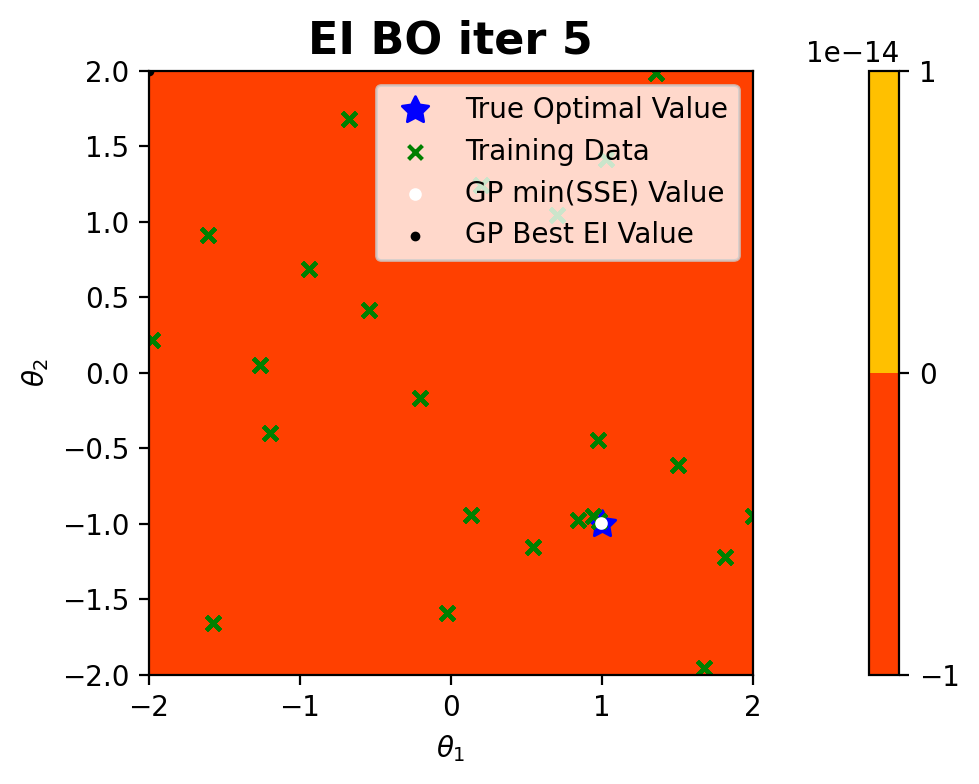

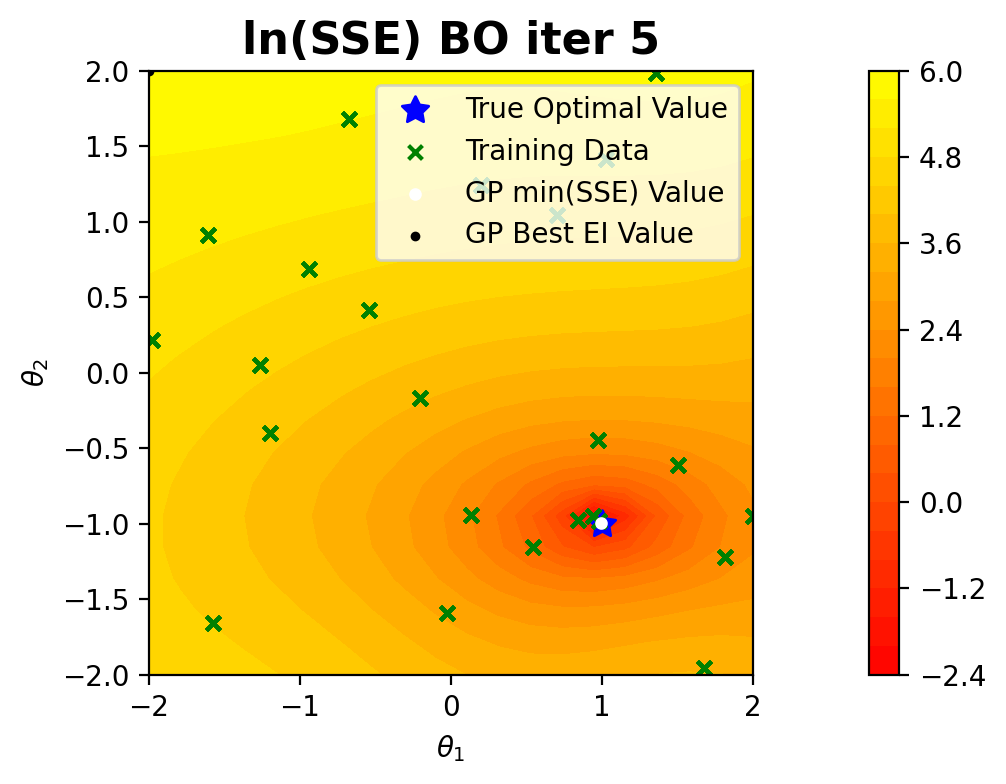

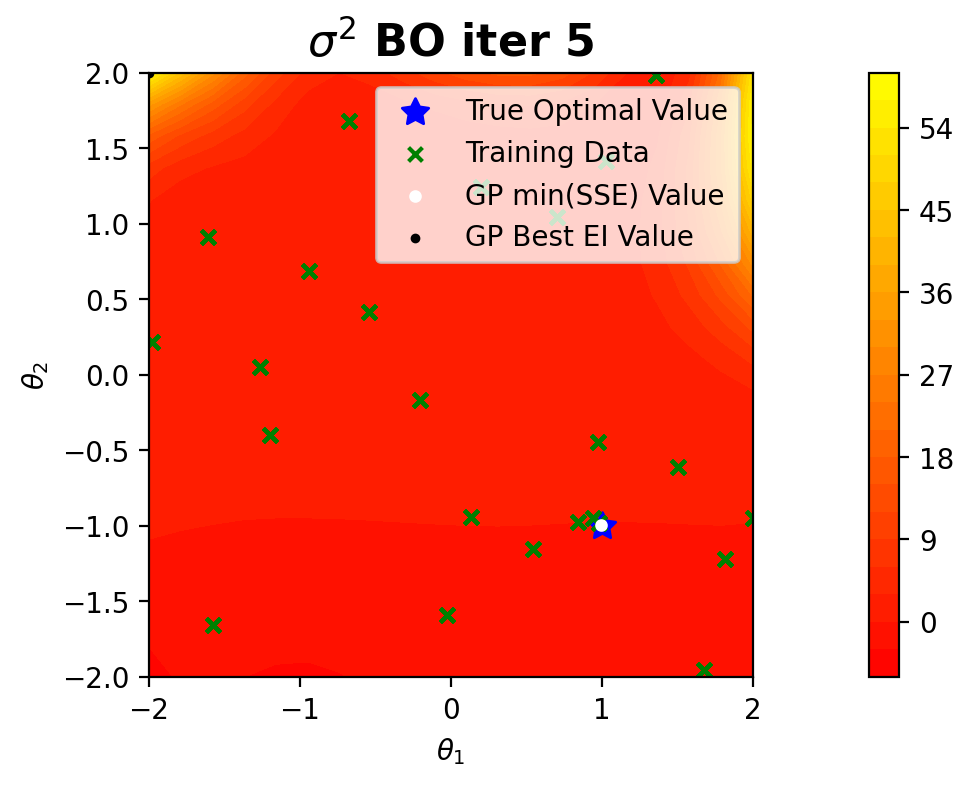

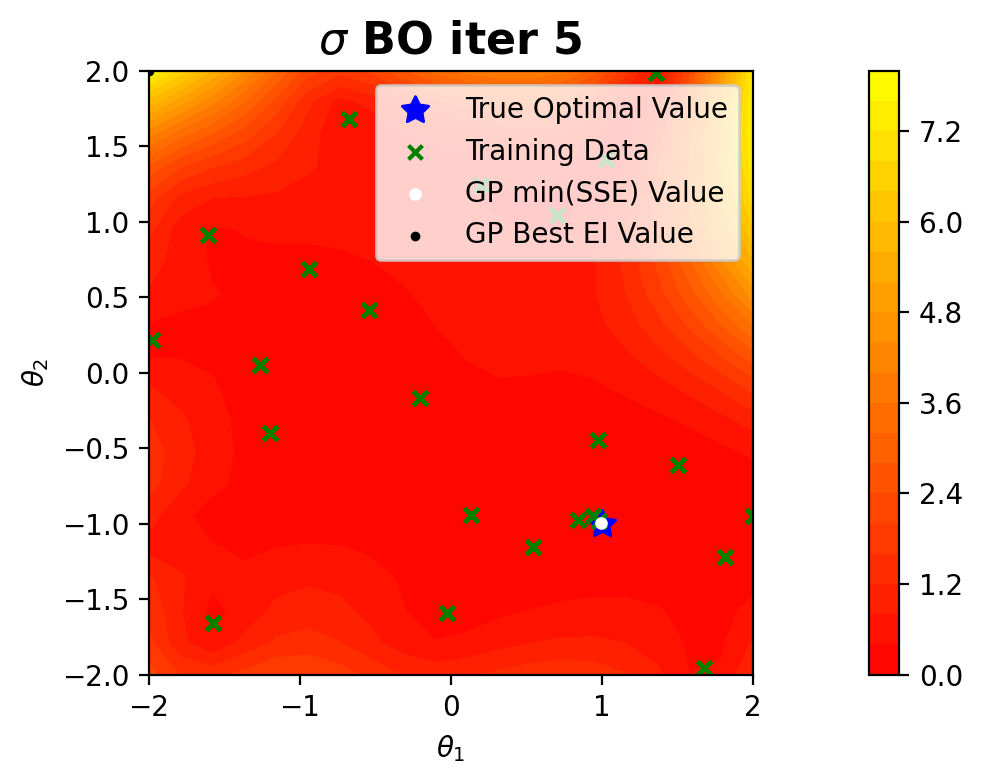

Best Error is: 0.0136
Magnitude of ln(SSE) given Theta_Opt =  [ 0.99428676 -0.99436534] is -5.8888e+00
BO Iteration =  6
Jasrasaria EP: 176.20275585263622
Boyle EP: tensor(0.)
Exp EP: 0.01
Exploration Bias =  tensor(0)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99370796 -0.99427951]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842]
EI_max = 0.0 



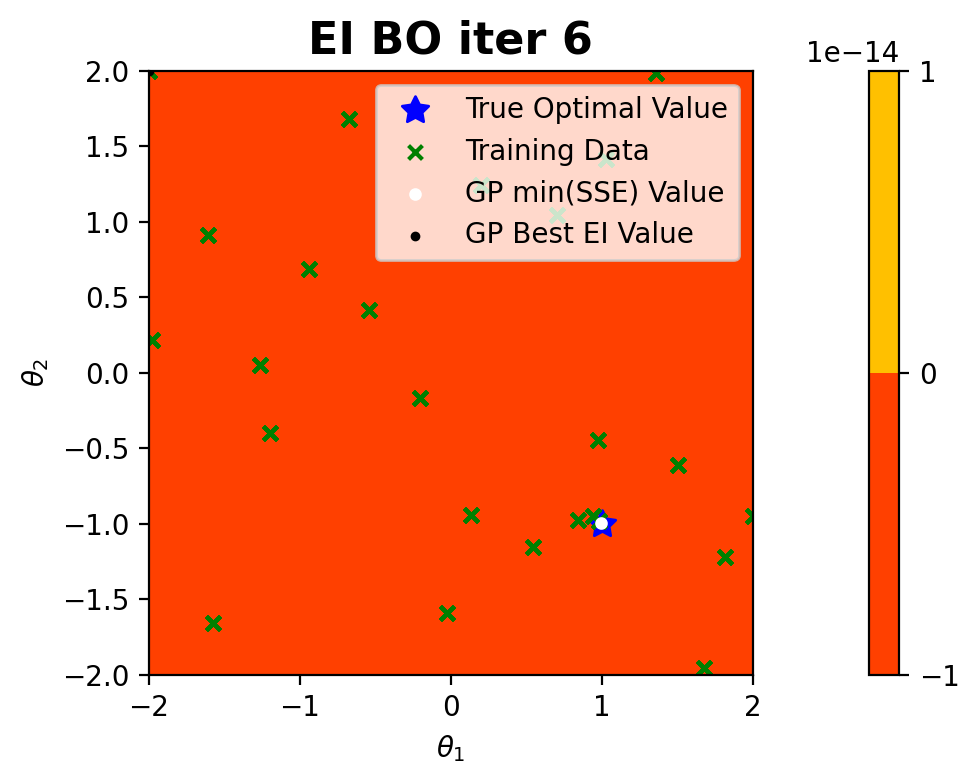

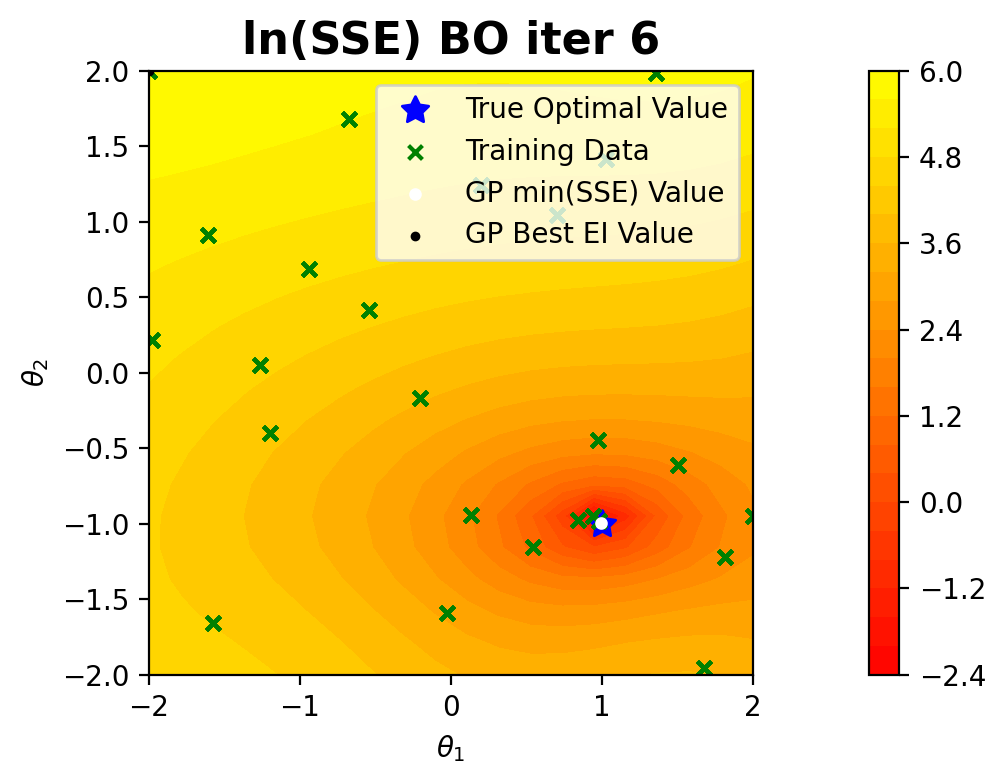

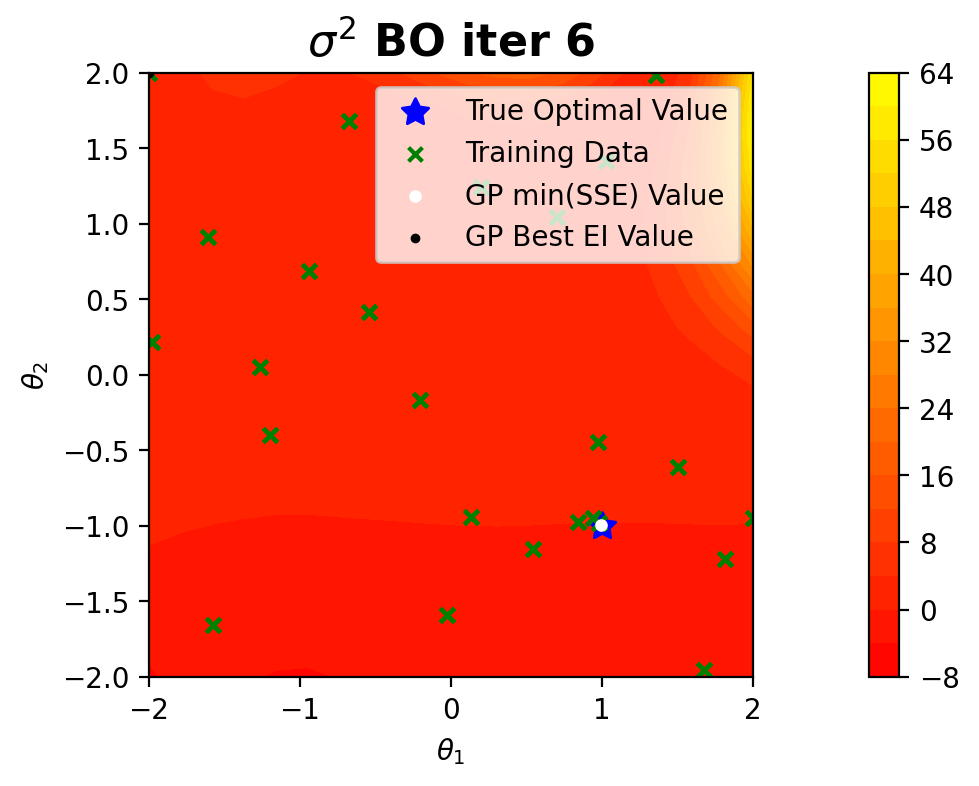

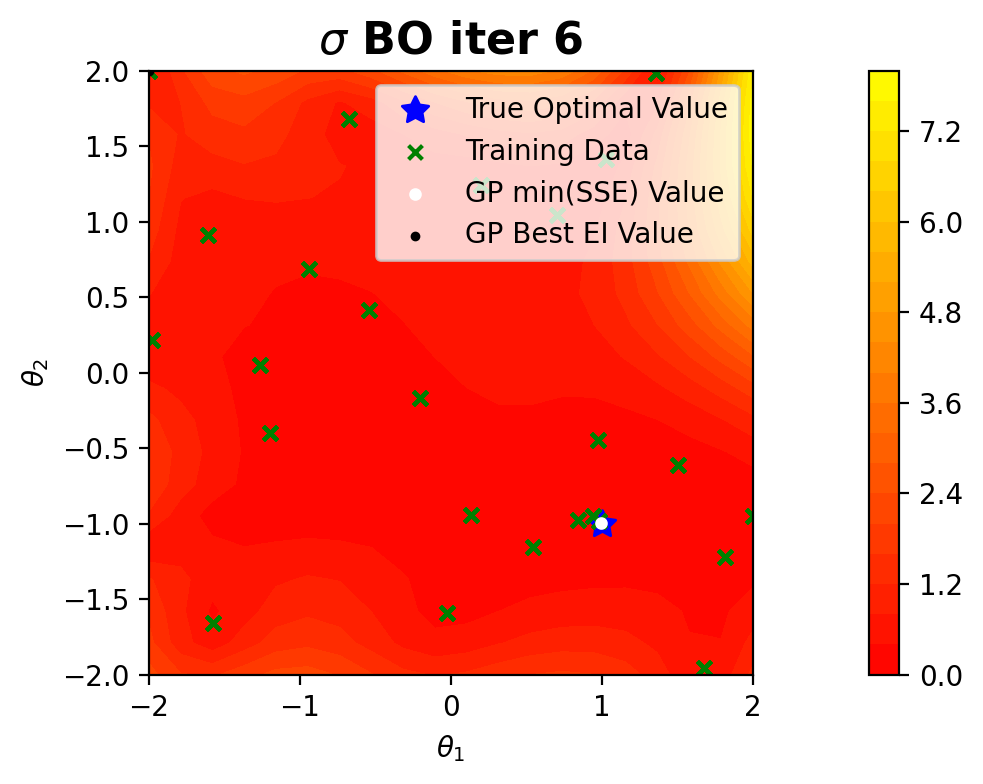

Best Error is: 0.0136


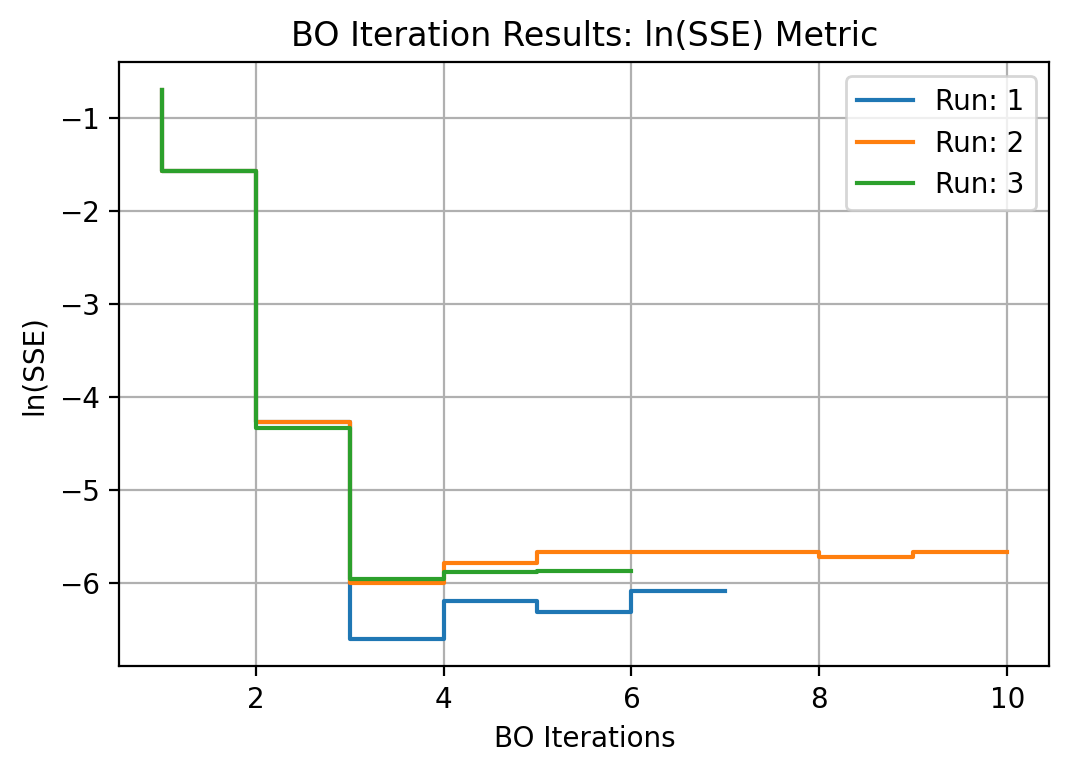

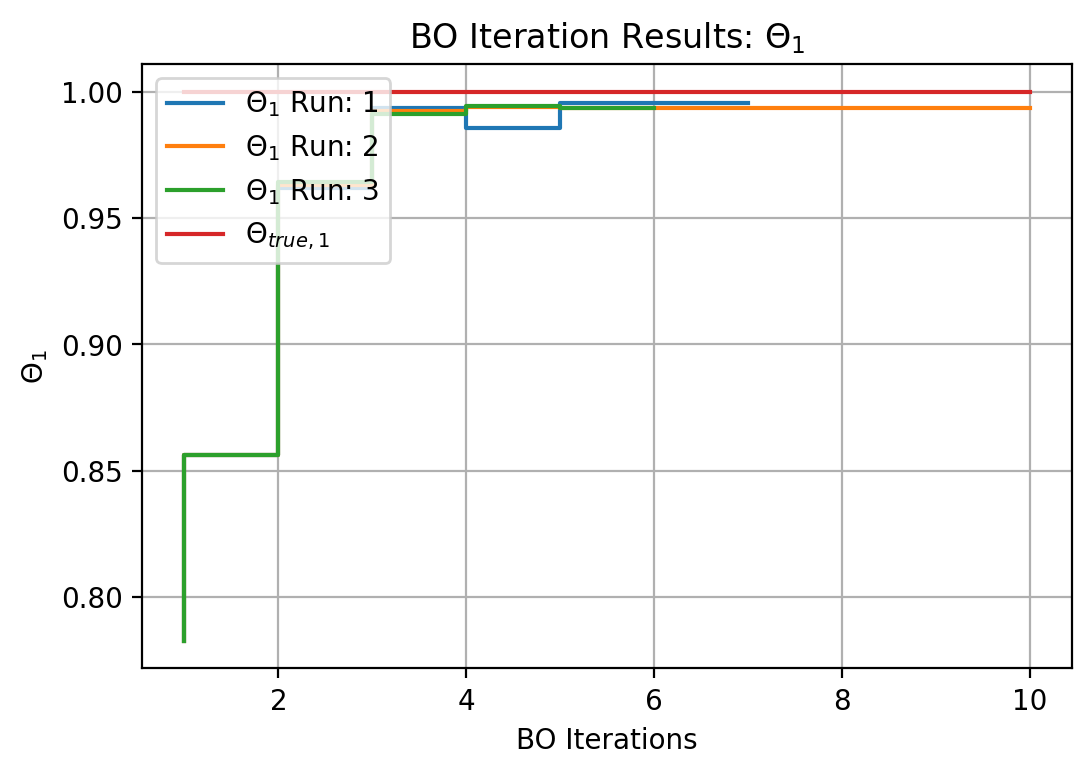

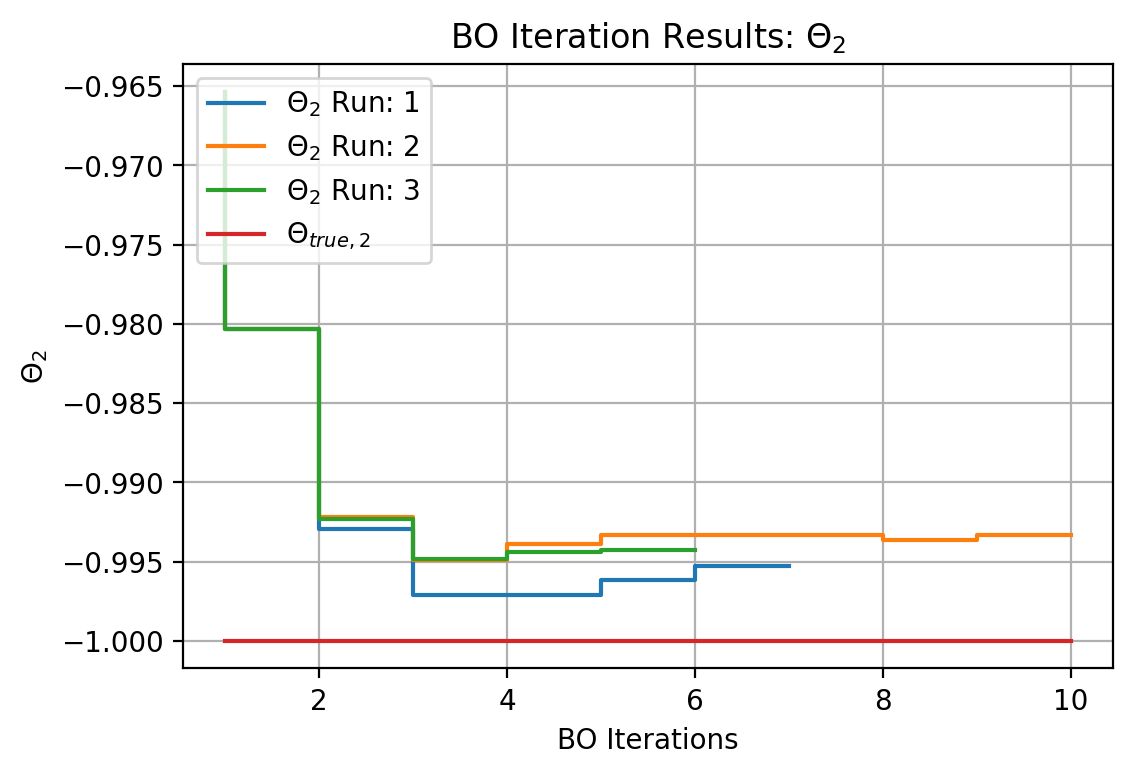

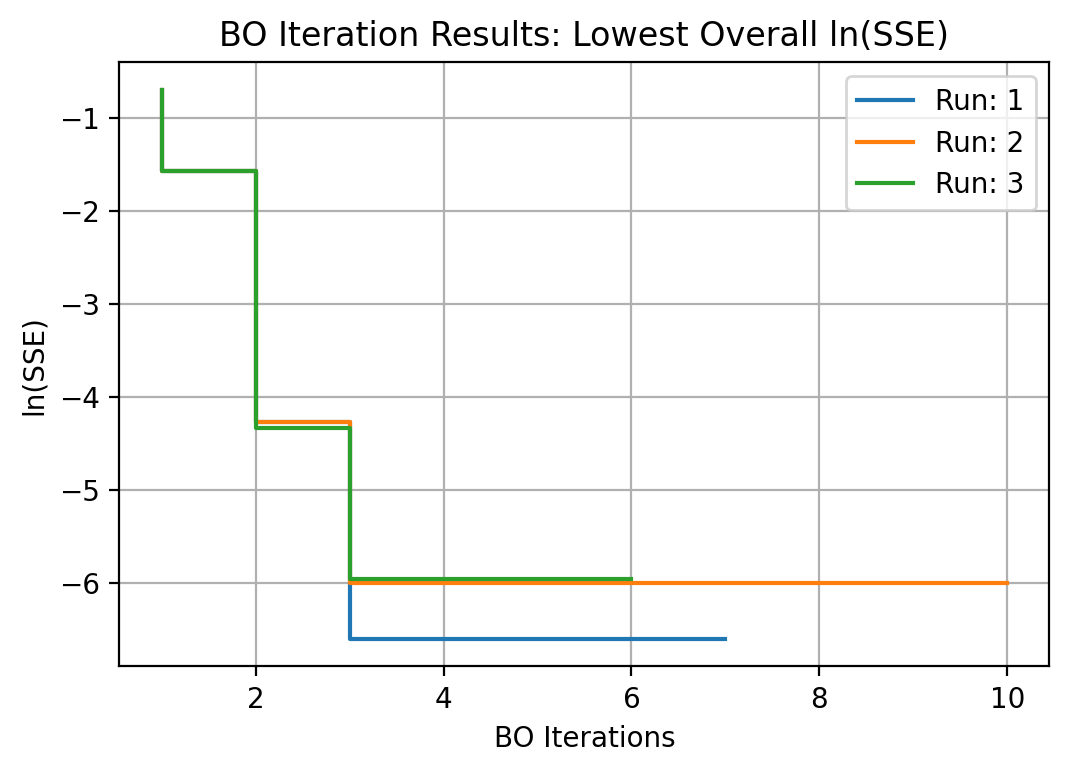

The GP predicts the lowest SSE of 1.353e-03 occurs at θ = [ 0.9935133 -0.9971091] during run 1 at BO iteration 4
At this point, the highest EI occurs at θ = [-2.  2.]


CPU times: user 7min 20s, sys: 981 ms, total: 7min 21s
Wall time: 7min 23s


In [3]:
%%time
obj = "obj"

all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

print("Runs:", runs)
print("BO Iters:", BO_iters)
print("----------------------------------------------------")
print("Separation Factor Train/Test:", str(np.round(sep_fact,3)))
print("Lengthscale Set To:", set_lengthscale)
print("Initial Explore Bias:", str(np.round(float(explore_bias[0]),3)))
results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[0], Xexp, Yexp,
                             noise_std, obj, runs, sparse_grid, emulator, set_lengthscale, verbose, 
                             save_fig, shuffle_seed, DateTime, sep_fact = sep_fact)
print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
          "during run", results[1], "at BO iteration", results[0])
print("At this point, the highest EI occurs at \u03B8 =", results[4][0])
print("\n")